# Loading libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
from sklearn.model_selection import RepeatedKFold            #for cross validating model
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

### **Pandas:**

#### Data Manipulation: Pandas provides a wide range of functions for manipulating data, such as merging, joining, filtering, sorting, and aggregating.
#### Data Analysis: It offers various statistical functions for analyzing data, such as calculating summary statistics, performing groupby operations, and creating pivot tables.

### **NumPy:**

#### Numerical Operations: NumPy provides efficient functions for performing numerical operations on arrays, such as mathematical calculations, matrix operations, and statistical analysis.
#### Array Handling: It allows for easy creation and manipulation of multidimensional arrays, which are essential for machine learning tasks.

### **Matplotlib and Seaborn:**

#### Data Visualization: Matplotlib and Seaborn provide a comprehensive set of tools for creating various types of plots and charts, which are crucial for exploring and understanding data.
#### EDA (Exploratory Data Analysis): They enable the visualization of data distributions, relationships between variables, and patterns, helping in identifying trends and outliers.

### **Scikit-learn:**

#### Machine Learning Algorithms: Scikit-learn provides a wide range of machine learning algorithms for different tasks, including regression, classification, and clustering.
#### Model Training and Evaluation: It offers functions for training models, making predictions, and evaluating model performance using various metrics.
#### Data Preprocessing: Scikit-learn includes tools for data preprocessing, such as scaling, normalization, and feature selection, which are essential for improving model performance.

### **Train-Test Split:**

#### Model Evaluation: Splitting the dataset into training and testing sets allows for unbiased evaluation of a model's performance.
#### Preventing Overfitting: Training a model on the entire dataset can lead to overfitting, where the model performs well on the training data but poorly on unseen data.

### **Model Evaluation Metrics:**

#### R2 Score: Measures the proportion of variance in the dependent variable that is explained by the model.
#### Mean Squared Error: Calculates the average squared difference between the predicted and actual values.
#### Mean Absolute Error: Calculates the average absolute difference between the predicted and actual values.

### **Linear Regression, Decision Tree Regressor, and Random Forest Regressor:**

#### Regression Models: These models are used for predicting continuous values based on input features.
#### Model Selection: Different regression models have different strengths and weaknesses, and the choice of model depends on the specific problem and data characteristics.

### **Cross-Validation:**

#### Robust Model Evaluation: Cross-validation provides a more reliable estimate of a model's performance by evaluating it on multiple subsets of the data.
#### Hyperparameter Tuning: It can be used to tune model hyperparameters, such as the number of trees in a Random Forest, to optimize model performance.

### **RepeatedKFold:**

#### Cross-Validation Method: RepeatedKFold is a cross-validation method that repeatedly splits the data into training and testing sets, providing multiple estimates of the model's performance.
#### Reduced Bias: By repeating the cross-validation process multiple times, it reduces the bias introduced by a single split.

### **Accuracy Score:**

#### Classification Model Evaluation: Accuracy score is used to evaluate the performance of classification models, which predict binary outcomes.
#### Not Applicable in Regression: In regression tasks, where the goal is to predict continuous values, accuracy score is not an appropriate evaluation metric.


In [ ]:
df = pd.read_csv('/content/West Bengal 2022-04-08 to 2024-04-08.csv')
wb_df = pd.DataFrame(data = df)

In [ ]:
wb_df.head(20)

name  latitude  longitude    datetime  tempmax  tempmin  temp  \
0   West Bengal     22.57     88.371  2022-04-08     36.6     25.0  30.1   
1   West Bengal     22.57     88.371  2022-04-09     39.3     25.6  30.9   
2   West Bengal     22.57     88.371  2022-04-10     36.6     26.3  30.4   
3   West Bengal     22.57     88.371  2022-04-11     40.8     26.2  31.4   
4   West Bengal     22.57     88.371  2022-04-12     38.2     26.9  31.1   
5   West Bengal     22.57     88.371  2022-04-13     38.1     26.6  31.2   
6   West Bengal     22.57     88.371  2022-04-14     42.1     26.9  32.7   
7   West Bengal     22.57     88.371  2022-04-15     43.5     27.8  33.4   
8   West Bengal     22.57     88.371  2022-04-16     40.9     27.3  32.4   
9   West Bengal     22.57     88.371  2022-04-17     39.1     27.5  32.0   
10  West Bengal     22.57     88.371  2022-04-18     39.7     26.6  32.0   
11  West Bengal     22.57     88.371  2022-04-19     36.9     26.3  31.0   
12  West Bengal     22.57     88.371  2022-04-20     36.0     27.1  31.0   
13  West Bengal     22.57     88.371  2022-04-21     36.2     27.4  31.0   
14  West Bengal     22.57     88.371  2022-04-22     39.2     27.5  31.7   
15  West Bengal     22.57     88.371  2022-04-23     42.4     27.3  33.4   
16  West Bengal     22.57     88.371  2022-04-24     43.5     28.0  34.1   
17  West Bengal     22.57     88.371  2022-04-25     42.9     27.9  33.8   
18  West Bengal     22.57     88.371  2022-04-26     41.2     27.5  33.0   
19  West Bengal     22.57     88.371  2022-04-27     40.7     27.3  32.7   

    feelslikemax  feelslikemin  feelslike  ...  solarenergy  uvindex  \
0           38.5          25.0       31.4  ...         27.1       10   
1           40.1          25.6       32.6  ...         27.2       10   
2           40.5          26.3       33.1  ...         27.1       10   
3           41.7          26.2       33.8  ...         27.6       10   
4           41.4          29.7       34.9  ...         27.0       10   
5           42.7          26.6       34.6  ...         27.1       10   
6           43.8          29.8       36.1  ...         25.3       10   
7           43.5          31.1       36.2  ...         24.5       10   
8           42.6          30.8       35.9  ...         25.1       10   
9           42.1          30.9       35.6  ...         27.2       10   
10          41.8          26.6       35.2  ...         27.6       10   
11          40.3          26.3       34.3  ...         27.5       10   
12          40.9          30.5       35.3  ...         27.2       10   
13          39.7          30.6       34.6  ...         25.4       10   
14          42.6          30.7       35.8  ...         26.7       10   
15          41.2          30.9       36.0  ...         25.8       10   
16          43.5          32.0       37.0  ...         27.9       10   
17          41.5          32.2       37.0  ...         28.2       10   
18          42.2          31.4       36.8  ...         28.0       10   
19          42.8          30.3       36.4  ...         28.0       10   

    severerisk              sunrise               sunset moonphase  \
0           30  2022-04-08T05:22:55  2022-04-08T17:54:19      0.23   
1           30  2022-04-09T05:22:00  2022-04-09T17:54:41      0.25   
2           75  2022-04-10T05:21:06  2022-04-10T17:55:03      0.29   
3           75  2022-04-11T05:20:12  2022-04-11T17:55:24      0.32   
4           75  2022-04-12T05:19:19  2022-04-12T17:55:46      0.35   
5           75  2022-04-13T05:18:26  2022-04-13T17:56:09      0.39   
6           75  2022-04-14T05:17:34  2022-04-14T17:56:31      0.42   
7           75  2022-04-15T05:16:42  2022-04-15T17:56:54      0.45   
8           60  2022-04-16T05:15:51  2022-04-16T17:57:16      0.48   
9           60  2022-04-17T05:15:00  2022-04-17T17:57:39      0.50   
10          60  2022-04-18T05:14:10  2022-04-18T17:58:02      0.55   
11          60  2022-04-19T05:13:20  2022-04-19T17:58:25     

## LETS CHECK THE COLUMNS WE ARE HAVING IN THIS DATASET

In [ ]:
wb_df.columns

Index(['name', 'latitude', 'longitude', 'datetime', 'tempmax', 'tempmin',
       'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'windspeedmax', 'windspeedmean',
       'windspeedmin', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon',
       'source'],
      dtype='object')

**Numerical Columns:**

* **tempmax:** Maximum temperature
* **tempmin:** Minimum temperature
* **temp:** Current temperature
* **feelslikemax:** Maximum perceived temperature
* **feelslikemin:** Minimum perceived temperature
* **feelslike:** Current perceived temperature
* **dew:** Dew point temperature
* **humidity:** Relative humidity
* **precip:** Precipitation amount
* **precipprob:** Probability of precipitation
* **precipcover:** Percentage of area covered by precipitation
* **snow:** Snowfall amount
* **snowdepth:** Snow depth
* **windgust:** Maximum wind gust speed
* **windspeed:** Current wind speed
* **windspeedmax:** Maximum wind speed
* **windspeedmean:** Average wind speed
* **windspeedmin:** Minimum wind speed
* **sealevelpressure:** Sea level pressure
* **cloudcover:** Cloud cover percentage
* **visibility:** Visibility distance
* **solarradiation:** Solar radiation intensity
* **solarenergy:** Solar energy potential
* **uvindex:** UV index

**Categorical Columns:**

* **name:** Location name
* **latitude:** Latitude of the location
* **longitude:** Longitude of the location
* **datetime:** Date and time of the observation
* **preciptype:** Type of precipitation (e.g., rain, snow)
* **winddir:** Wind direction
* **moonphase:** Moon phase
* **conditions:** Current weather conditions
* **description:** Detailed weather description
* **icon:** Weather icon code
* **source:** Data source

**Other Columns:**

* **Index:** Row index

**Analysis:**

* **Numerical columns:** These columns can be used for statistical analysis, such as calculating summary statistics (mean, median, standard deviation), identifying trends and patterns, and performing regression analysis.
* **Categorical columns:** These columns can be used for grouping and filtering the data, as well as for creating visualizations to compare different categories.
* **Datetime column:** This column can be used for time-series analysis, such as plotting data over time and identifying seasonal patterns.
ADD


## **Shape**

In [ ]:
wb_df.shape

(732, 38)

In [ ]:
wb_df.describe()

latitude  longitude     tempmax     tempmin        temp  \
count  7.320000e+02    732.000  732.000000  732.000000  732.000000   
mean   2.257000e+01     88.371   33.265574   24.060519   28.084016   
std    3.555143e-15      0.000    4.453857    4.381957    3.956771   
min    2.257000e+01     88.371   21.600000   11.500000   17.800000   
25%    2.257000e+01     88.371   30.200000   20.700000   25.375000   
50%    2.257000e+01     88.371   33.100000   25.500000   28.800000   
75%    2.257000e+01     88.371   36.200000   27.700000   31.100000   
max    2.257000e+01     88.371   44.800000   32.200000   36.200000   

       feelslikemax  feelslikemin   feelslike         dew    humidity  ...  \
count    732.000000    732.000000  732.000000  732.000000  732.000000  ...   
mean      35.208060     25.545082   30.204781   17.334836   56.373224  ...   
std        6.113742      6.049872    5.933723    7.522681   16.466996  ...   
min       21.600000     11.500000   17.800000   -2.700000   17.300000  ...   
25%       29.375000     20.700000   25.175000   11.675000   43.500000  ...   
50%       36.050000     25.500000   30.850000   19.850000   58.050000  ...   
75%       40.425000     31.200000   35.600000   24.100000   68.800000  ...   
max       48.200000     39.600000   42.900000   25.600000   94.300000  ...   

       windspeedmin     winddir  sealevelpressure  cloudcover  visibility  \
count    732.000000  732.000000        732.000000  732.000000  732.000000   
mean       6.681831  215.761475       1008.134699   44.752869   23.253279   
std        4.484518   96.081297          5.828037   36.039615    2.020416   
min        0.400000    0.100000        994.000000    0.000000    3.400000   
25%        3.200000  170.925000       1003.200000    7.975000   23.400000   
50%        5.800000  197.950000       1007.950000   40.950000   24.100000   
75%        9.000000  314.350000       1013.200000   79.300000   24.100000   
max       25.600000  359.900000       1019.500000  100.000000   24.100000   

       solarradiation  solarenergy     uvindex  severerisk   moonphase  
count      732.000000   732.000000  732.000000  732.000000  732.000000  
mean       228.981148    19.774180    8.295082   29.695355    0.487077  
std         59.197112     5.112242    1.630868   24.078561    0.287903  
min          8.300000     0.700000    0.000000   10.000000    0.000000  
25%        203.225000    17.500000    8.000000   10.000000    0.250000  
50%        229.900000    19.900000    8.000000   30.000000    0.500000  
75%        264.425000    22.800000    9.000000   30.000000    0.750000  
max        339.200000    29.400000   10.000000  100.000000    0.980000  

[8 rows x 29 columns]

The `df.describe()` method in Pandas is used to provide summary statistics of a DataFrame, including the count, mean, standard deviation, minimum, maximum, and quartiles (25%, 50%, and 75%) of each numerical column. It can be useful for getting a quick overview of the distribution of data in a DataFrame.

As you can see, the `describe()` method provides a concise summary of the distribution of data in each numerical column of the DataFrame. This information can be useful for understanding the central tendency, spread, and shape of the data.

Here are some specific use cases for `df.describe()`:

* **Identifying outliers:** The minimum and maximum values can help identify potential outliers in the data.
* **Understanding the distribution of data:** The mean, standard deviation, and quartiles can provide insights into the shape and spread of the data.
* **Comparing different columns:** The summary statistics can be used to compare the distributions of different numerical columns in a DataFrame.
* **Preprocessing data:** The summary statistics can be used to identify columns with missing values or extreme values that may need to be handled before modeling.

Overall, `df.describe()` is a useful tool for getting a quick overview of the distribution of data in a DataFrame and can be used for a variety of data analysis and preprocessing tasks.

This function provides summary statistics for each numerical column in the DataFrame, including:

* **count:** Number of non-null values in the column
* **mean:** Mean (average) of the values in the column
* **std:** Standard deviation of the values in the column
* **min:** Minimum value in the column
* **25%:** First quartile (25th percentile) of the values in the column
* **50%:** Median (50th percentile) of the values in the column
* **75%:** Third quartile (75th percentile) of the values in the column
* **max:** Maximum value in the column

**Conclusions:**

From the output, we can observe the following:

* The DataFrame contains 732 rows (observations) and 20 columns (features).
* The numerical columns have varying distributions, as indicated by the differences in their mean, standard deviation, and range of values.
* Some columns have a relatively small range of values (e.g., `windspeedmin`, `uvindex`), while others have a wider range (e.g., `tempmax`, `humidity`).
* There are no missing values in any of the numerical columns.

Each of the summary statistics provided by the `df.describe()` function plays an important role in data analysis:

* **Count:** The count of non-null values in a column indicates the number of observations that have valid data for that feature. This information is crucial for understanding the completeness of the data and identifying any missing values that may need to be imputed or handled.

* **Mean:** The mean, or average, of a column's values provides a measure of the central tendency of the data. It represents the typical value in the column and can be used to compare different columns or datasets.

* **Standard deviation:** The standard deviation measures the spread or variability of the data in a column. A high standard deviation indicates that the values are widely dispersed, while a low standard deviation indicates that the values are clustered closely around the mean.

* **Minimum and maximum:** The minimum and maximum values represent the lower and upper bounds of the data in a column, respectively. These values can help identify outliers or extreme values that may require further investigation.

* **Quartiles (25%, 50%, 75%):** Quartiles divide the data into four equal parts. The first quartile (Q1 or 25%) represents the value below which 25% of the data falls. The second quartile (Q2 or 50%) is the median, which represents the middle value of the data. The third quartile (Q3 or 75%) represents the value below which 75% of the data falls. Quartiles provide insights into the distribution of the data and can help identify potential outliers or skewness.

Together, these summary statistics provide a comprehensive overview of the distribution and characteristics of the numerical data in a DataFrame. They can be used for:

* **Data exploration:** Understanding the central tendency, spread, and range of values in each column.
* **Data cleaning:** Identifying missing values, outliers, and potential errors.
* **Feature engineering:** Selecting and transforming features for modeling based on their statistical properties.
* **Model evaluation:** Assessing the performance of models by comparing predicted values to summary statistics of the target variable.

By analyzing these summary statistics, data analysts can gain valuable insights into their data and make informed decisions about data preprocessing, modeling, and interpretation.


### CHECKING FOR NULL VALUES

In [ ]:
wb_df.isnull().any()

name                False
latitude            False
longitude           False
datetime            False
tempmax             False
tempmin             False
temp                False
feelslikemax        False
feelslikemin        False
feelslike           False
dew                 False
humidity            False
precip              False
precipprob          False
precipcover         False
preciptype           True
snow                False
snowdepth           False
windgust            False
windspeed           False
windspeedmax        False
windspeedmean       False
windspeedmin        False
winddir             False
sealevelpressure    False
cloudcover          False
visibility          False
solarradiation      False
solarenergy         False
uvindex             False
severerisk          False
sunrise             False
sunset              False
moonphase           False
conditions          False
description         False
icon                False
source              False
dtype: bool

In [ ]:
#CHECKING THE TOTAL NO OF NULL VALUES IN COLUMN -> preciptype
wb_df['preciptype'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 732 entries, 0 to 731
Series name: preciptype
Non-Null Count  Dtype 
--------------  ----- 
353 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [ ]:
#SINCE THERE ARE MORE THAN 50% of null values in the column we have to drop the column
wb_df.drop('preciptype', axis=1, inplace=True)
wb_df.head(5)

name  latitude  longitude    datetime  tempmax  tempmin  temp  \
0  West Bengal     22.57     88.371  2022-04-08     36.6     25.0  30.1   
1  West Bengal     22.57     88.371  2022-04-09     39.3     25.6  30.9   
2  West Bengal     22.57     88.371  2022-04-10     36.6     26.3  30.4   
3  West Bengal     22.57     88.371  2022-04-11     40.8     26.2  31.4   
4  West Bengal     22.57     88.371  2022-04-12     38.2     26.9  31.1   

   feelslikemax  feelslikemin  feelslike  ...  solarenergy  uvindex  \
0          38.5          25.0       31.4  ...         27.1       10   
1          40.1          25.6       32.6  ...         27.2       10   
2          40.5          26.3       33.1  ...         27.1       10   
3          41.7          26.2       33.8  ...         27.6       10   
4          41.4          29.7       34.9  ...         27.0       10   

   severerisk              sunrise               sunset  moonphase  \
0          30  2022-04-08T05:22:55  2022-04-08T17:54:19       0.23   
1          30  2022-04-09T05:22:00  2022-04-09T17:54:41       0.25   
2          75  2022-04-10T05:21:06  2022-04-10T17:55:03       0.29   
3          75  2022-04-11T05:20:12  2022-04-11T17:55:24       0.32   
4          75  2022-04-12T05:19:19  2022-04-12T17:55:46       0.35   

         conditions                           description               icon  \
0             Clear  Clear conditions throughout the day.          clear-day   
1             Clear  Clear conditions throughout the day.          clear-day   
2             Clear  Clear conditions throughout the day.          clear-day   
3  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day   
4  Partially cloudy     Partly cloudy throughout the day.  partly-cloudy-day   

   source  
0     obs  
1     obs  
2     obs  
3     obs  
4     obs  

[5 rows x 37 columns]

## Making "datetime" column as our index

In [ ]:
wb_df = wb_df.set_index('datetime')
wb_df.head(5)

name  latitude  longitude  tempmax  tempmin  temp  \
datetime                                                               
2022-04-08  West Bengal     22.57     88.371     36.6     25.0  30.1   
2022-04-09  West Bengal     22.57     88.371     39.3     25.6  30.9   
2022-04-10  West Bengal     22.57     88.371     36.6     26.3  30.4   
2022-04-11  West Bengal     22.57     88.371     40.8     26.2  31.4   
2022-04-12  West Bengal     22.57     88.371     38.2     26.9  31.1   

            feelslikemax  feelslikemin  feelslike   dew  ...  solarenergy  \
datetime                                                 ...                
2022-04-08          38.5          25.0       31.4  20.9  ...         27.1   
2022-04-09          40.1          25.6       32.6  21.4  ...         27.2   
2022-04-10          40.5          26.3       33.1  22.6  ...         27.1   
2022-04-11          41.7          26.2       33.8  21.5  ...         27.6   
2022-04-12          41.4          29.7       34.9  22.9  ...         27.0   

            uvindex  severerisk              sunrise               sunset  \
datetime                                                                    
2022-04-08       10          30  2022-04-08T05:22:55  2022-04-08T17:54:19   
2022-04-09       10          30  2022-04-09T05:22:00  2022-04-09T17:54:41   
2022-04-10       10          75  2022-04-10T05:21:06  2022-04-10T17:55:03   
2022-04-11       10          75  2022-04-11T05:20:12  2022-04-11T17:55:24   
2022-04-12       10          75  2022-04-12T05:19:19  2022-04-12T17:55:46   

            moonphase        conditions                           description  \
datetime                                                                        
2022-04-08       0.23             Clear  Clear conditions throughout the day.   
2022-04-09       0.25             Clear  Clear conditions throughout the day.   
2022-04-10       0.29             Clear  Clear conditions throughout the day.   
2022-04-11       0.32  Partially cloudy     Partly cloudy throughout the day.   
2022-04-12       0.35  Partially cloudy     Partly cloudy throughout the day.   

                         icon  source  
datetime                               
2022-04-08          clear-day     obs  
2022-04-09          clear-day     obs  
2022-04-10          clear-day     obs  
2022-04-11  partly-cloudy-day     obs  
2022-04-12  partly-cloudy-day     obs  

[5 rows x 36 columns]

## SINCE WE DO NOT NEED COLUMNS OF OBJECT DATATYPES HENCE WE WILL REMOVE THEM

In [ ]:
#CHECKING THE DATATYPE OF OLD DATA FRAME
print("\n DATATYPE OF OLD DATA FRAME: \n\n",wb_df.dtypes)

#REMOVING THE COLUMNS OF OBJECT TYPE
wb_df_int = wb_df.select_dtypes(exclude=['object'])

#CHECKING THE DATATYPE OF OLD DATA FRAME
print("\n DATATYPE OF NEW DATA FRAME: \n\n",wb_df_int.dtypes)


 DATATYPE OF OLD DATA FRAME: 

 name                 object
latitude            float64
longitude           float64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
windspeedmax        float64
windspeedmean       float64
windspeedmin        float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk            int64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon           

## LETS CONVDERT THE INDEX TO DATE-TIME FORMAT

In [ ]:
wb_df_int.index = pd.to_datetime(wb_df_int.index)
wb_df_int.index

DatetimeIndex(['2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
               '2022-04-16', '2022-04-17',
               ...
               '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
               '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06',
               '2024-04-07', '2024-04-08'],
              dtype='datetime64[ns]', name='datetime', length=732, freq=None)

## Checking and Treating missing values

In [ ]:
wb_df_int.isnull().sum()

latitude            0
longitude           0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windgust            0
windspeed           0
windspeedmax        0
windspeedmean       0
windspeedmin        0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
moonphase           0
dtype: int64

### *HANDLING MISSING VALUES*
* Dropping rows with missing values in our target variable columns.
    eg : **df.dropna(subset=['column_name'], inplace = True)**
  
* Filling missing values in Month and Day column with mode values.
   eg : **df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)**

* Checking the unnique values eg: **df_new['column_name'].unique()**

* Using SimpleImputer to handle rest of the rows with missing values.
  * from sklearn.impute import SimpleImputer
  * my_imputer = SimpleImputer()  
  * df_new = pd.DataFrame(my_imputer.fit_transform(df))
  * df_new.columns = df.columns

    
* Finally check if your data-frame is devoid of missing values
  **df_new.isnull().sum()**

In [ ]:
#PLOT SHOWING NO NULL VALUES ARE THERE IN DATA - SET
plt.figure(figsize = [10, 10])
sns.heatmap(wb_df_int.isnull(), annot = True )#Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()

In [ ]:
#latitude and longitude are constant for all cases and there are no sighns of snow in the entire datsaset hence its not required to keep them in the dataset
wb_df_int.drop(columns=['latitude', 'longitude','snow', 'snowdepth'], inplace=True)
# Output the modified DataFrame
print(wb_df_int.head())

In [ ]:
#precip probablity has only two values 0 to 100 hence its not a proper data so we need to remove it
wb_df_int.drop(columns=['precipprob'], inplace=True)

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured.

In [ ]:
wb_df_int.columns

### FINDING COORELATION BETWEEN VARIOUS COLUMNS IN DATASET

In [ ]:
from sklearn.linear_model import Ridge
correlation_matrix = wb_df_int.corr()
correlation_matrix

In [ ]:
#NOW LETS CHECK THE COLUMNS THAT ARE FAIRLY CO_RELATED WITH TEMP COLUMN
# Extract correlation values of the "temperature" column with other columns
temperature_correlation = correlation_matrix['temp']

# Output correlation values sorted by absolute correlation value
print(temperature_correlation.abs().sort_values(ascending=False))

### **Based on the correlation values between the "temperature" column and other columns:**

### Strong Positive Correlations:

1.tempmin, feelslike, feelslikemax, and tempmax have strong positive correlations with temp. This makes sense as these variables are directly related to temperature measurements, either actual or perceived.

### Moderate Positive Correlations:
2. sealevelpressure and dew also show moderate positive correlations with temp. Atmospheric pressure and dew point can influence temperature conditions, so it's reasonable to see a correlation here.

### Weak Positive Correlations:
3. severerisk, windspeed, windspeedmax, windgust, windspeedmean, uvindex, solarradiation, solarenergy, humidity, cloudcover, windspeedmin, and winddir have weak positive correlations with temp. While these correlations are statistically significant, they might not have a strong practical impact on temperature variation.

### Weak or Negligible Correlations:
4. visibility, precip, and moonphase show very weak or negligible correlations with temp. These variables are unlikely to have a significant impact on temperature variations based on the correlation values.

## PERFORM TWO DIFFERENT WAYS TO CHECK FOR DIMENTIONALITY REDUCTION

### Extracting features (X) and target variable (y) and then scale the features

In [ ]:
X = wb_df_int.drop(columns=['temp'])  # Features except target
Y = wb_df_int['temp']  # Target variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
from sklearn.decomposition import PCA
# Create a base model using all features
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)
base_model = LinearRegression()
base_model.fit(X_train, Y_train)
base_score = base_model.score(X_test, Y_test)
print("Model predicion without pca :",base_score)
#retain 95% of usefull features
pca = PCA(0.95)
wb_pca_arr = pca.fit_transform(X)
#initial no of columns
print("Columns before PCA : ",wb_df_int.shape)
#after pca columns
print("Columns after PCA : ",wb_pca_arr.shape)
wb_pca_arr
pca.explained_variance_ratio_

In [ ]:
#now lets see how much accuracy remains same after applying pca
X_train_pca,X_test_pca,Y_train,Y_test = train_test_split(wb_pca_arr,Y,test_size=0.2)
model = LinearRegression()
model.fit(X_train_pca,Y_train)
pca_score = model.score(X_test_pca,Y_test)
print("Model score after PCA : ",pca_score)

### Checking every feature one by one and evaluate model score for each feature

In [ ]:

# Select the features for PCA
features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'windgust', 'windspeed',
       'windspeedmax', 'windspeedmean', 'windspeedmin', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'moonphase']

print("Base Model Score:", base_score)
# Create an empty list to store scores
scores = []

# Iterate through each feature
for feature in features:
    # Create a PCA object
    pca = PCA()

    # Fit and transform the data for the current feature
    pca.fit(X[[feature]])
    transformed_data = pca.transform(X[[feature]])

    # Split transformed data into training and testing sets
    X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(transformed_data, Y, test_size=0.2)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_pca, Y_train)

    # Calculate and append the score to the list
    score = model.score(X_test_pca, Y_test)
    scores.append(score)

# Create a dictionary to store feature names and scores
feature_scores = dict(zip(features, scores))

# Sort the dictionary by scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features and their scores
for feature, score in sorted_features:
    print(f"{feature}: {score}")

Base Model Score: 0.9966498046094097
tempmin: 0.9085375641923197
feelslike: 0.8918183038786001
tempmax: 0.8569209975992071
feelslikemax: 0.8528090716670567
feelslikemin: 0.8419152023118754
sealevelpressure: 0.6259247039978112
dew: 0.6211477344802199
severerisk: 0.35002842518387123
windspeedmax: 0.33582748847826205
windgust: 0.3306283828378991
solarenergy: 0.20763555486744323
windspeed: 0.2040875686813739
uvindex: 0.19812261604885473
windspeedmean: 0.16382221889059279
winddir: 0.13721553698790878
cloudcover: 0.13350055597441768
humidity: 0.13008803581394823
solarradiation: 0.05726835623738569
windspeedmin: 0.038810765284201465
precip: -0.0017778936417105484
moonphase: -0.009356257102038468
visibility: -0.0675514447033081


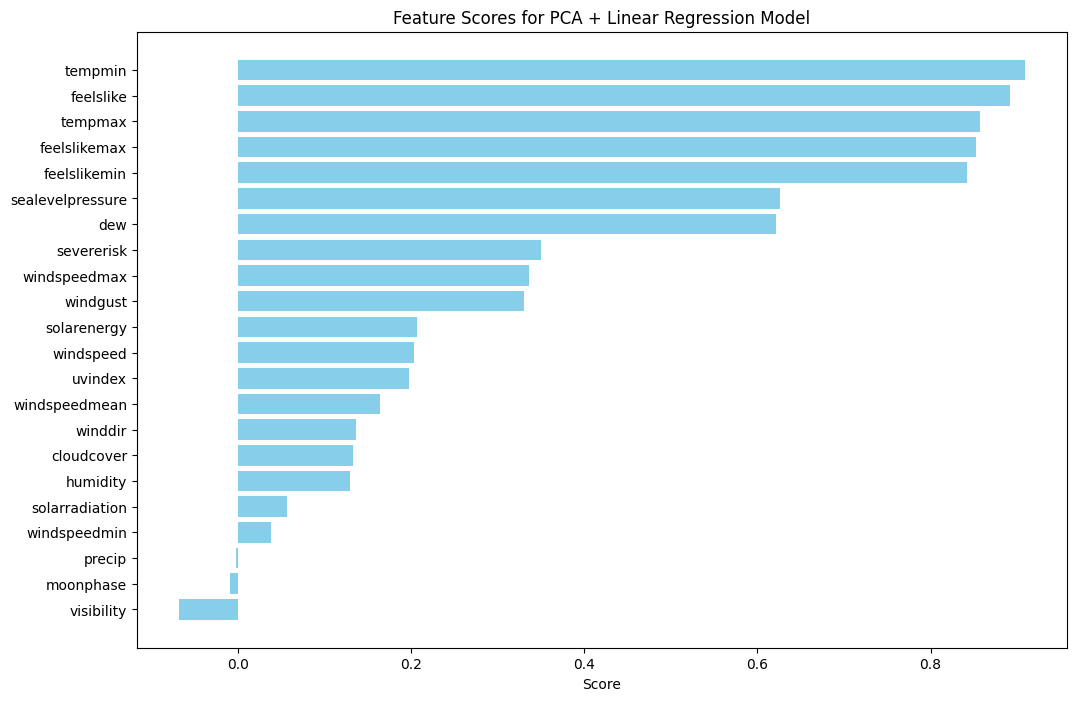

In [ ]:
# Extract feature names and scores
features = [item[0] for item in sorted_features]
scores = [item[1] for item in sorted_features]

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Score')
plt.title('Feature Scores for PCA + Linear Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()

### Analyzing the feature scores obtained from PCA combined with Linear Regression can provide insights into the importance of each feature in predicting the target variable. Here's how you can interpret the results:

#### Base Model Score: The base model score represents the performance of the model without feature transformation (PCA). In this case, the base model score is approximately 0.995, indicating a high level of accuracy in predicting the target variable.

#### Feature Scores: The feature scores indicate the performance of the model when each feature is transformed using PCA individually. Higher scores suggest that the corresponding feature contributes more to the predictive power of the model.

#### Positive Scores: Features with positive scores (e.g., tempmin, feelslike, tempmax) indicate that transforming these features using PCA improves the model's performance. These features are likely to have a significant impact on predicting the target variable.

#### Near-Zero or Negative Scores: Features with near-zero or negative scores (e.g., visibility, moonphase, precip) suggest that transforming these features using PCA does not improve the model's performance or may even degrade it. These features may not contribute much to the predictive power of the model.

### Interpretation: Based on the feature scores:

#### Highly Important Features: Features such as tempmin, feelslike, and tempmax have relatively high scores, indicating their importance in predicting the target variable. These features likely contain valuable information that helps in making accurate predictions.

#### Less Important Features: Features with lower scores, such as visibility, moonphase, and precip, contribute less to the predictive power of the model. These features may be less relevant or informative in predicting the target variable compared to others.

#### Further Analysis: It's essential to interpret feature scores in the context of the specific problem domain and consider domain knowledge to determine the relevance of each feature. Additionally, conducting further analysis, such as feature importance ranking or domain-specific feature engineering, can provide deeper insights into the predictive power of each feature.

#### Overall, analyzing feature scores obtained from PCA combined with Linear Regression helps in understanding the relative importance of different features and guiding feature selection or dimensionality reduction techniques in machine learning pipelines.

## Features with lower scores -> such as **visibility**, **moonphase** and **precip**, contribute less to the predictive power of the model . But we all know that among them precipitation plays an important role in temperature changes, hence we can't remove the **precip** column , thus the other two can be removed

In [ ]:
wb_df_pca = wb_df_int.drop(columns=['visibility','moonphase'])
wb_df_pca

tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
datetime                                                                    
2022-04-08     36.6     25.0  30.1          38.5          25.0       31.4   
2022-04-09     39.3     25.6  30.9          40.1          25.6       32.6   
2022-04-10     36.6     26.3  30.4          40.5          26.3       33.1   
2022-04-11     40.8     26.2  31.4          41.7          26.2       33.8   
2022-04-12     38.2     26.9  31.1          41.4          29.7       34.9   
...             ...      ...   ...           ...           ...        ...   
2024-04-04     40.1     26.4  32.2          41.4          26.4       35.1   
2024-04-05     43.2     26.9  33.8          41.8          29.9       36.1   
2024-04-06     42.0     27.7  33.5          41.9          31.9       36.9   
2024-04-07     40.2     25.8  31.6          41.6          25.8       34.5   
2024-04-08     32.4     27.1  29.0          30.7          27.2       28.6   

             dew  humidity  precip  precipcover  ...  windspeedmax  \
datetime                                         ...                 
2022-04-08  20.9      62.2     0.0         0.00  ...          28.8   
2022-04-09  21.4      62.2     0.0         0.00  ...          28.8   
2022-04-10  22.6      66.0     0.0         0.00  ...          32.8   
2022-04-11  21.5      60.6     0.0         0.00  ...          30.6   
2022-04-12  22.9      64.8     0.0         0.00  ...          25.9   
...          ...       ...     ...          ...  ...           ...   
2024-04-04  21.9      60.7     0.0         0.00  ...          24.5   
2024-04-05  19.6      52.9     0.0         0.00  ...          20.9   
2024-04-06  21.3      56.1     0.0         0.00  ...          25.6   
2024-04-07  21.3      60.1     7.4        16.67  ...          47.2   
2024-04-08  13.9      40.4     0.1         4.17  ...          25.2   

            windspeedmean  windspeedmin  winddir  sealevelpressure  \
datetime                                                             
2022-04-08           20.7          11.9    189.3            1008.4   
2022-04-09           21.6          15.1    188.6            1006.7   
2022-04-10           26.0          17.6    187.5            1006.0   
2022-04-11           23.9          18.0    192.5            1004.1   
2022-04-12           20.8          13.0    180.0            1005.1   
...                   ...           ...      ...               ...   
2024-04-04           16.9           7.6    189.8            1006.7   
2024-04-05           12.5           3.6    207.1            1005.0   
2024-04-06           12.6           4.3    175.9            1005.5   
2024-04-07           11.5           4.0    194.4            1006.7   
2024-04-08           11.9           5.4    253.8            1010.0   

            cloudcover  solarradiation  solarenergy  uvindex  severerisk  
datetime                                                                  
2022-04-08         1.5           313.3         27.1       10          30  
2022-04-09         1.2           315.0         27.2       10          30  
2022-04-10        10.2           312.6         27.1       10          75  
2022-04-11        35.7           318.8         27.6       10          75  
2022-04-12        25.7           311.9         27.0       10          75  
...                ...             ...          ...      ...         ...  
2024-04-04        13.1           306.5         26.5       10          75  
2024-04-05        23.9           300.1         26.0       10          38  
2024-04-06        16.0           282.5         24.3       10          75  
2024-04-07        53.6           282.1         24.4       10         100  
2024-04-08        93.5            42.3          3.7        2          10  

[732 rows x 22 columns]

## Ploting all the column values

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

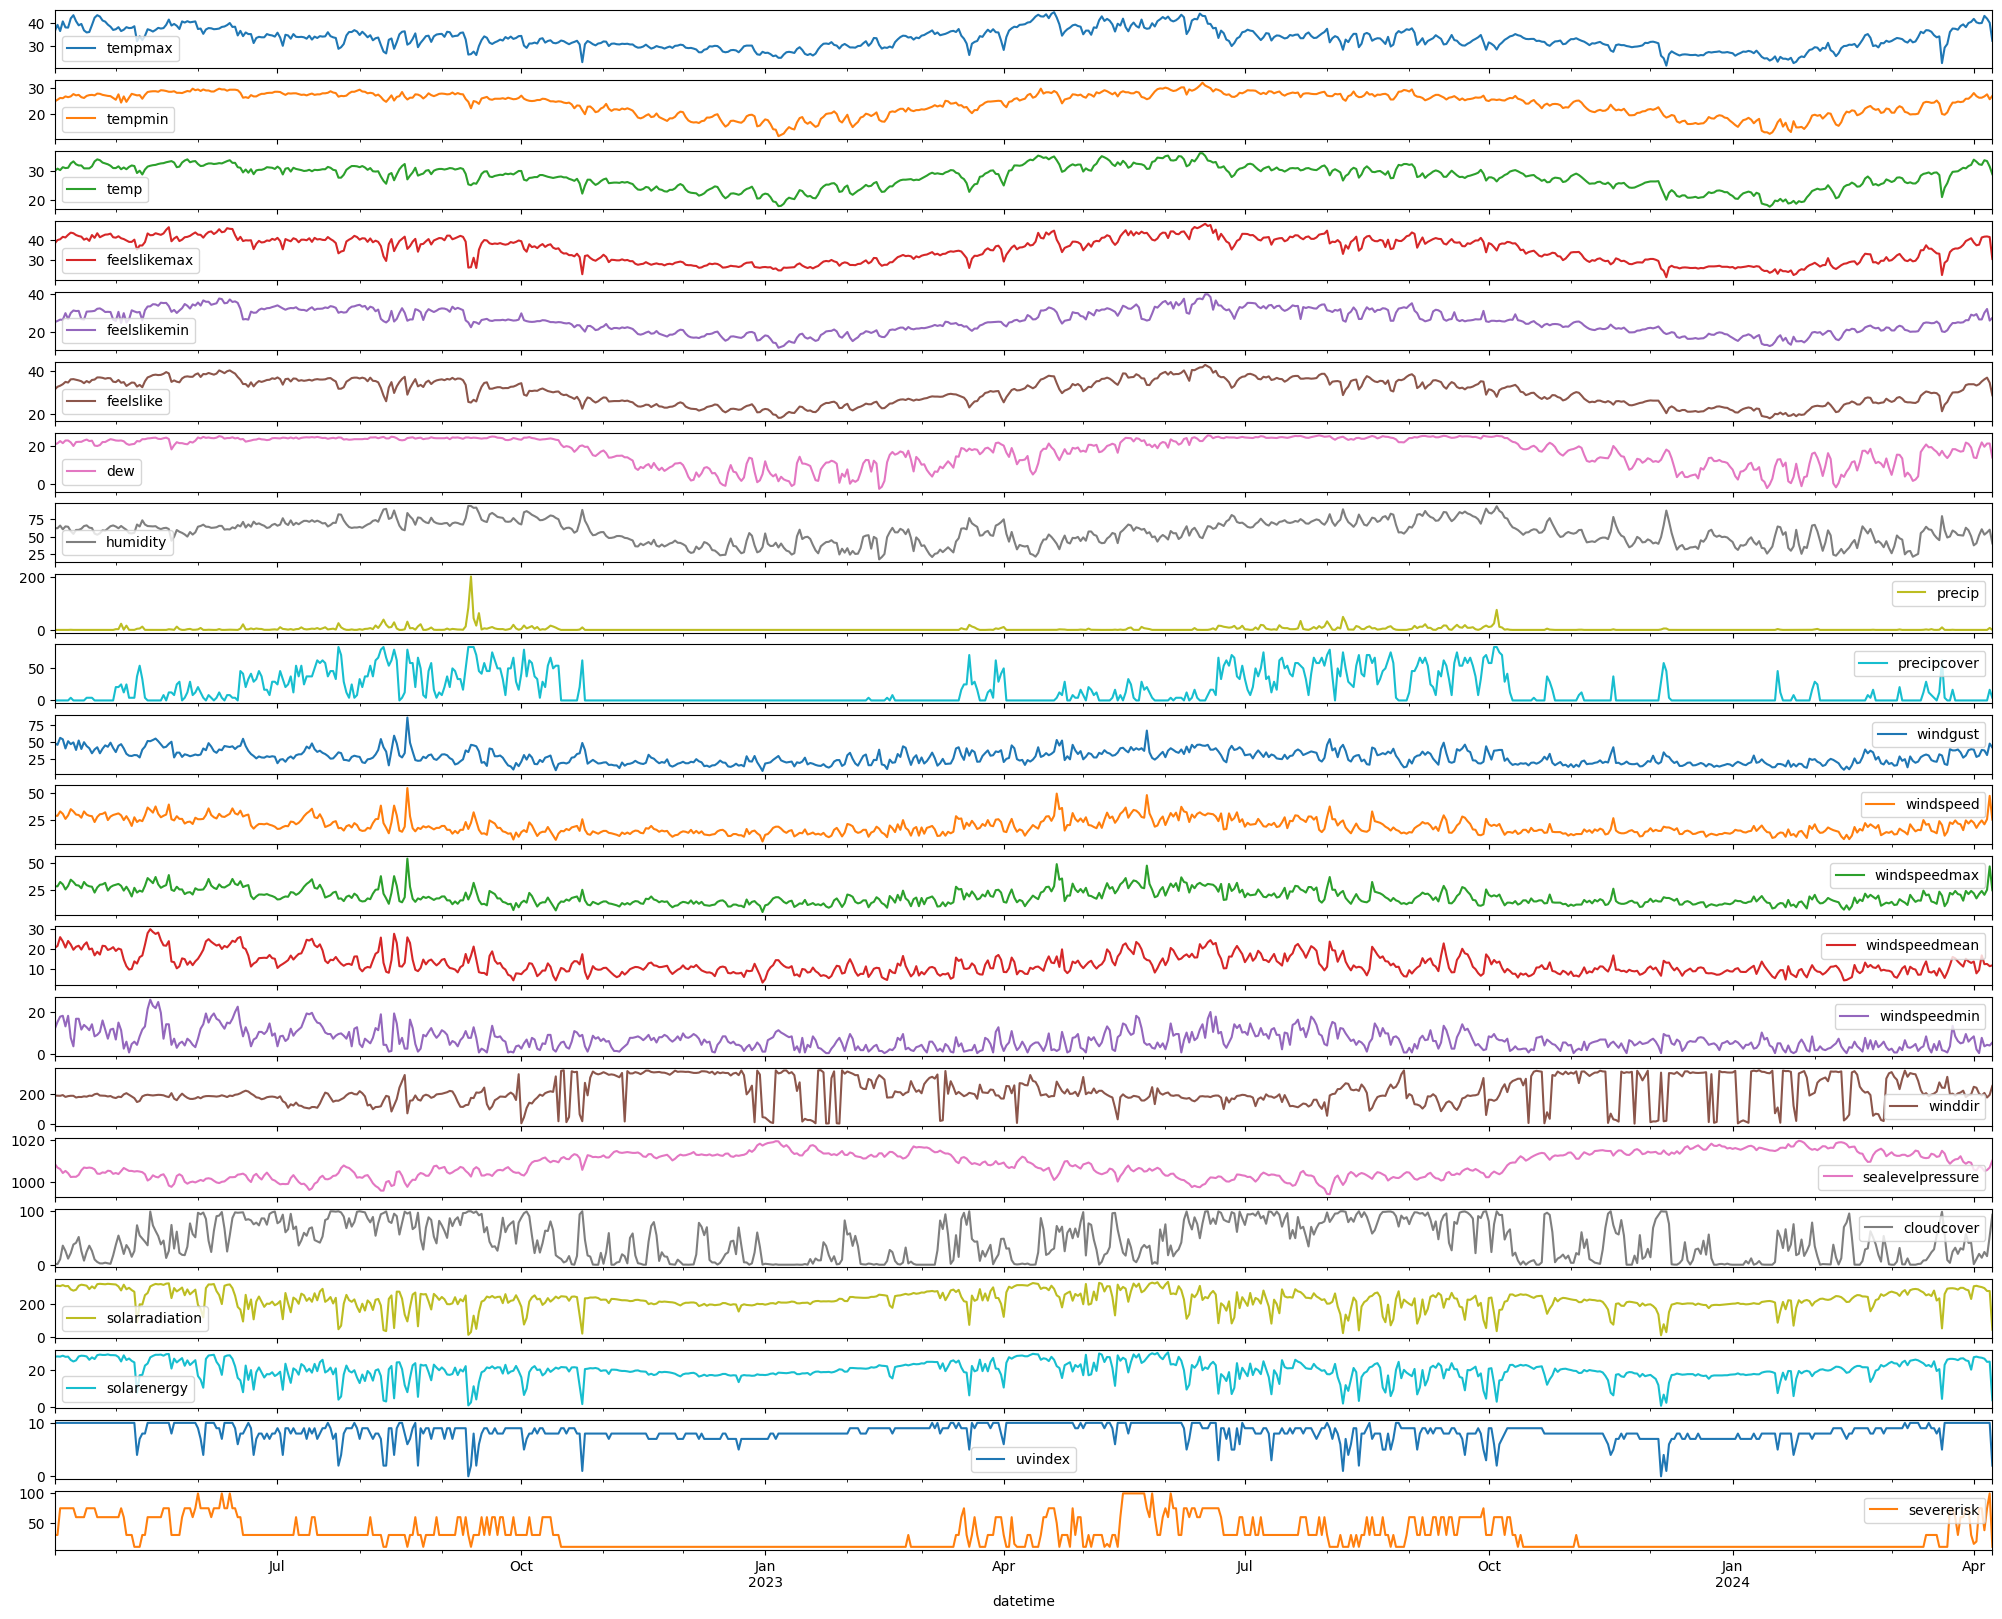

In [ ]:
wb_df_pca.plot(subplots=True, figsize=(25,20))

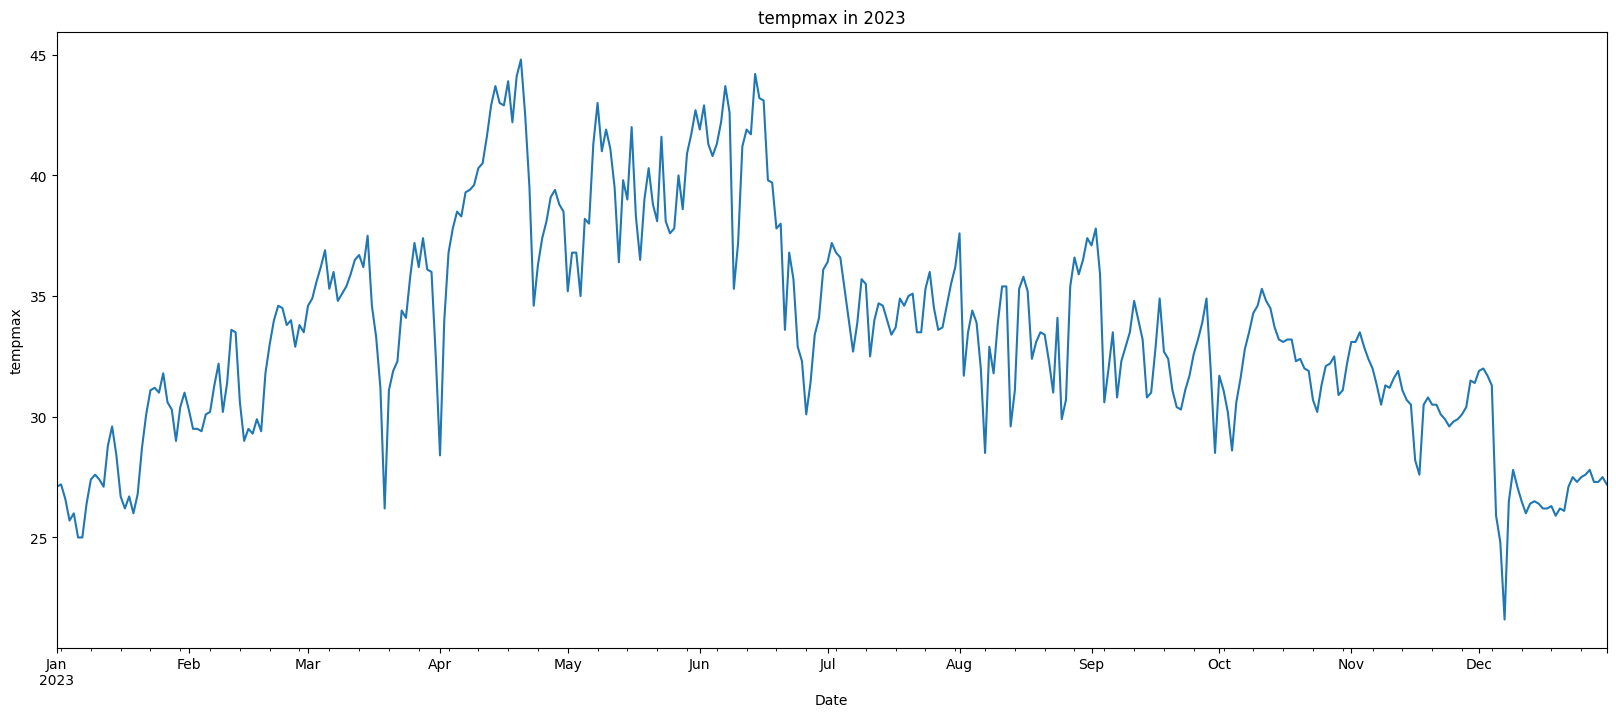

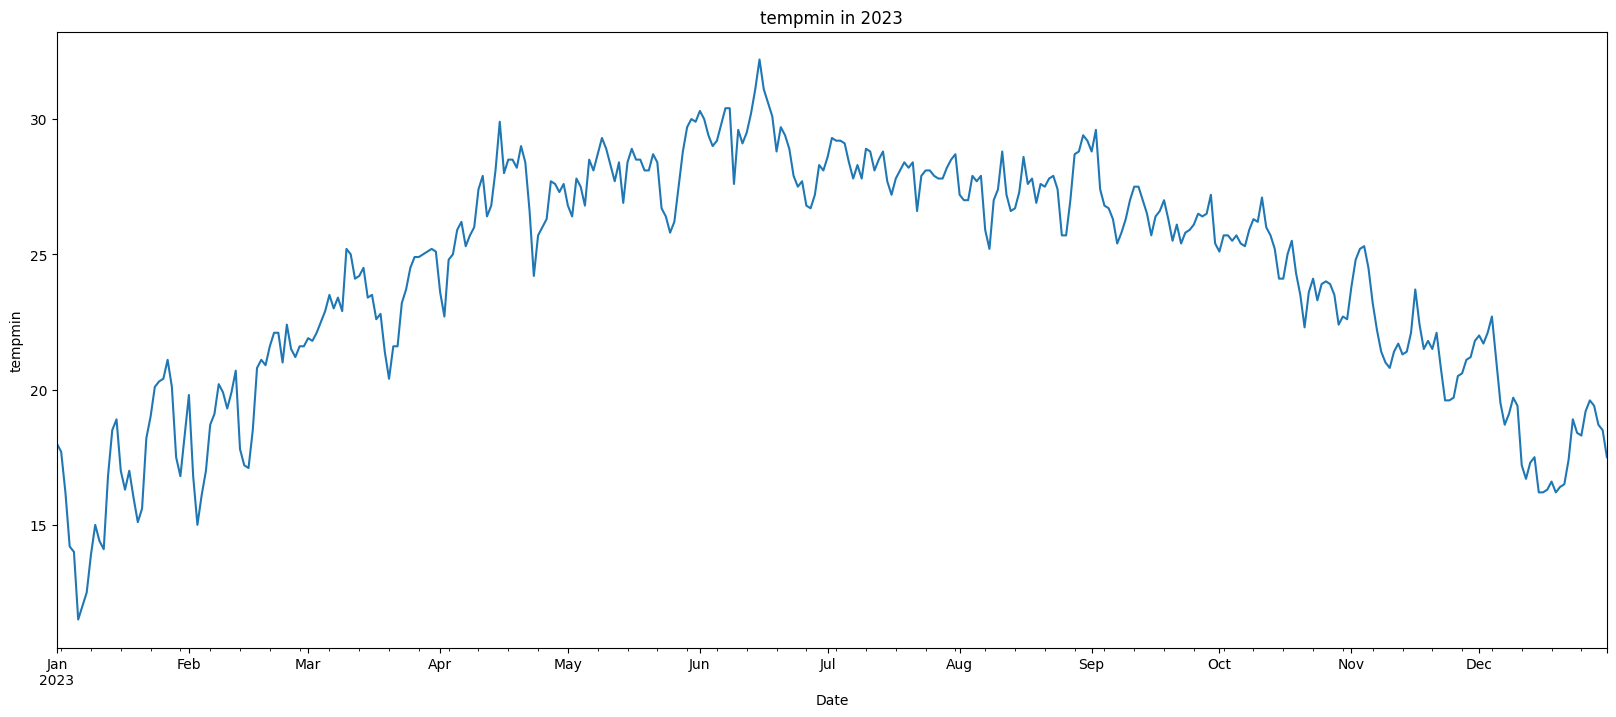

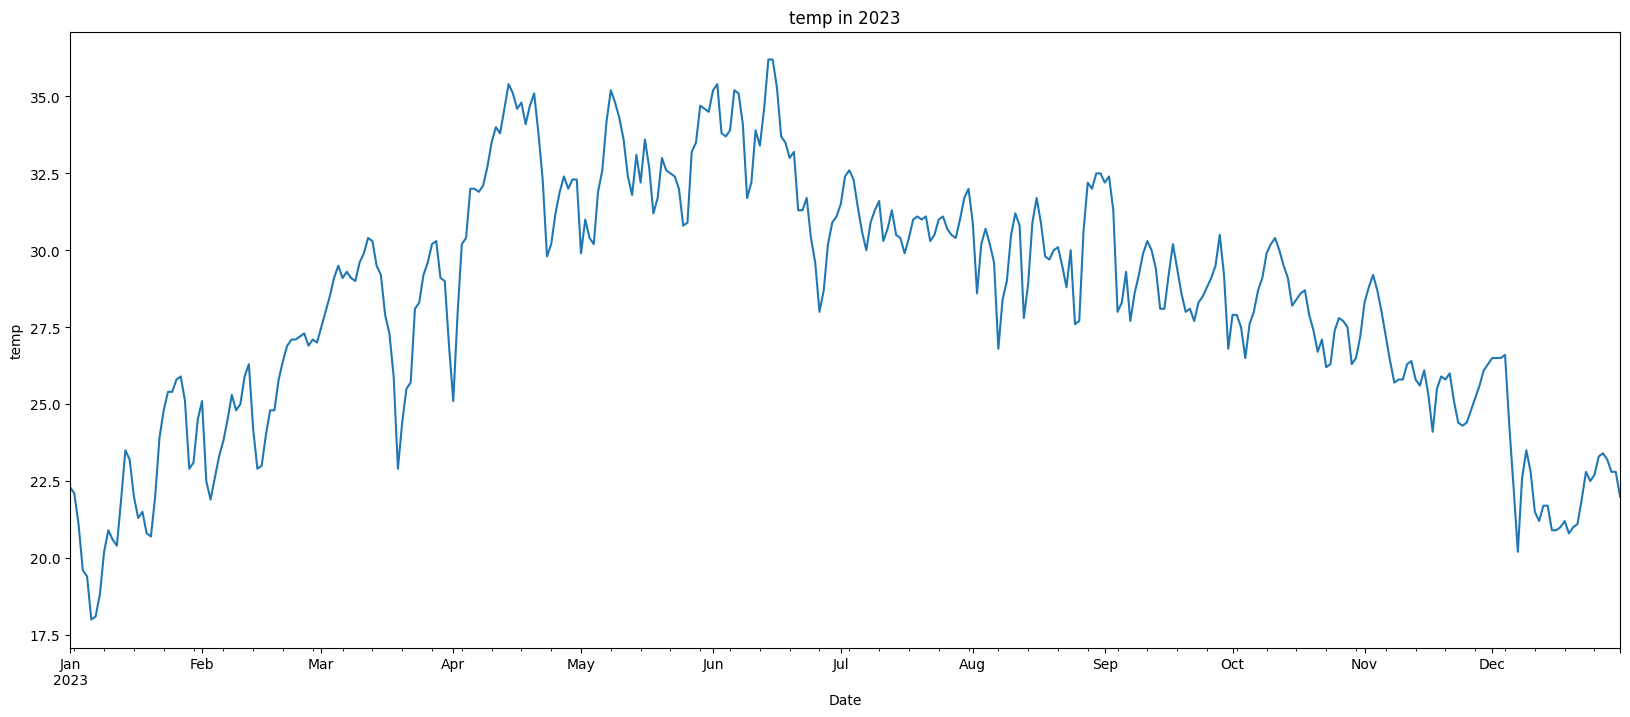

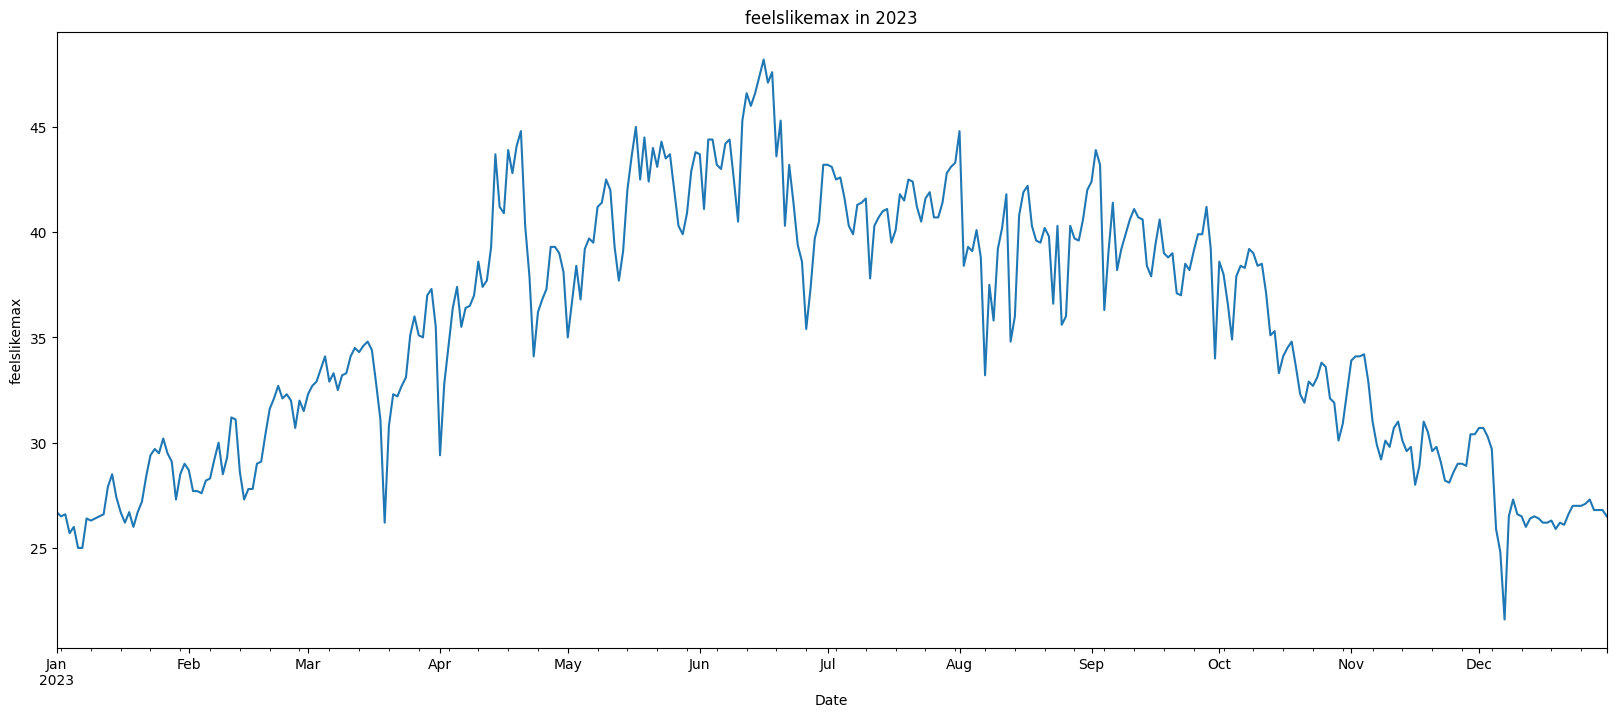

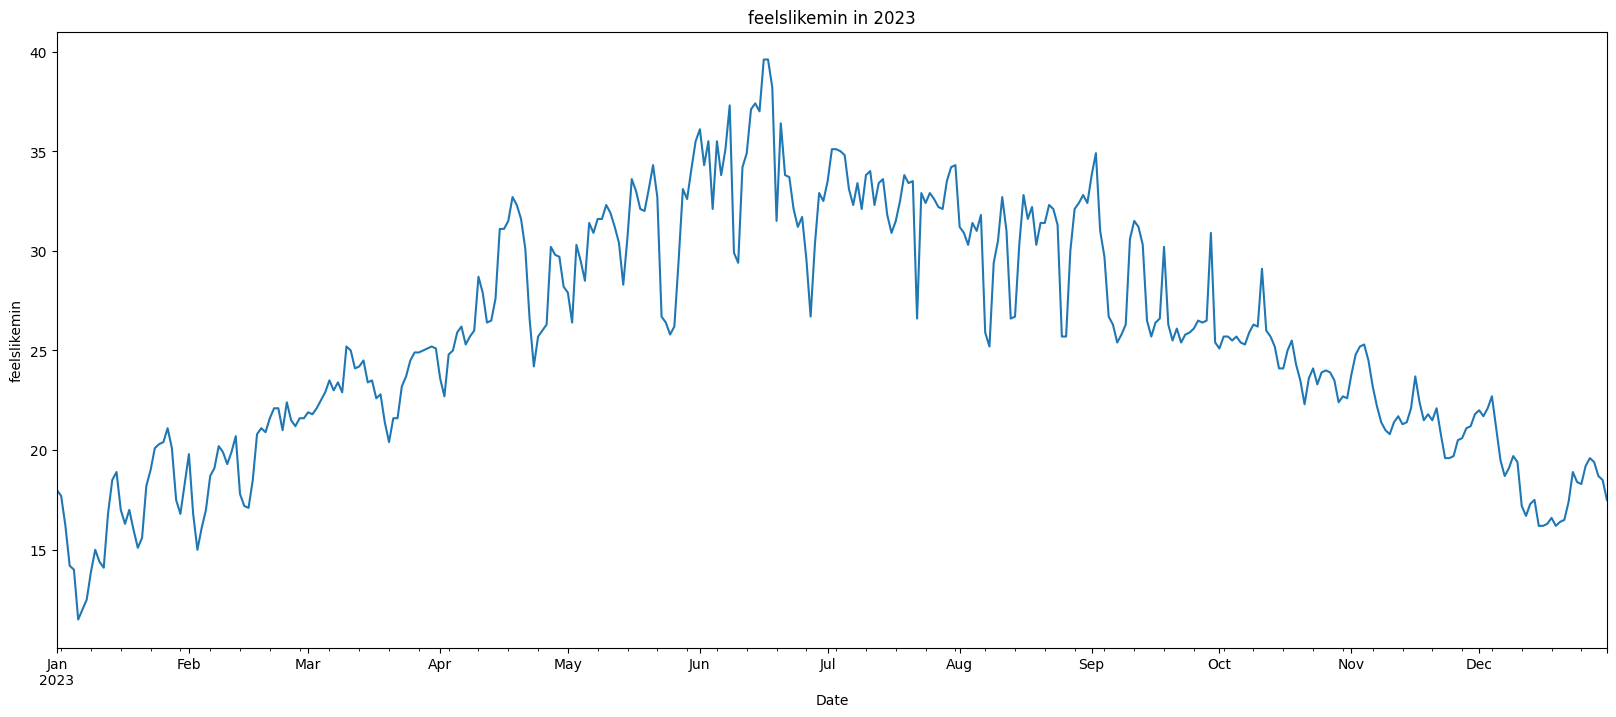

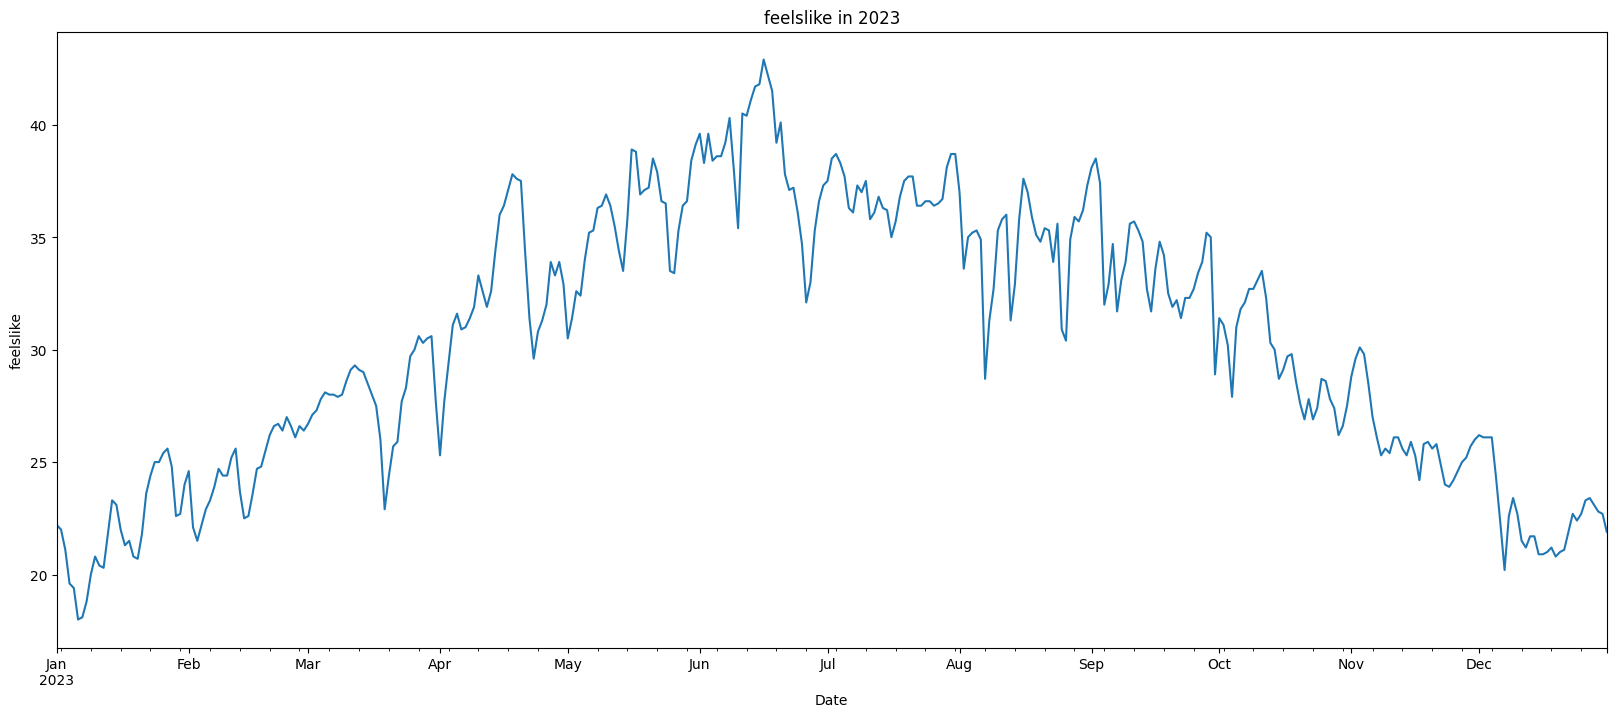

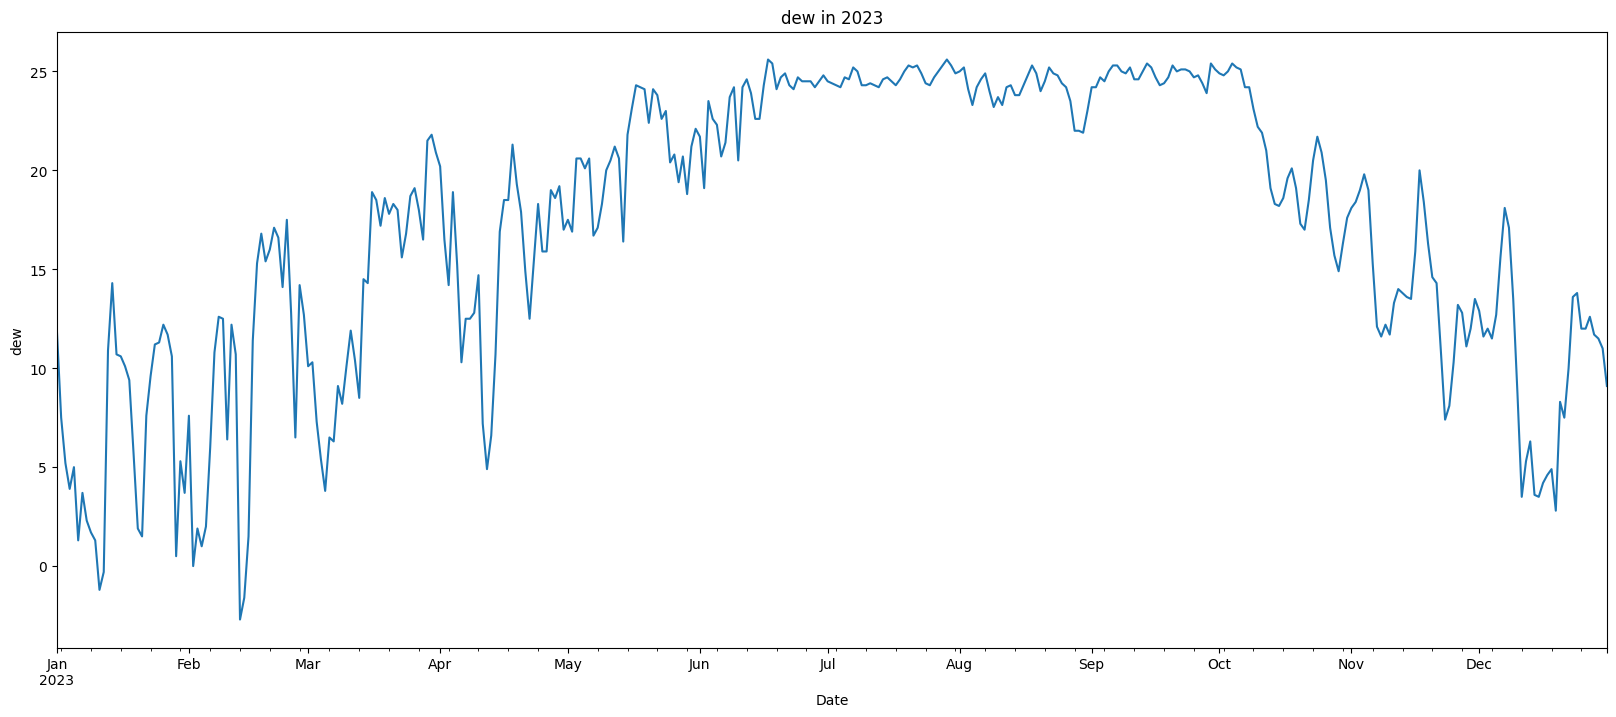

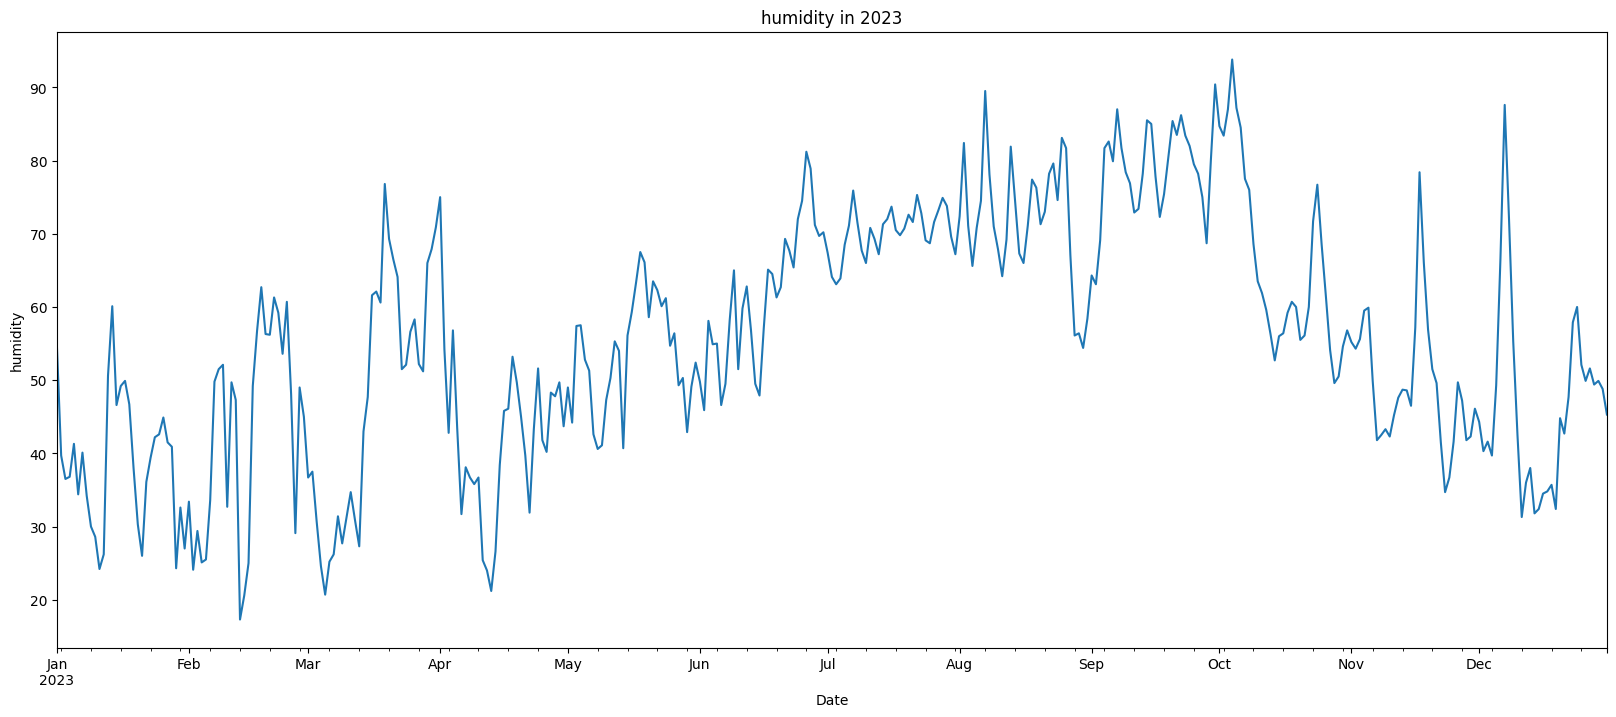

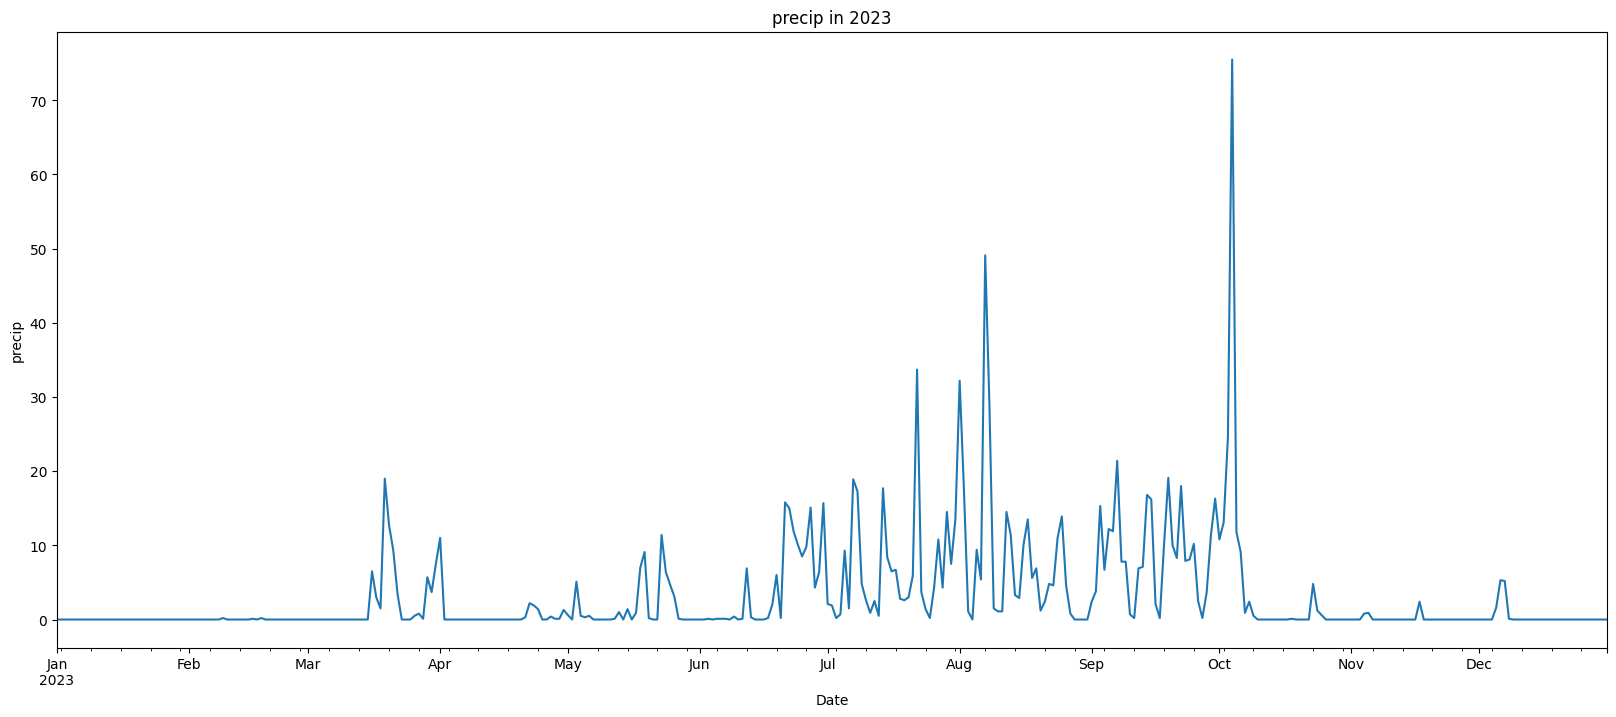

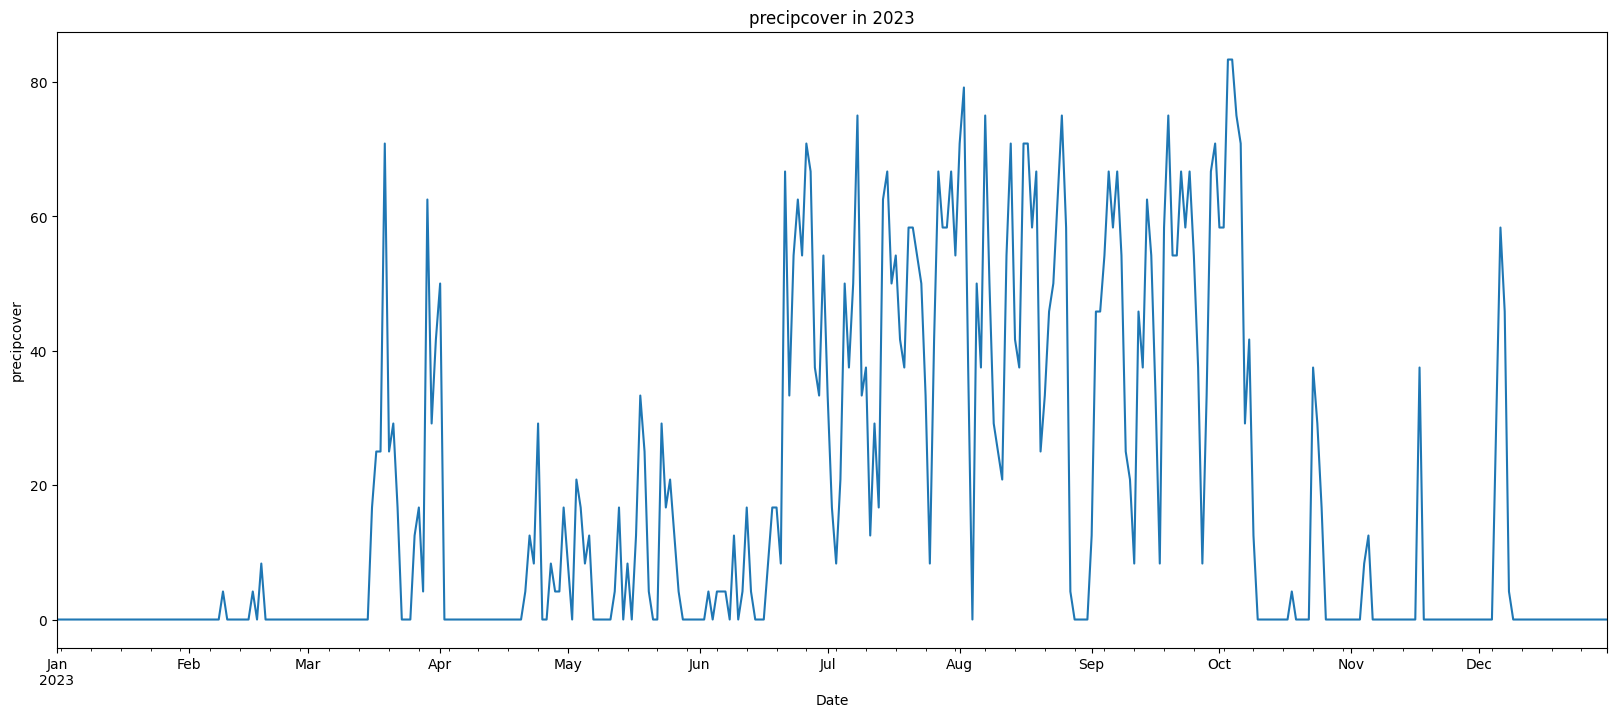

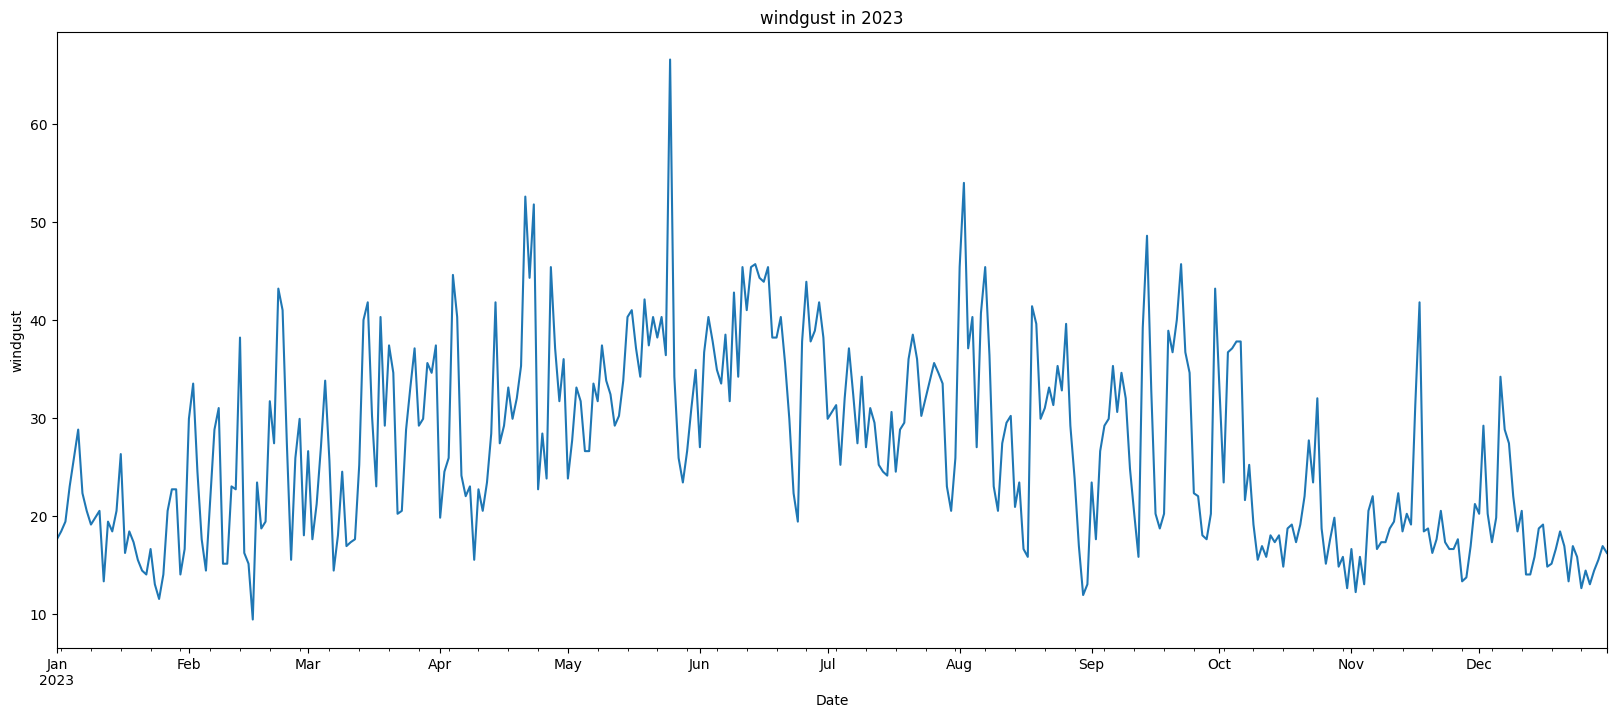

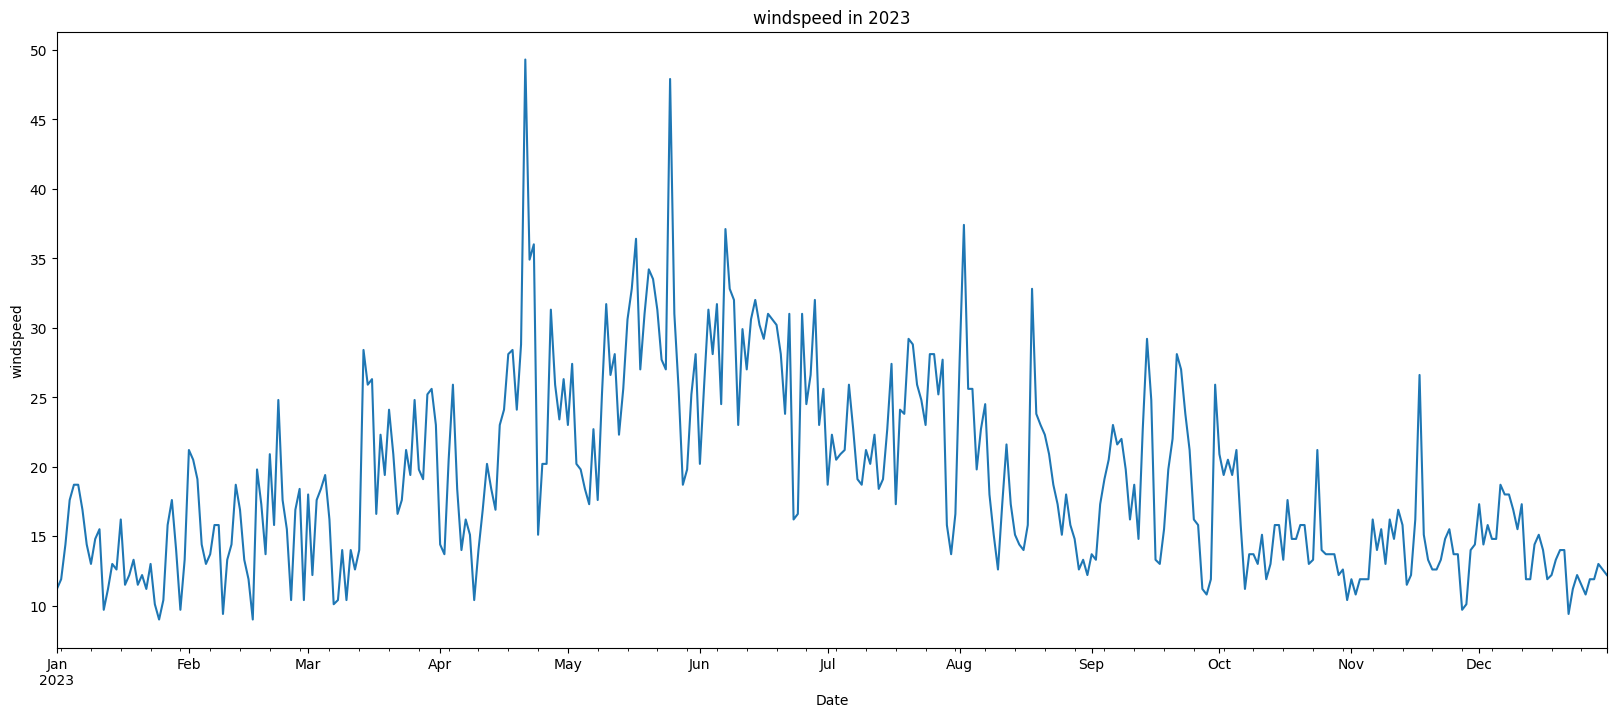

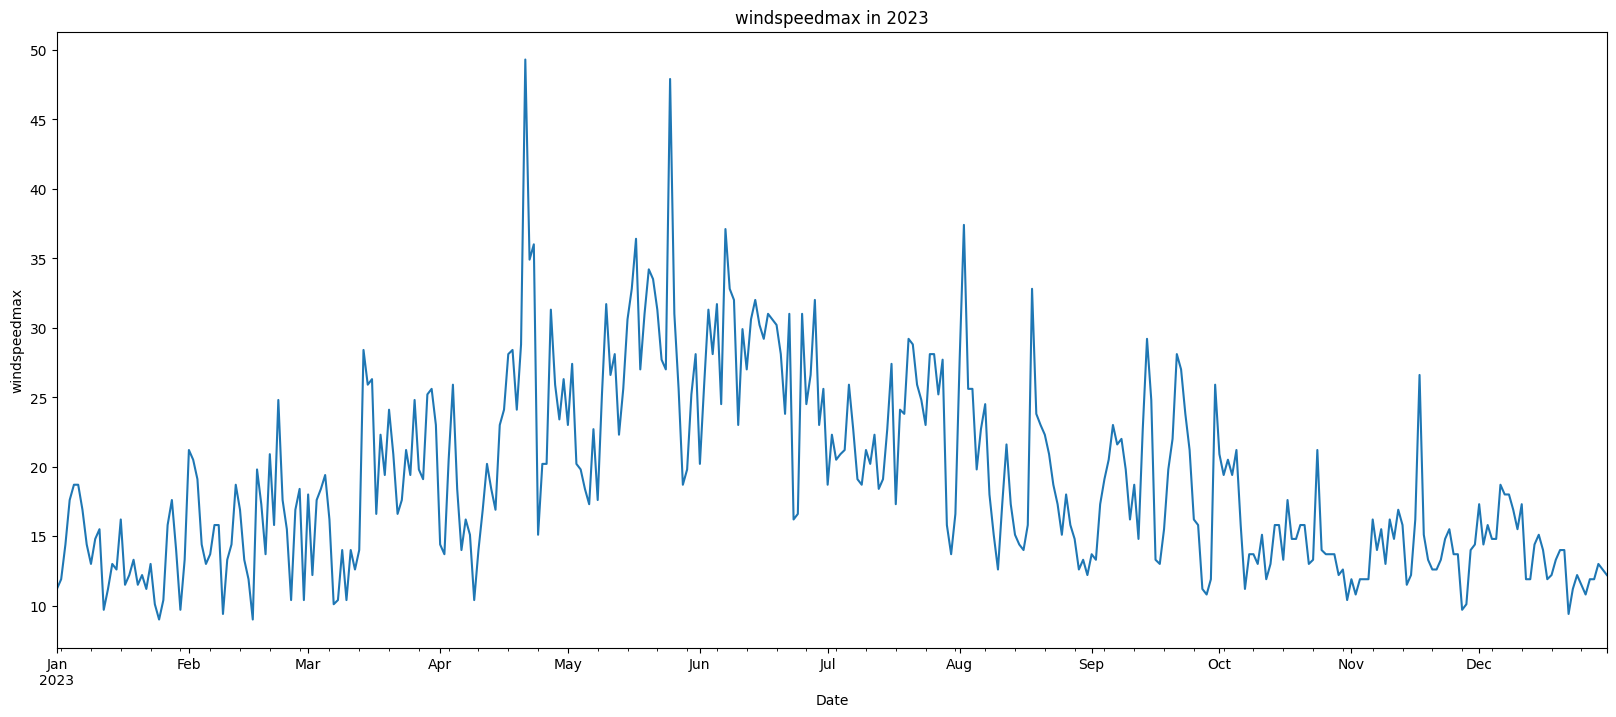

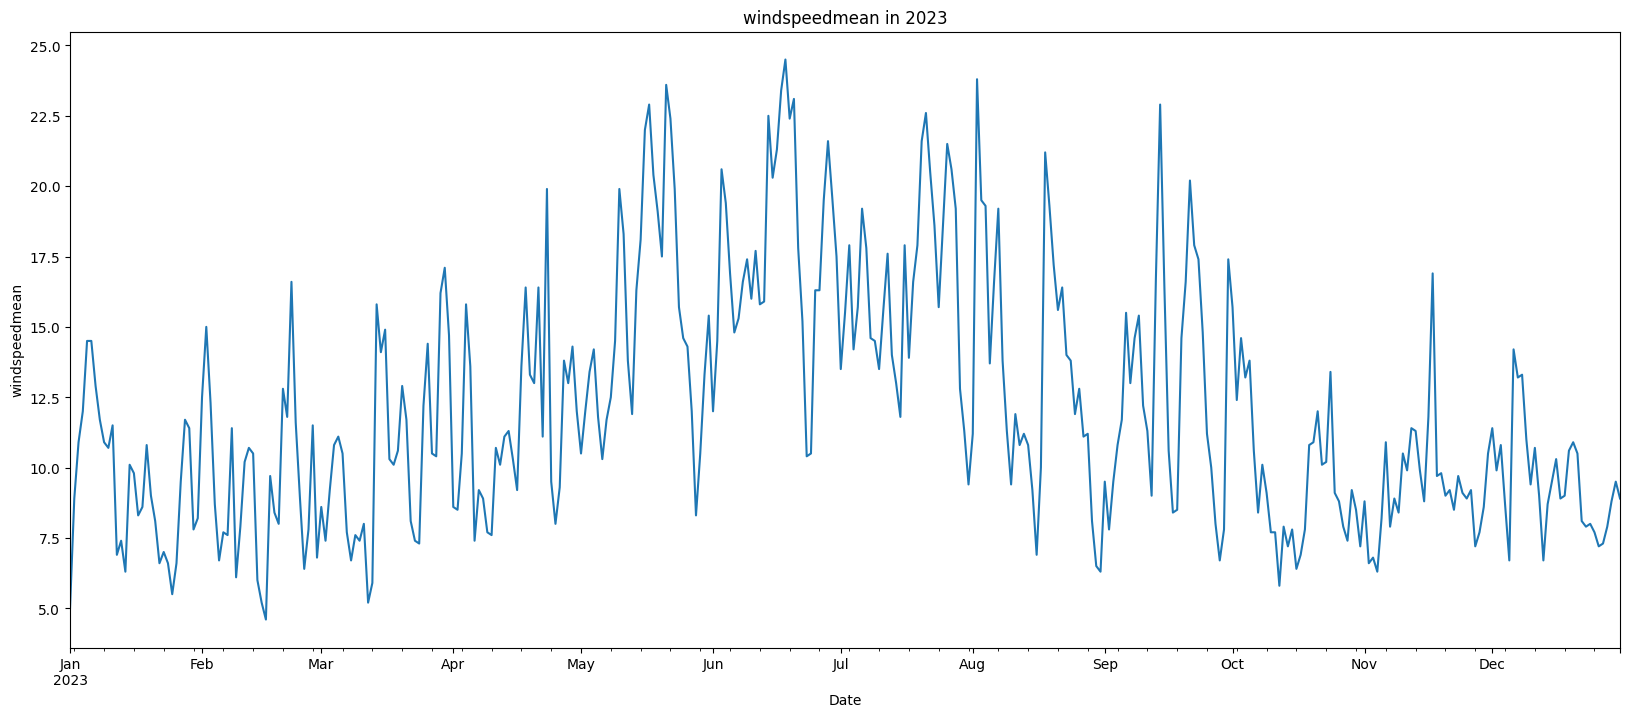

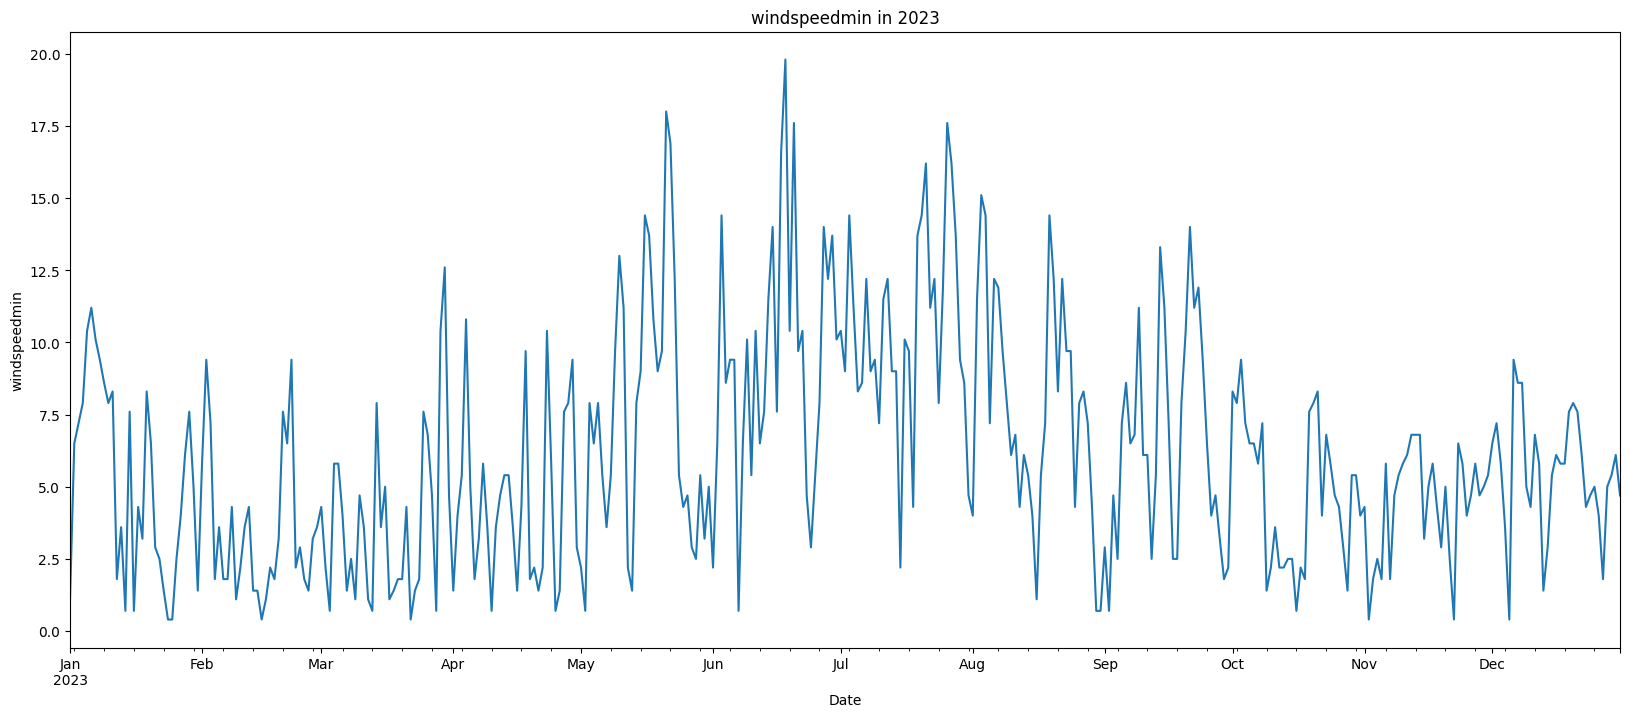

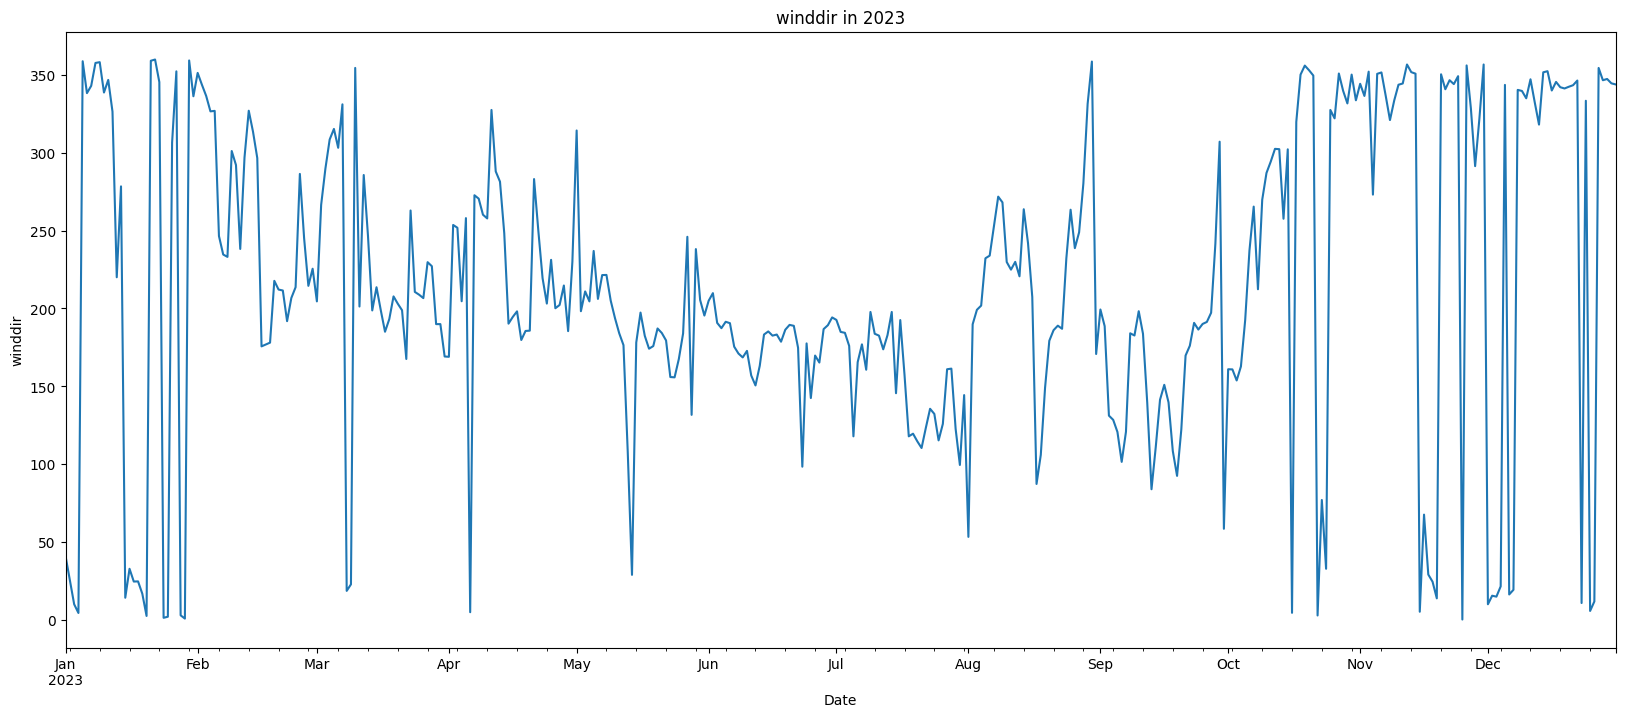

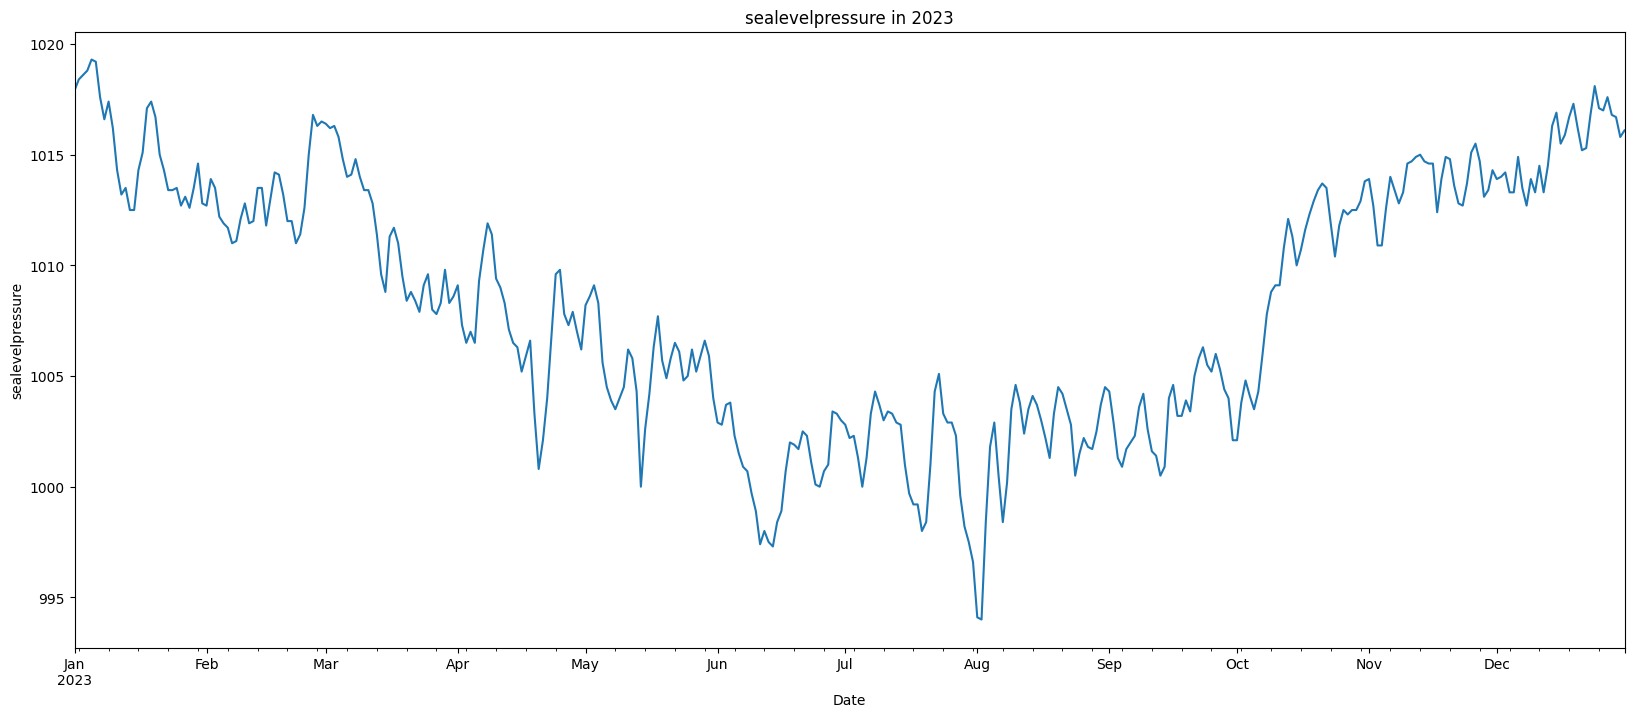

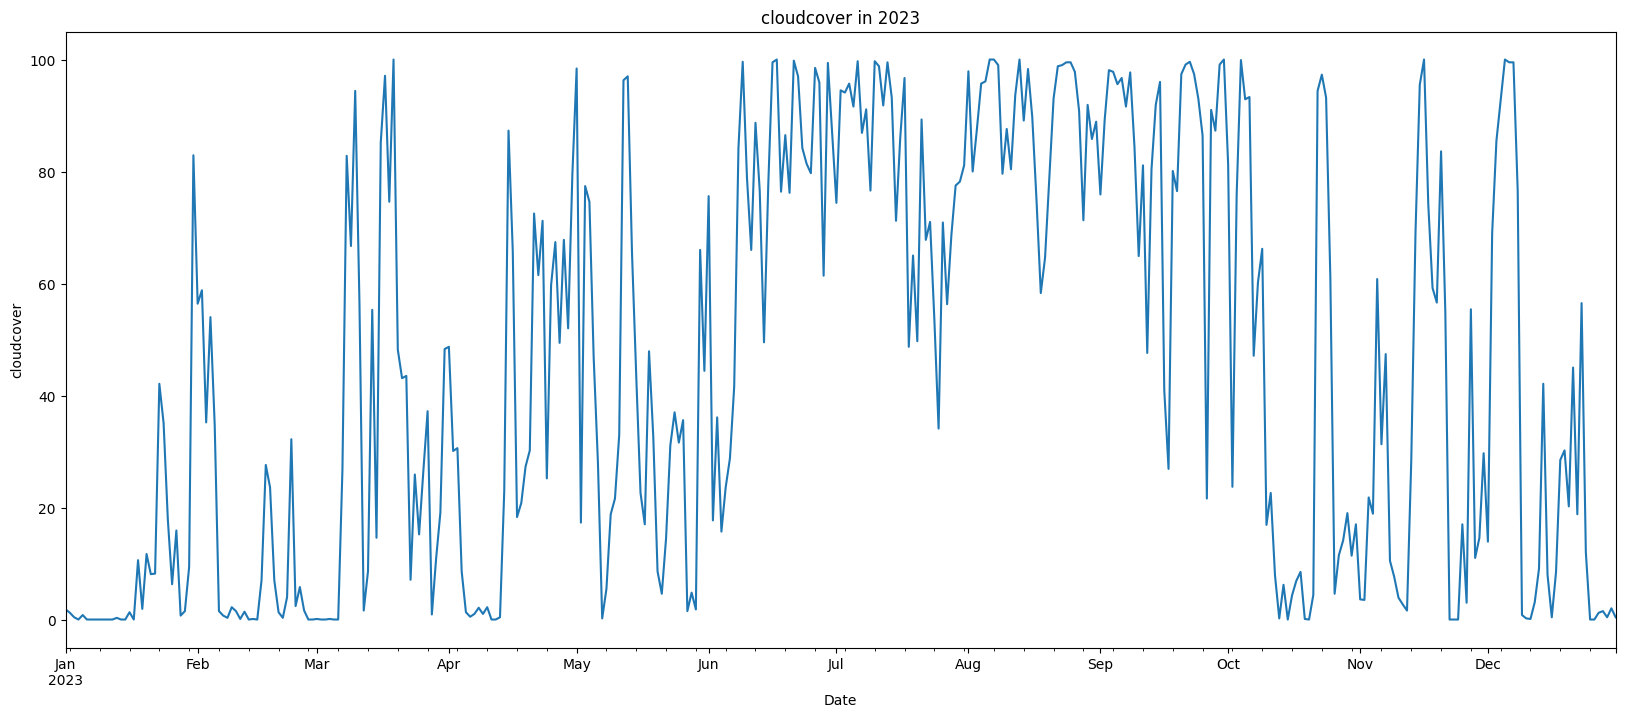

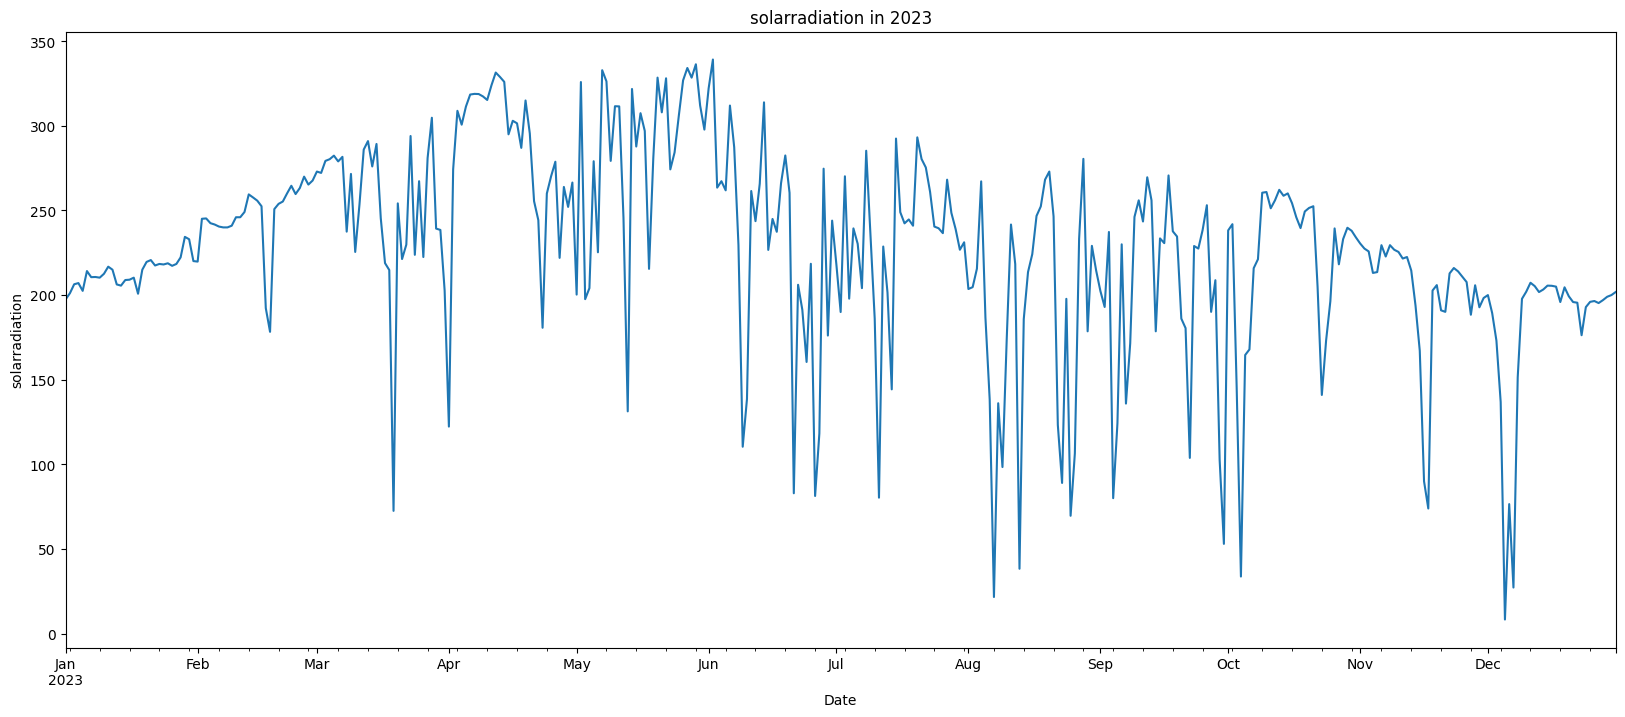

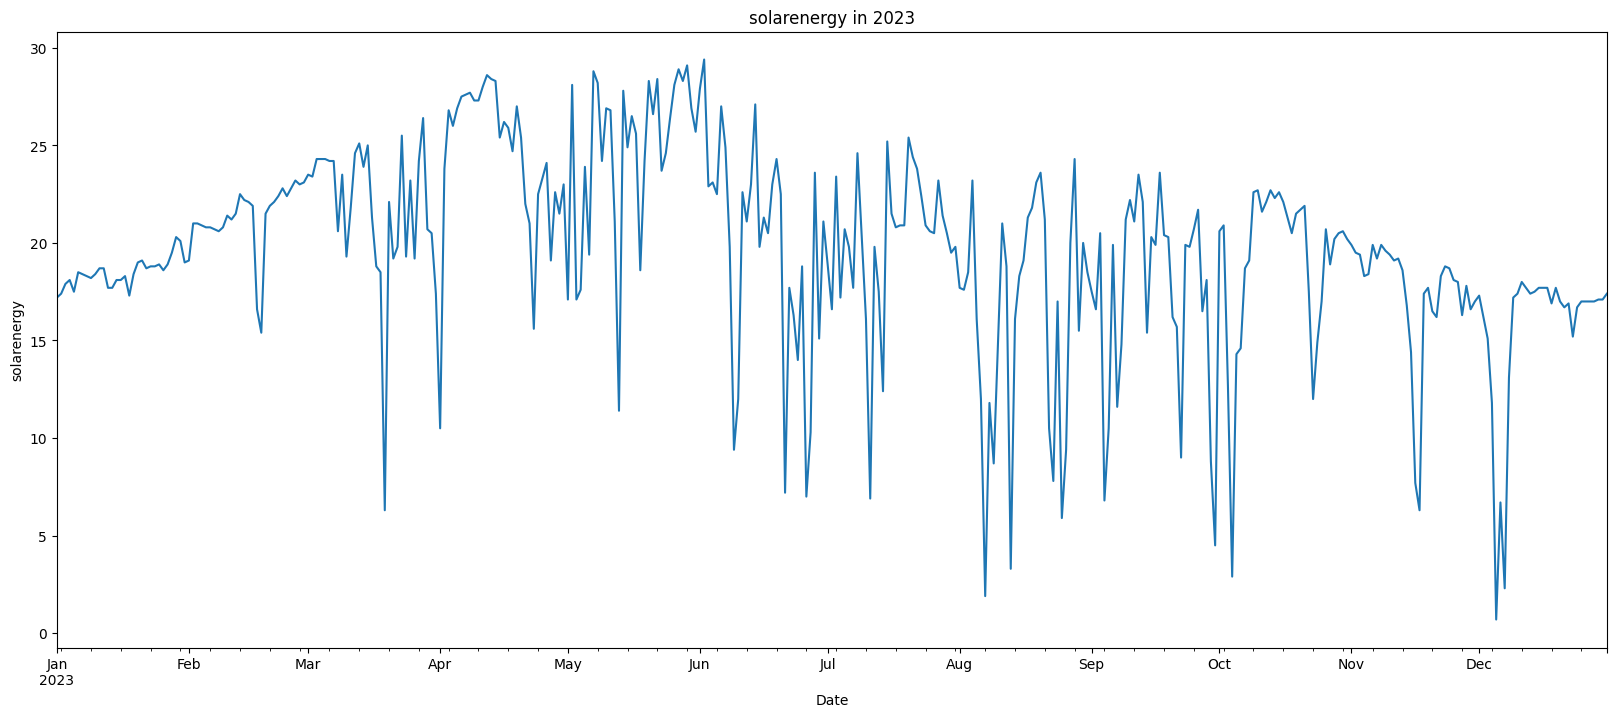

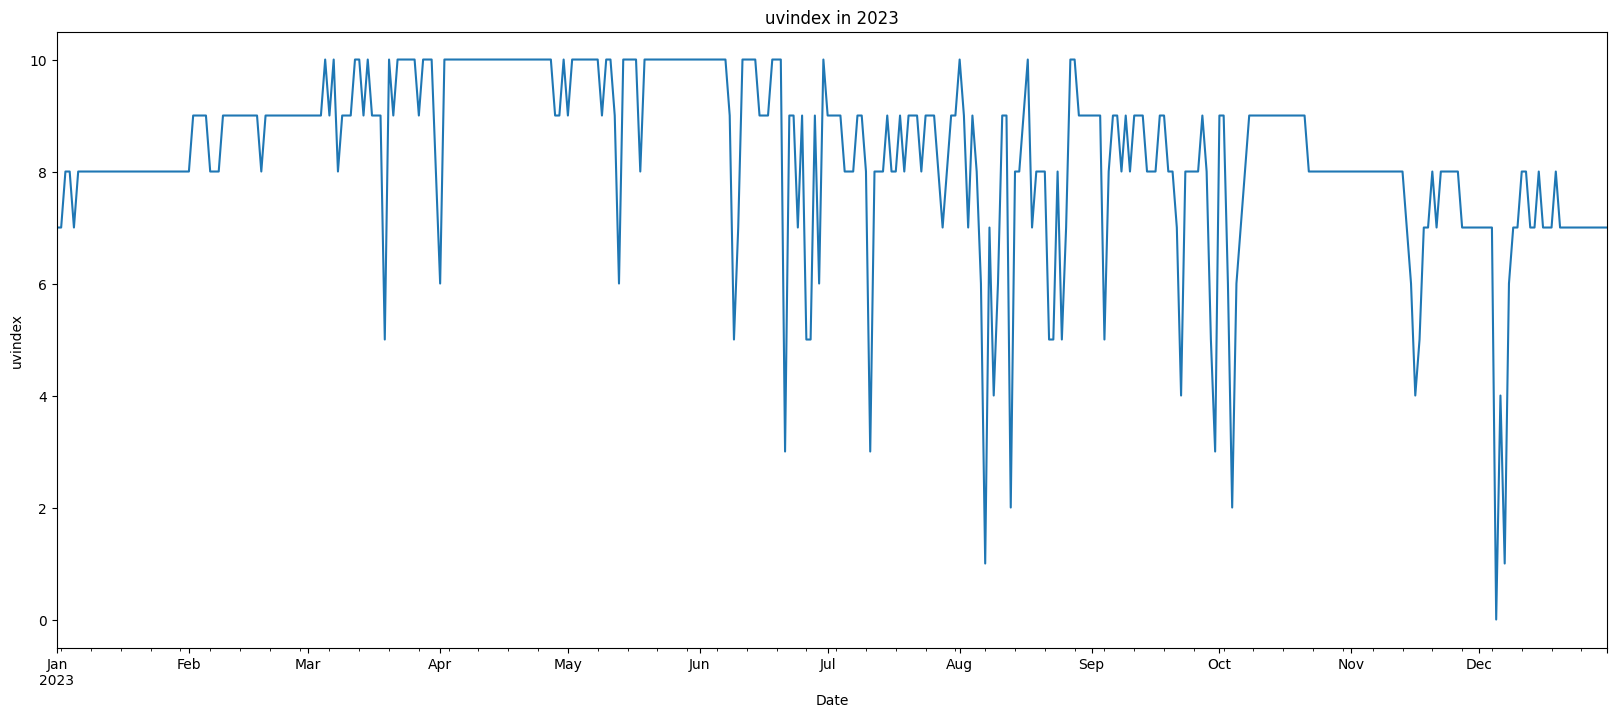

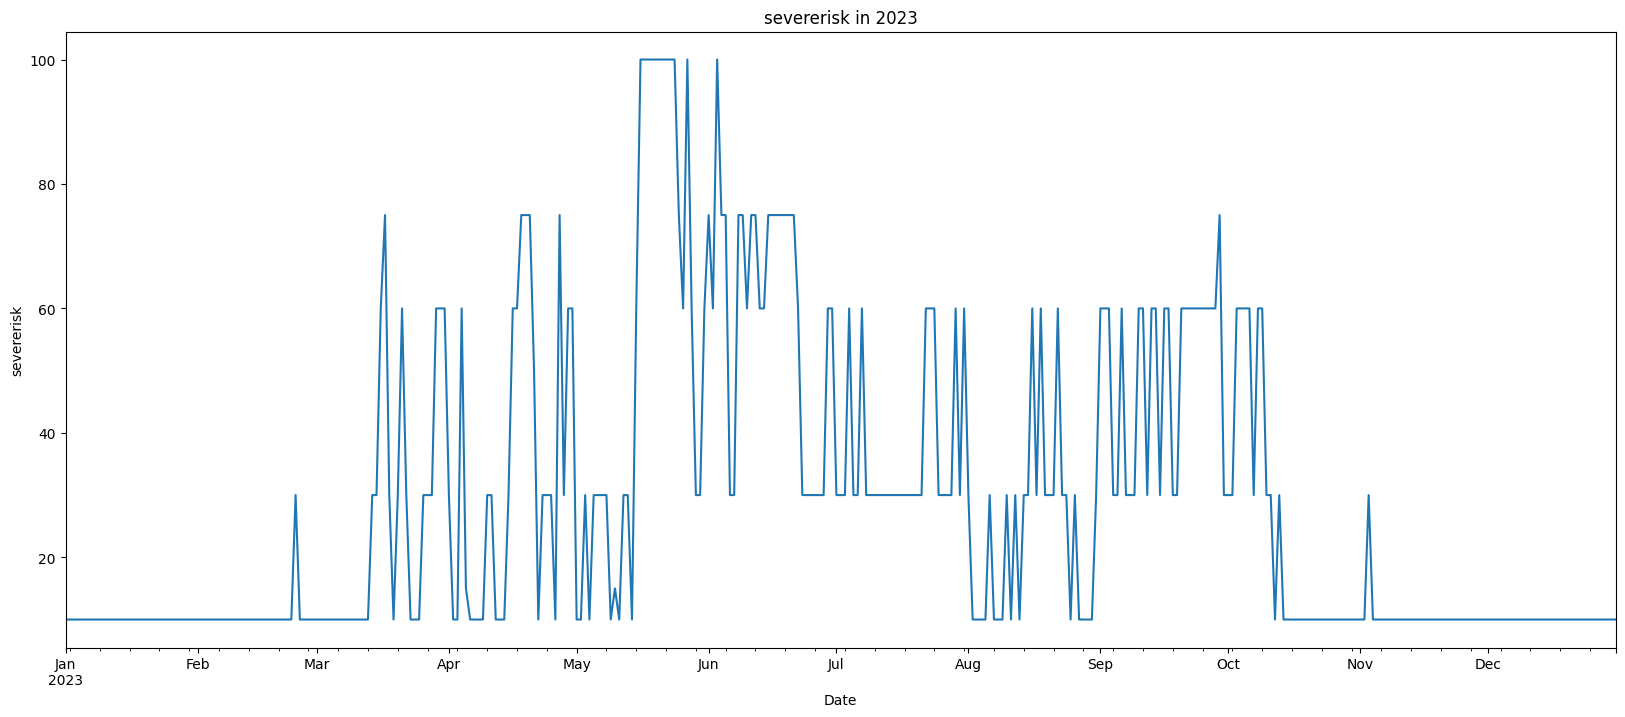

In [ ]:
# prompt: plot data of all subplots  of only year 2023

import matplotlib.pyplot as plt
# Plot data for the year 2023
for col in wb_df_pca.columns:
  plt.figure(figsize=(20,8))
  wb_df_pca[col][wb_df_pca.index.year == 2023].plot()
  plt.title(f'{col} in 2023')
  plt.xlabel('Date')
  plt.ylabel(col)
  plt.show()

## Plot data in histogram for the year 2023

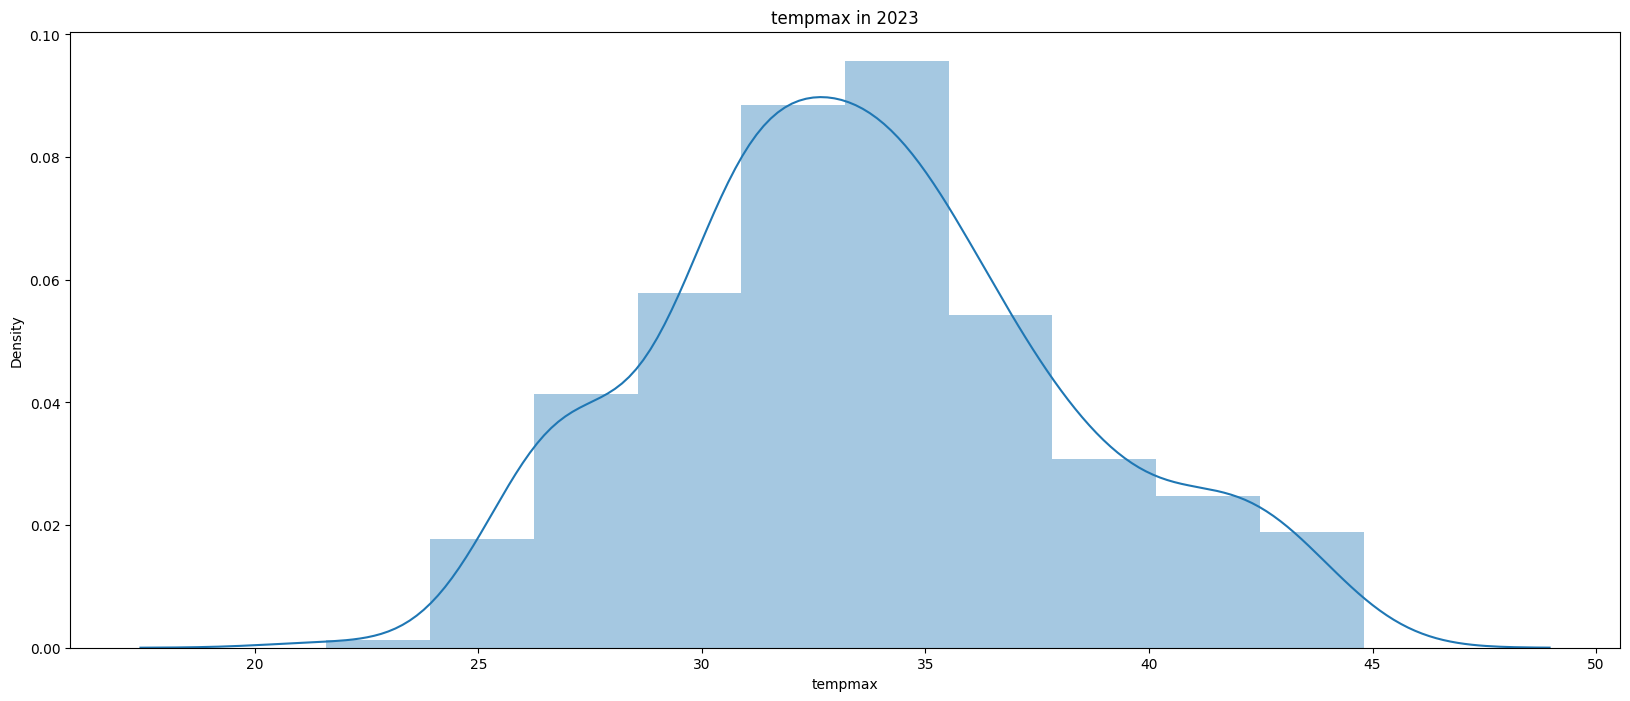

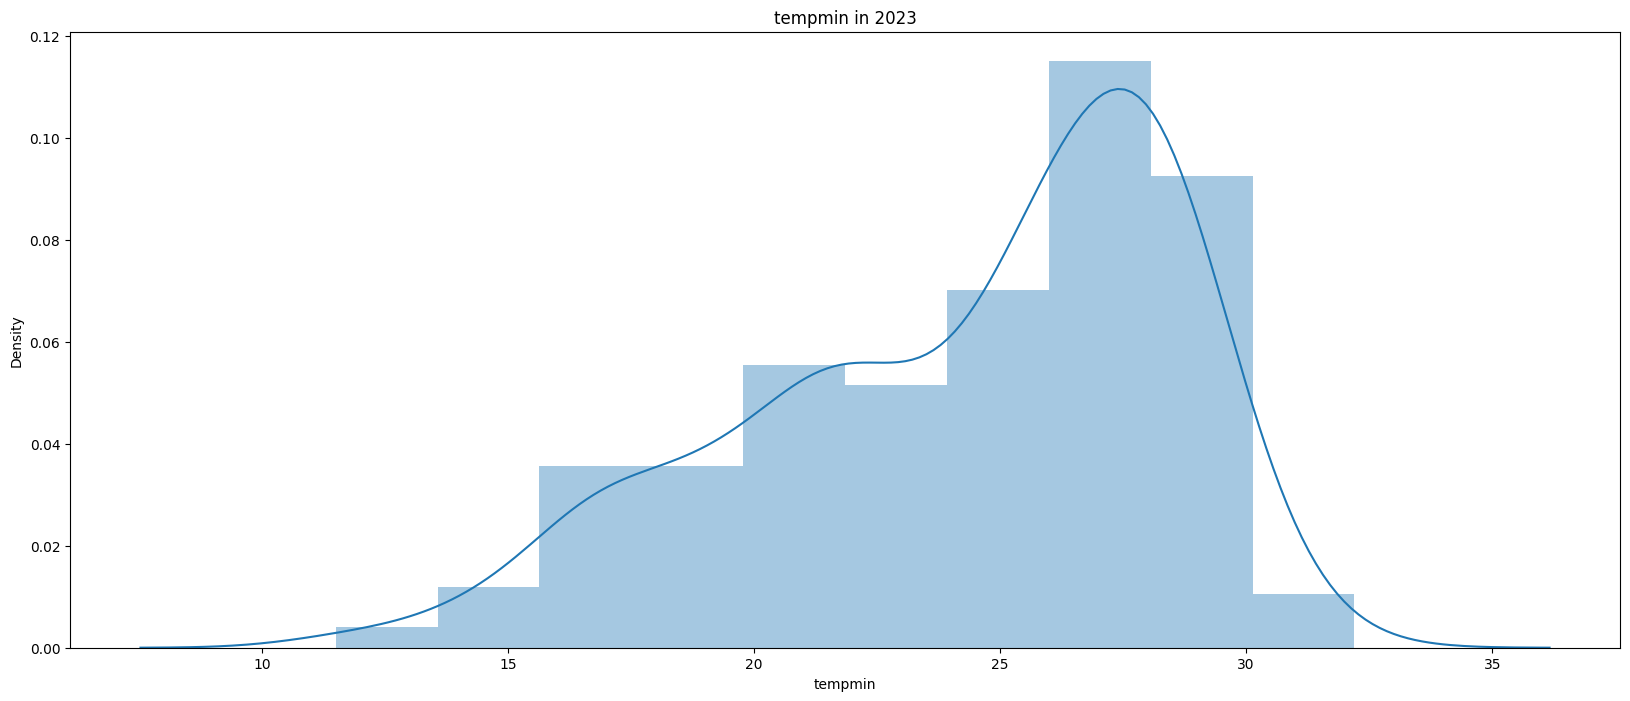

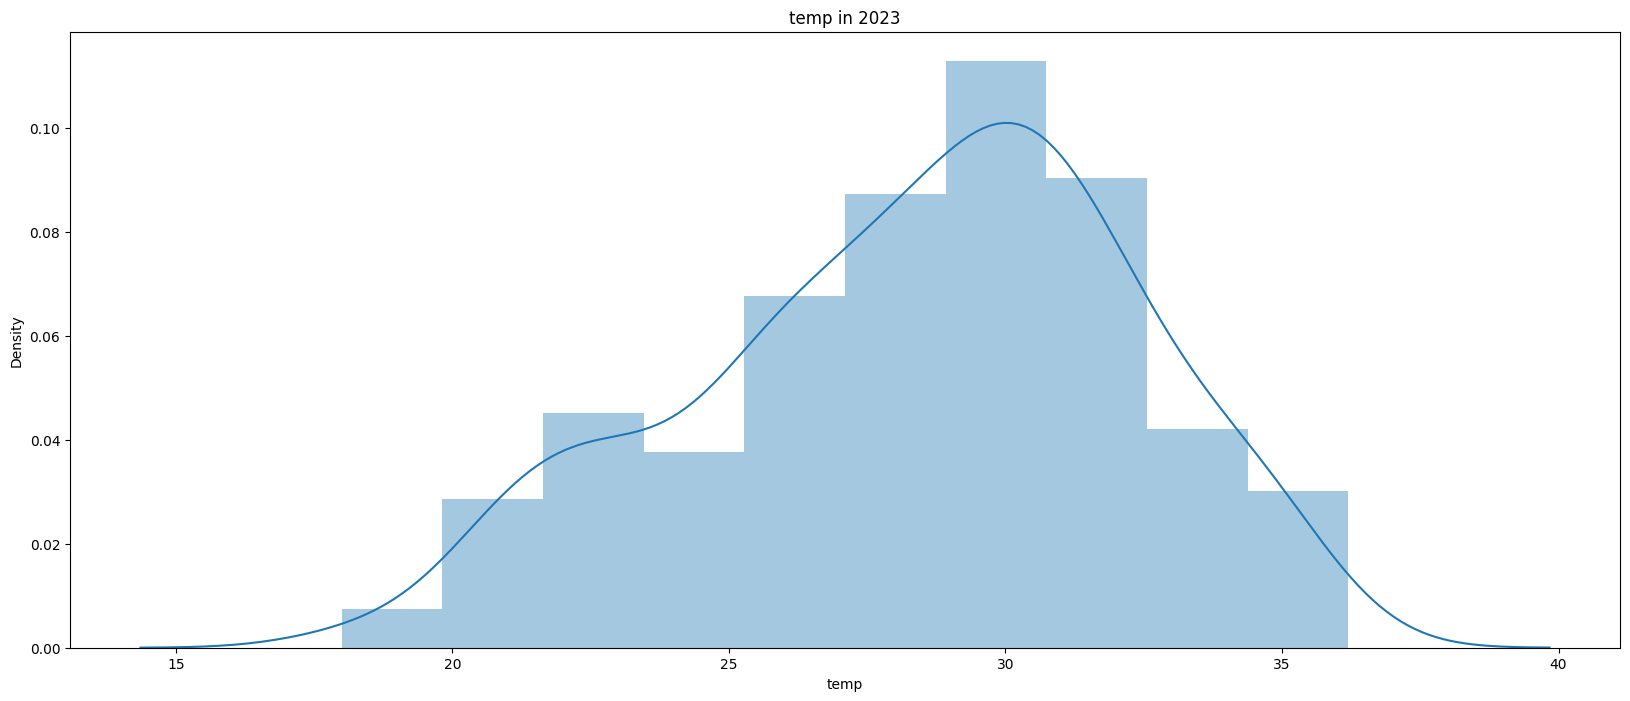

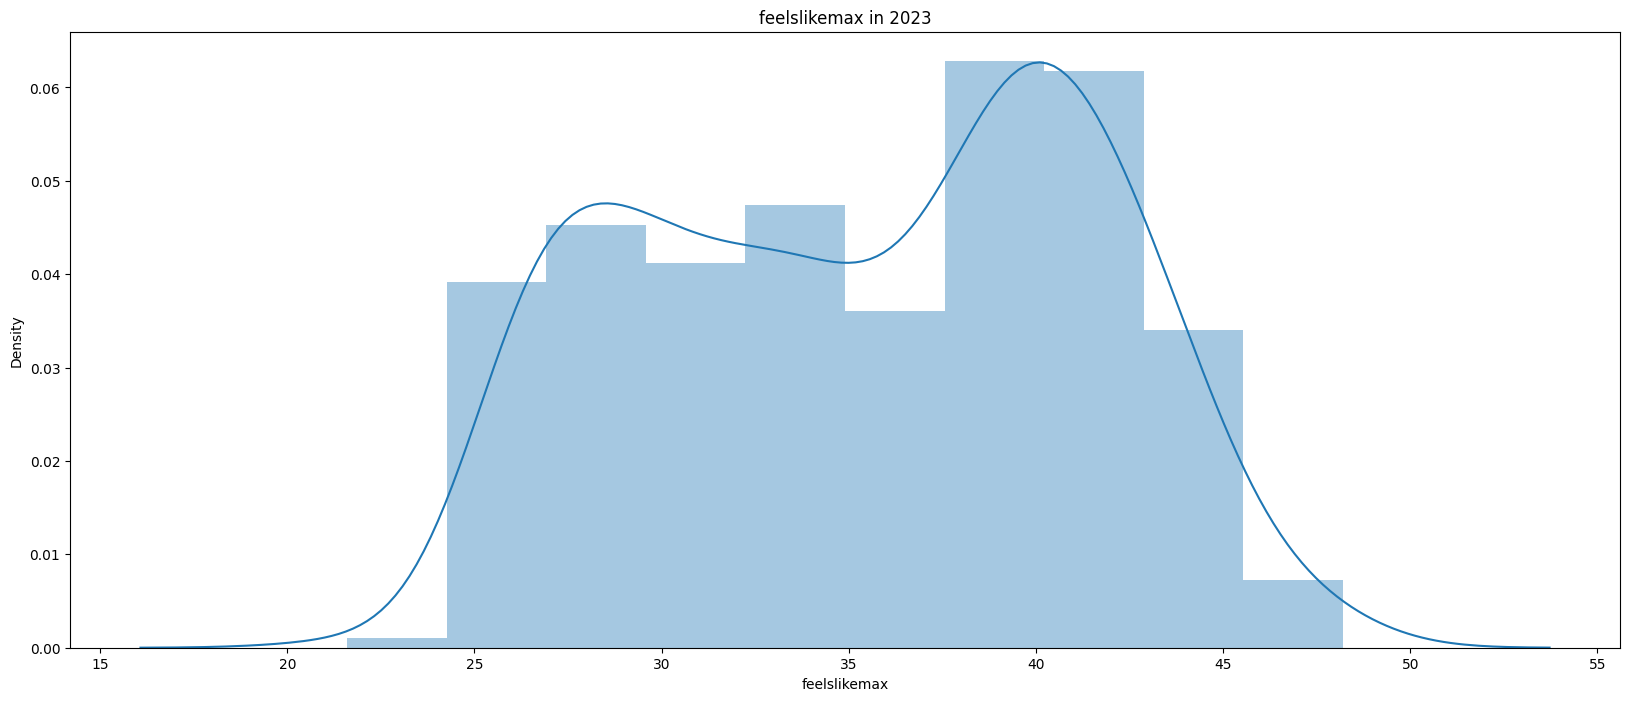

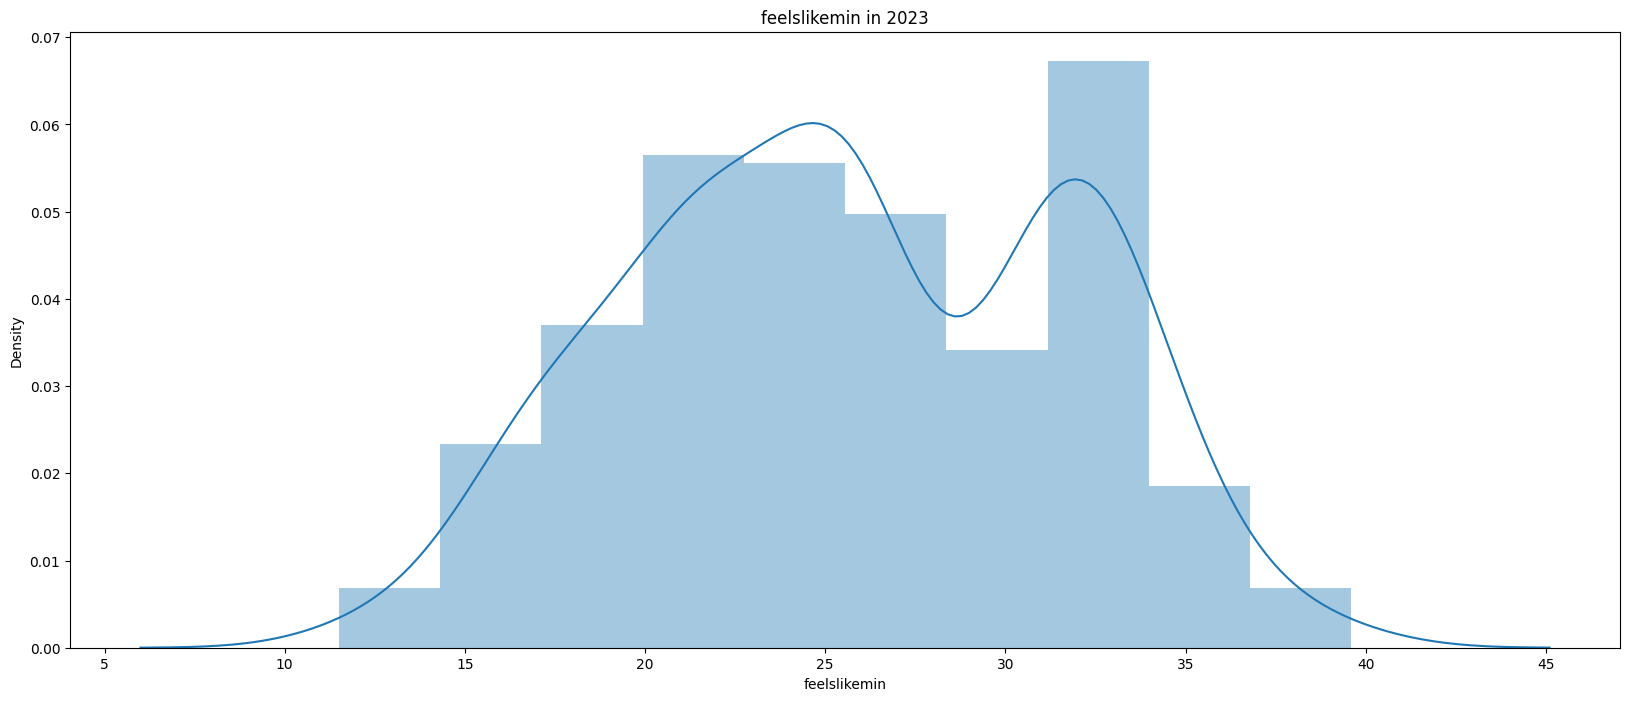

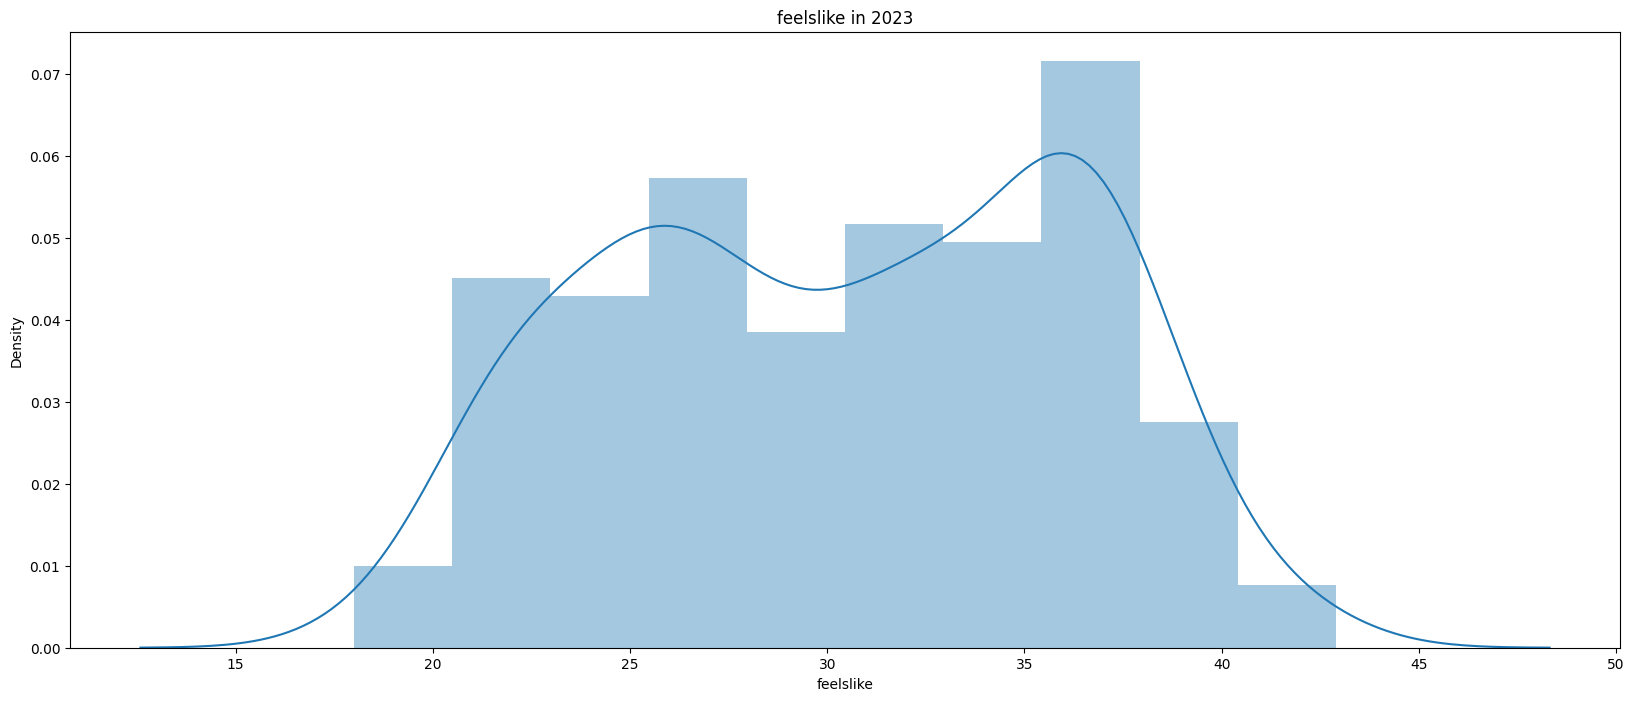

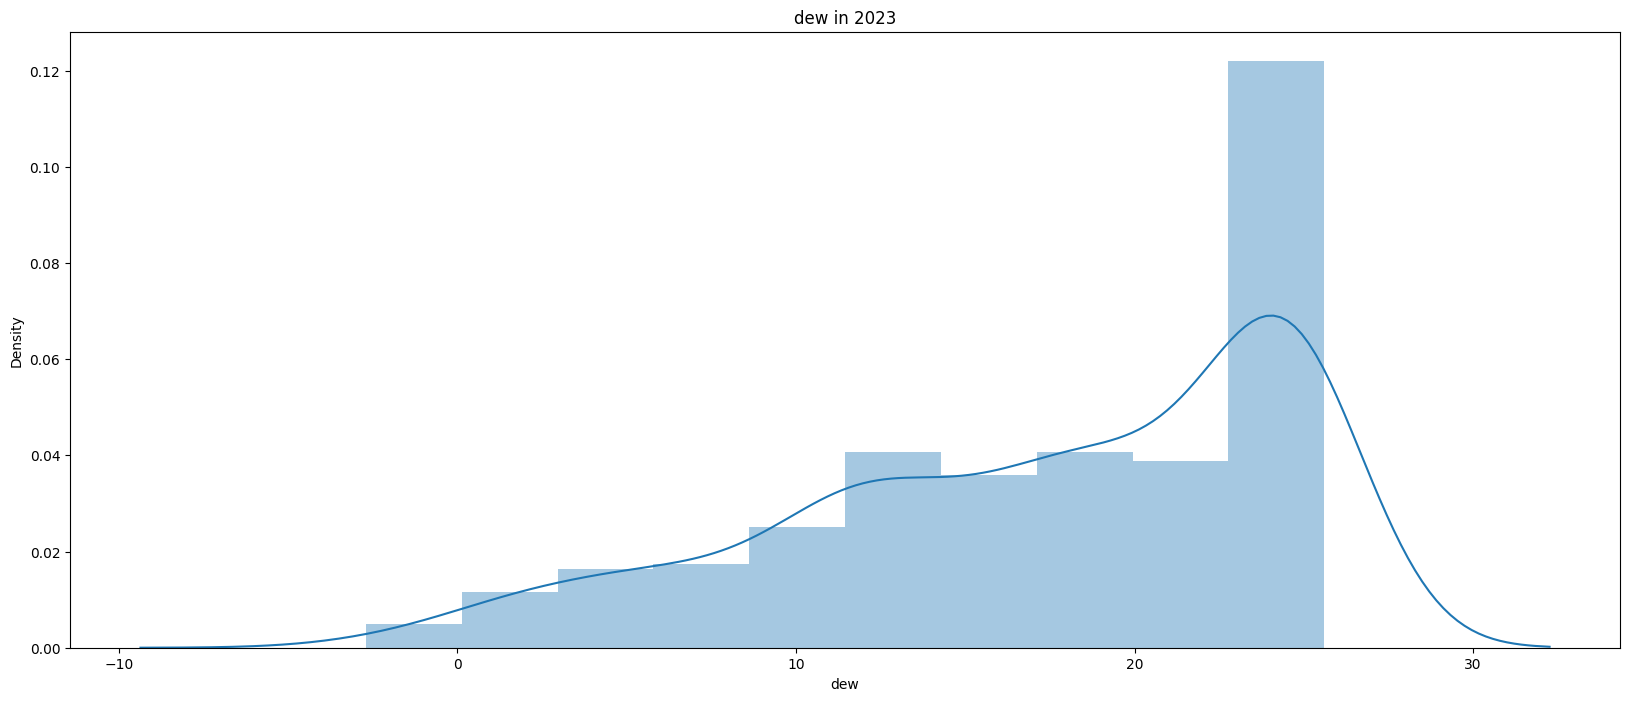

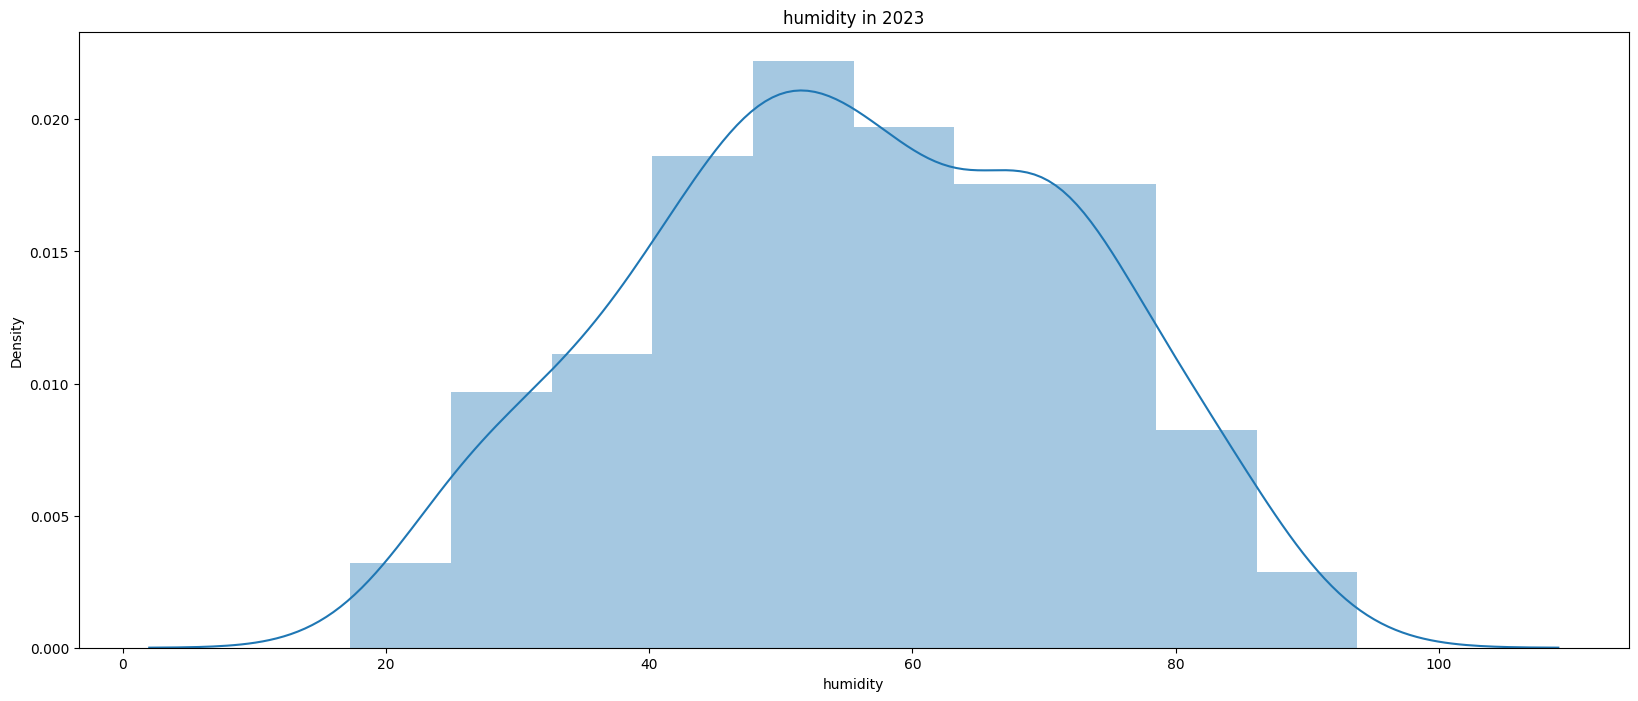

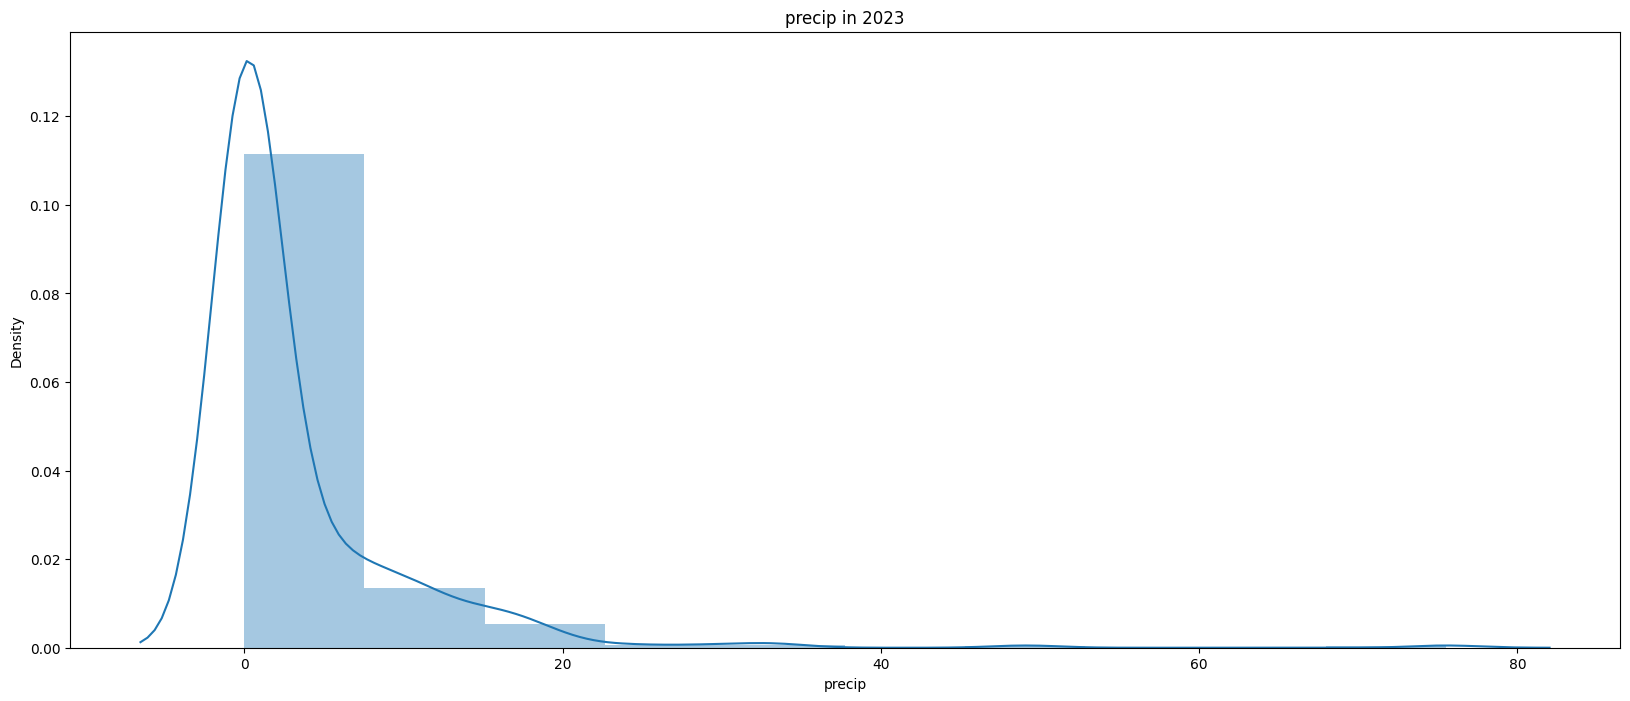

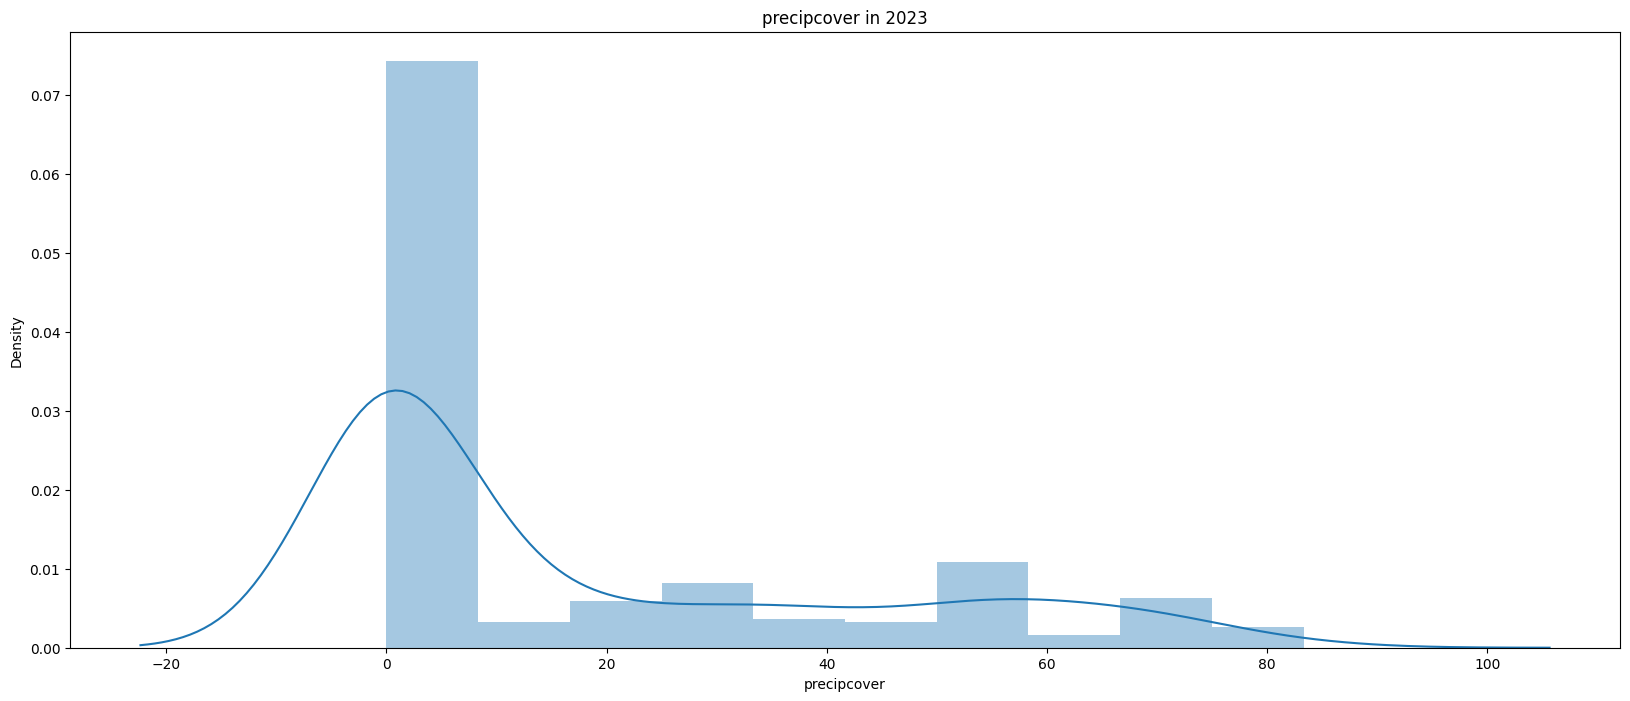

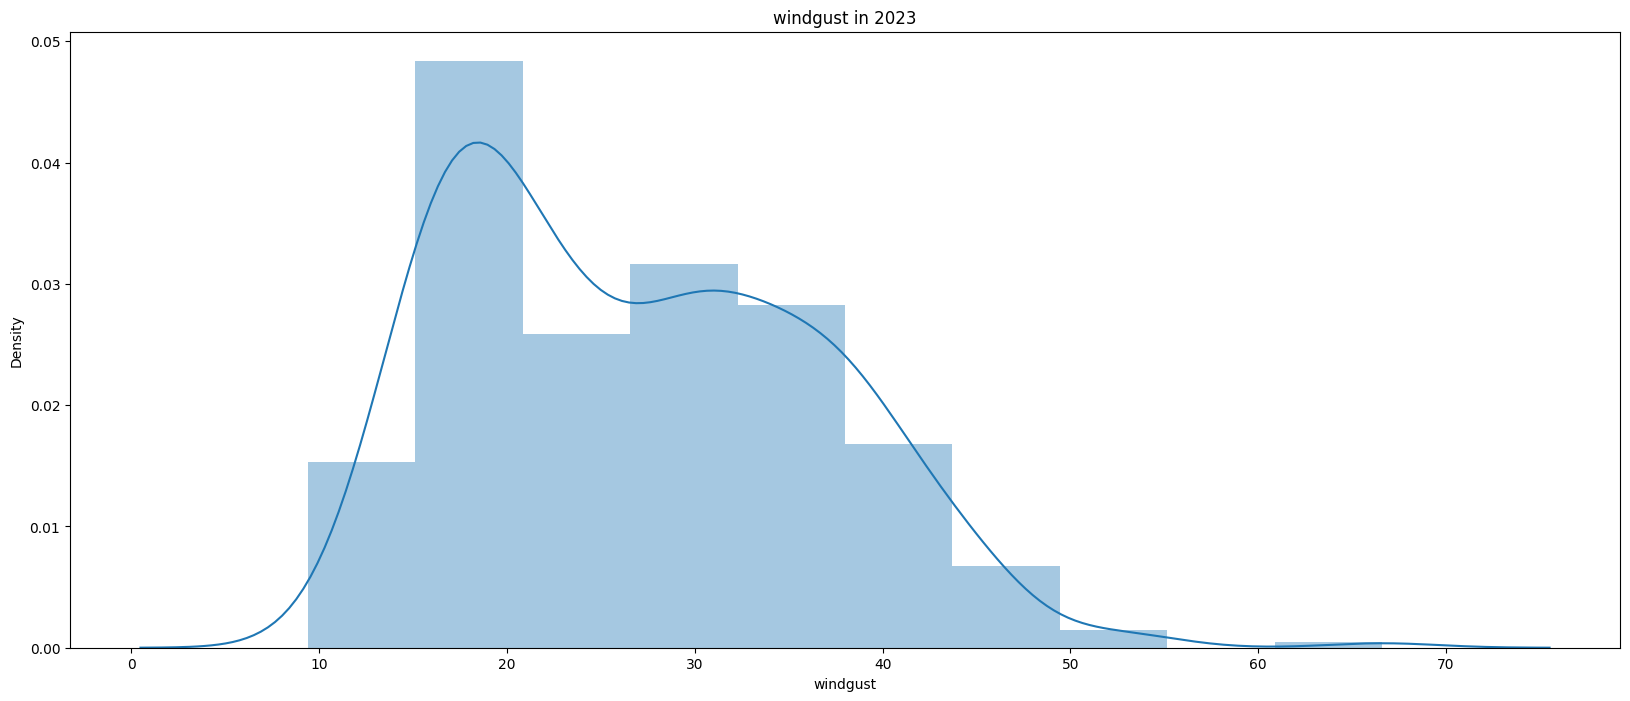

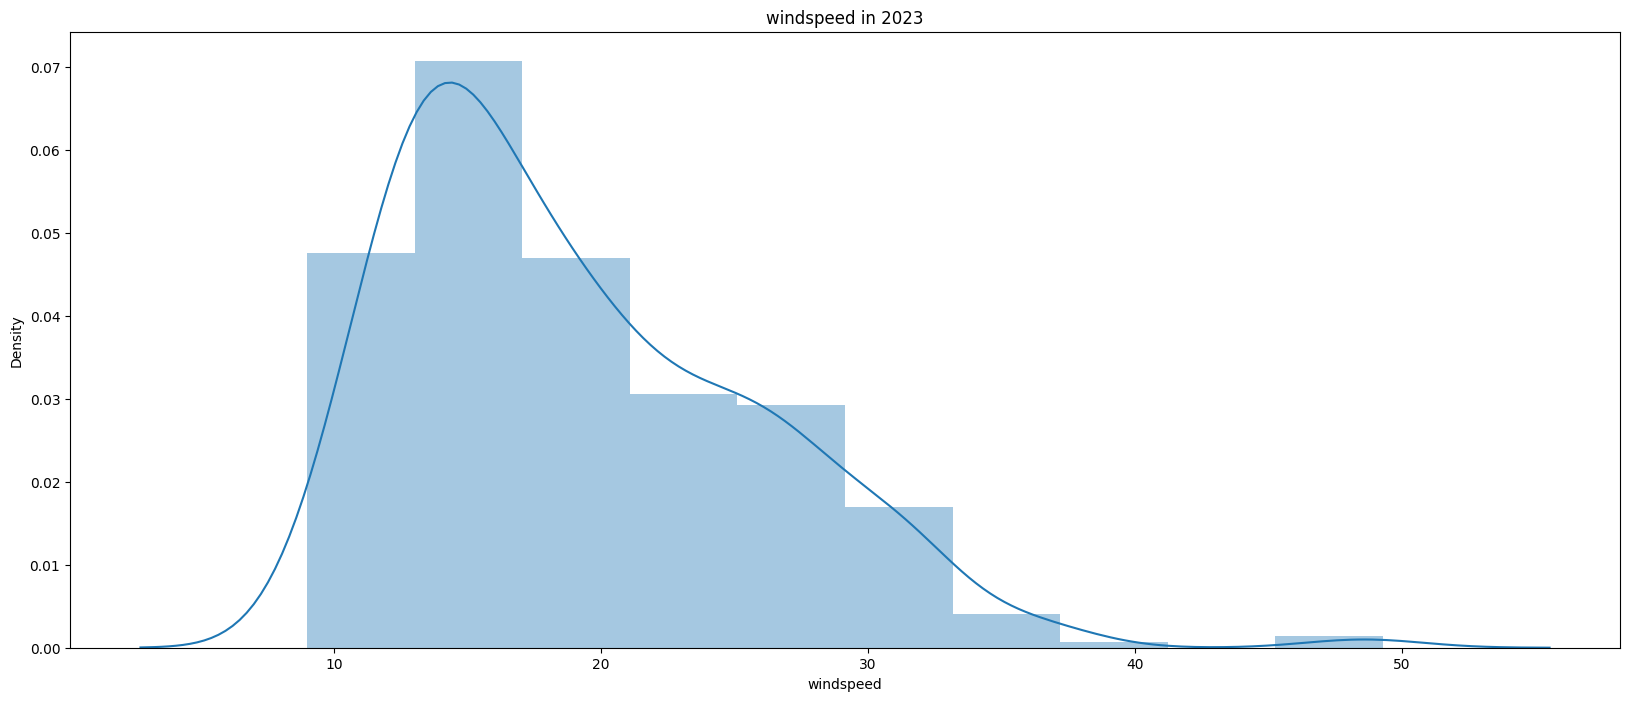

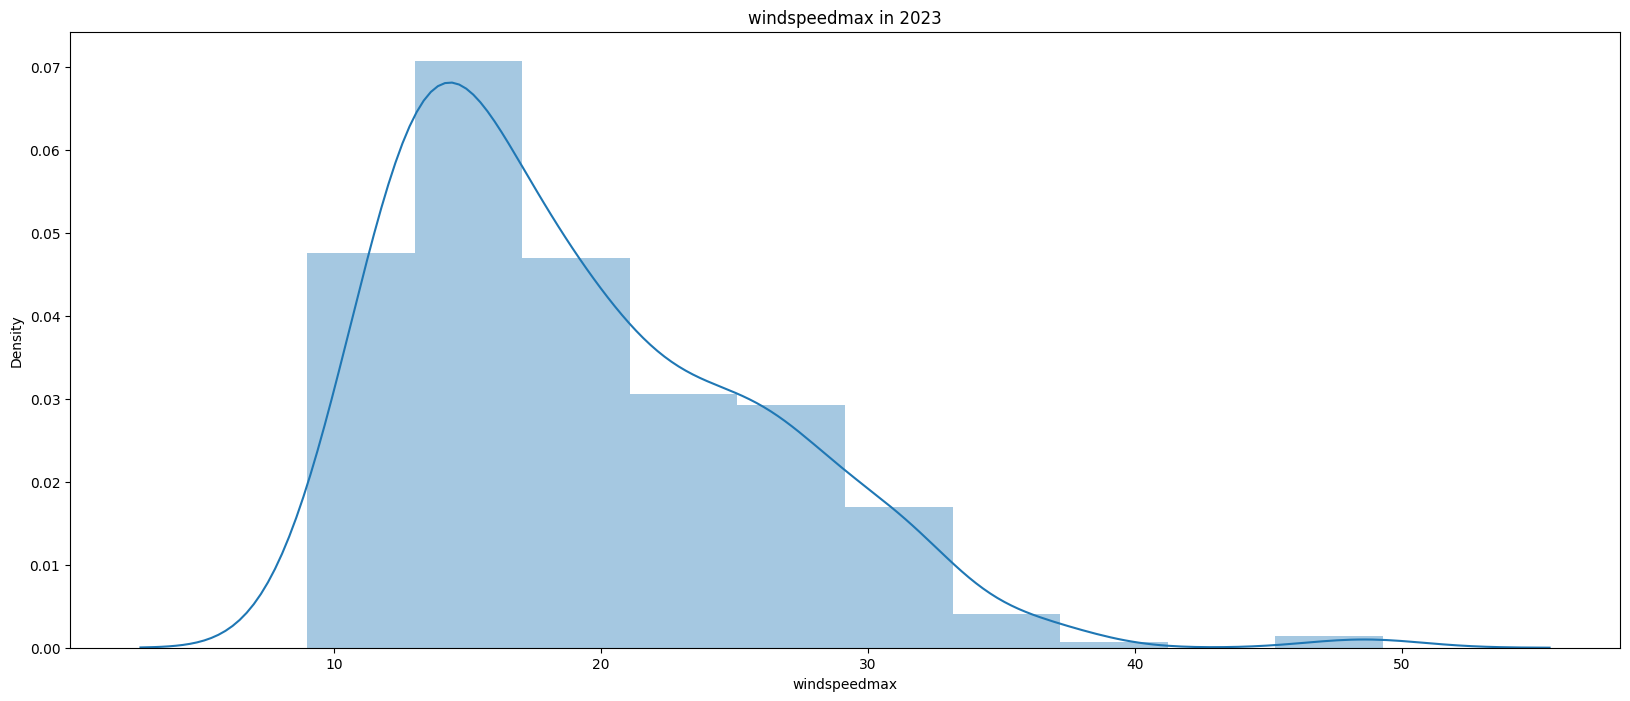

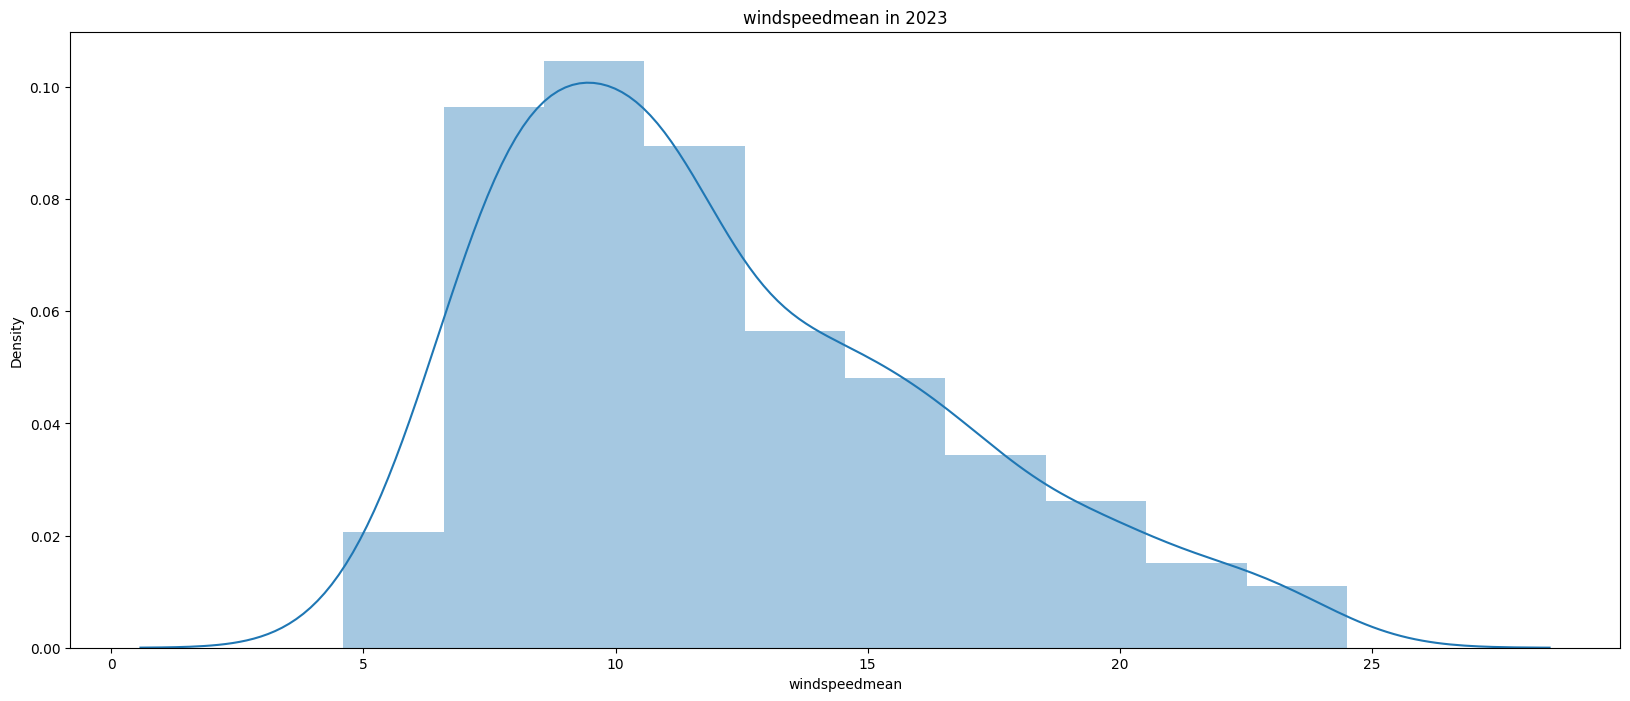

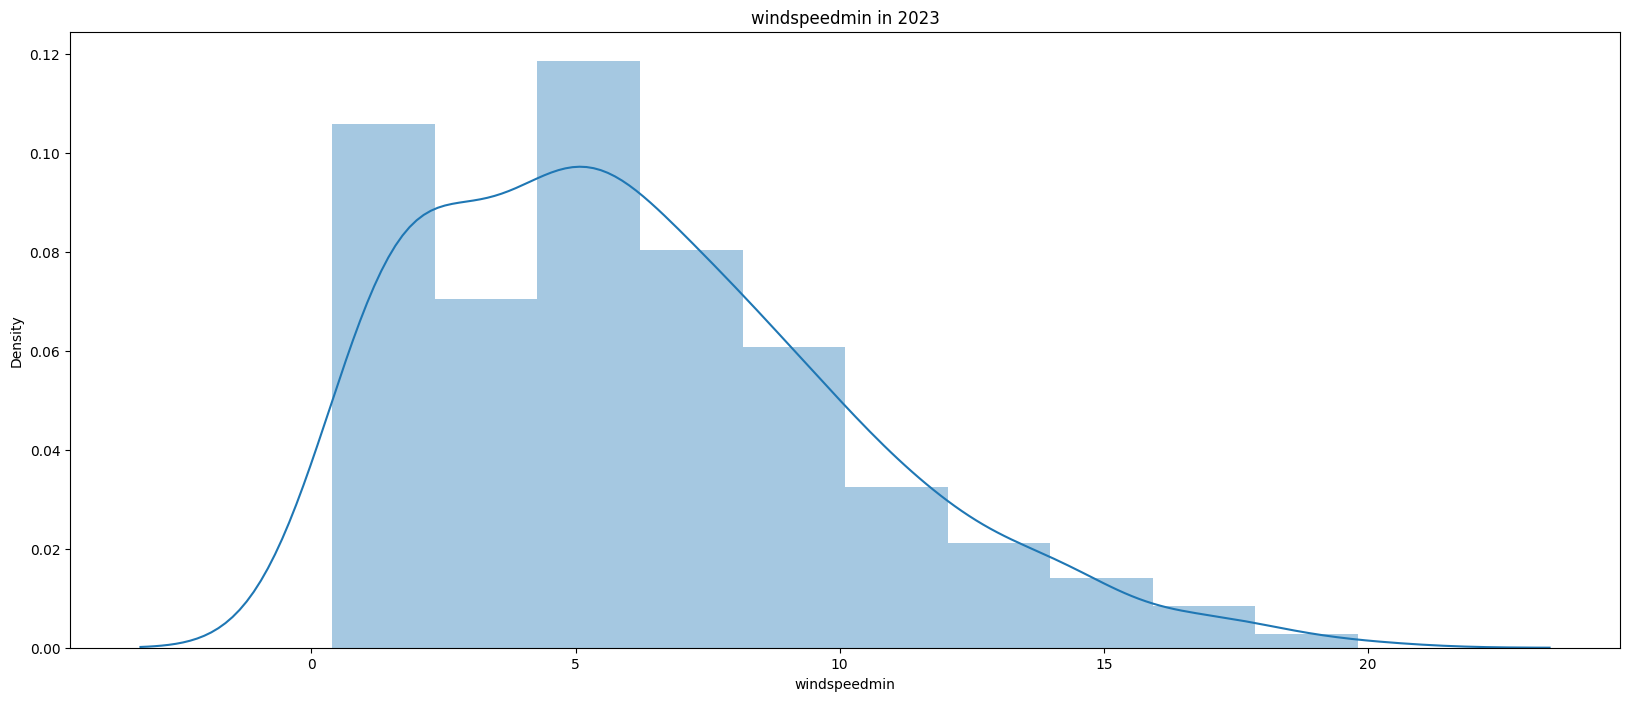

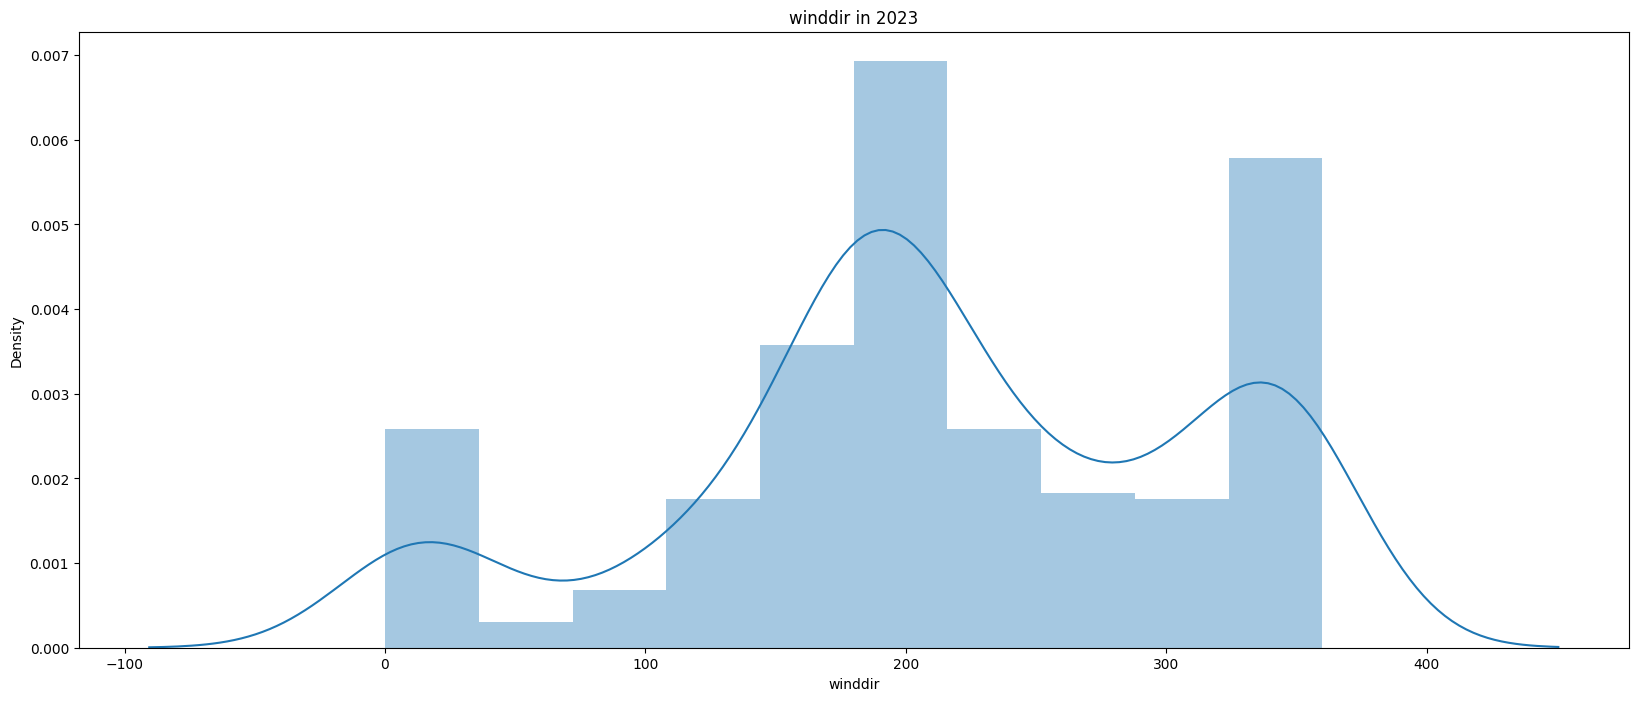

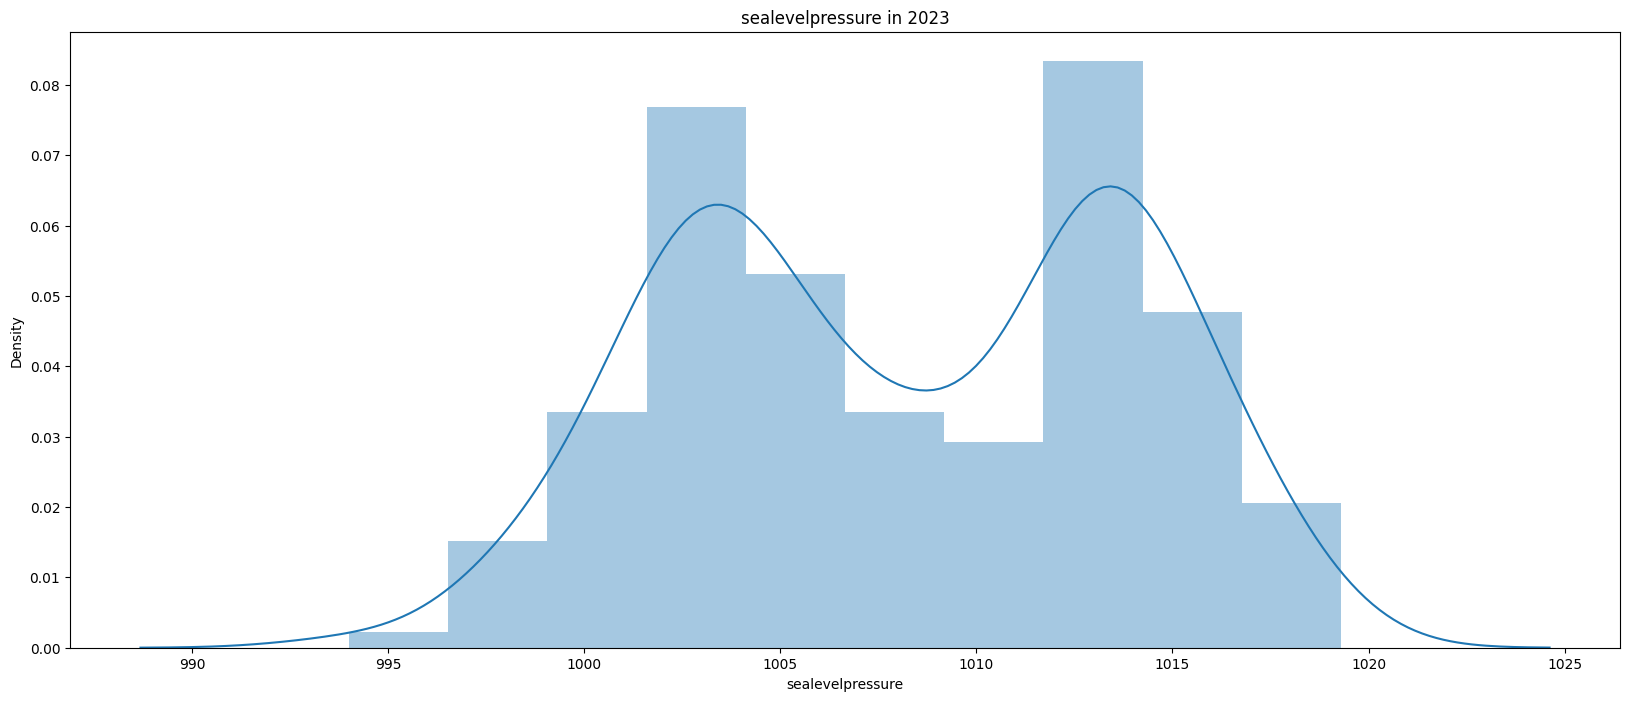

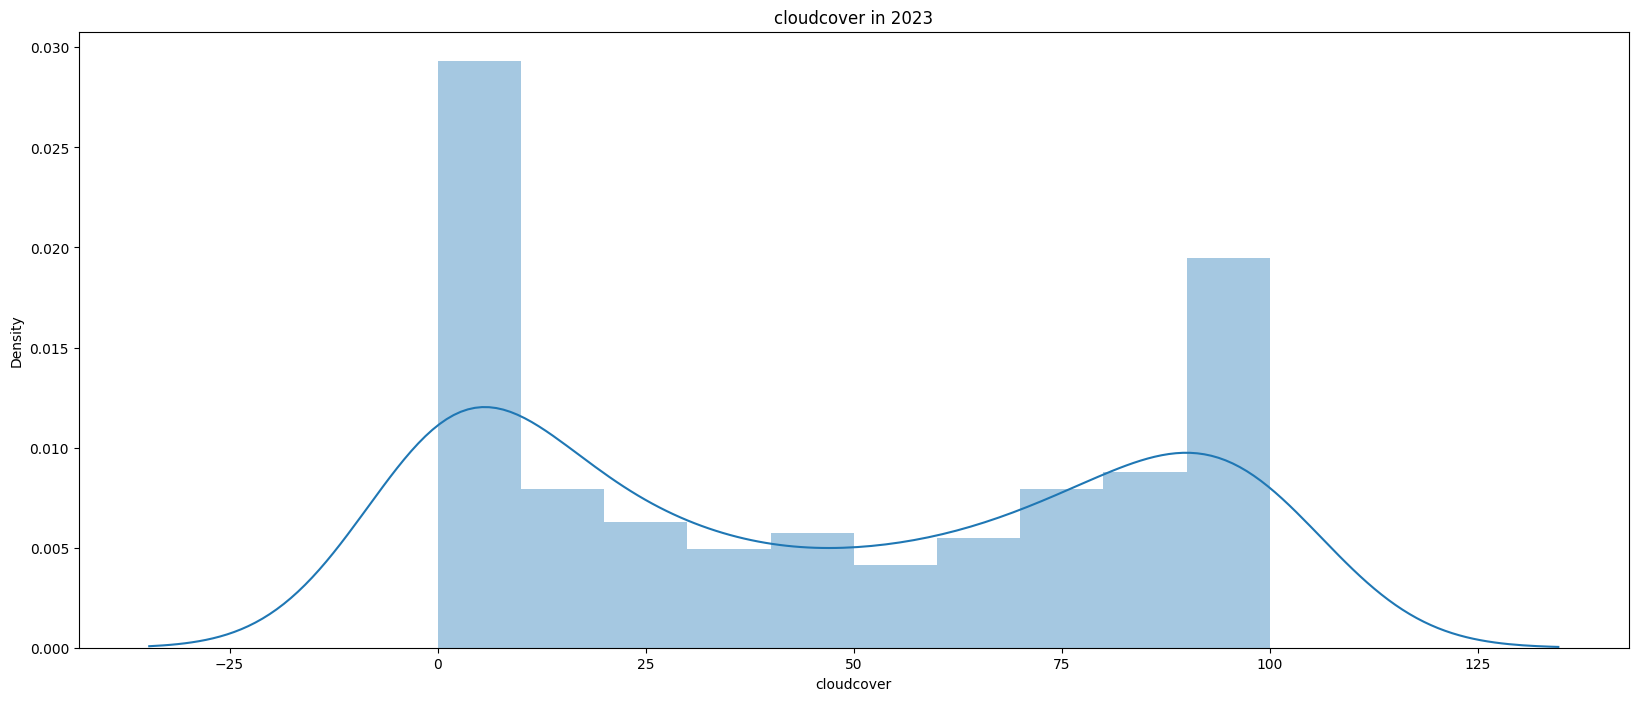

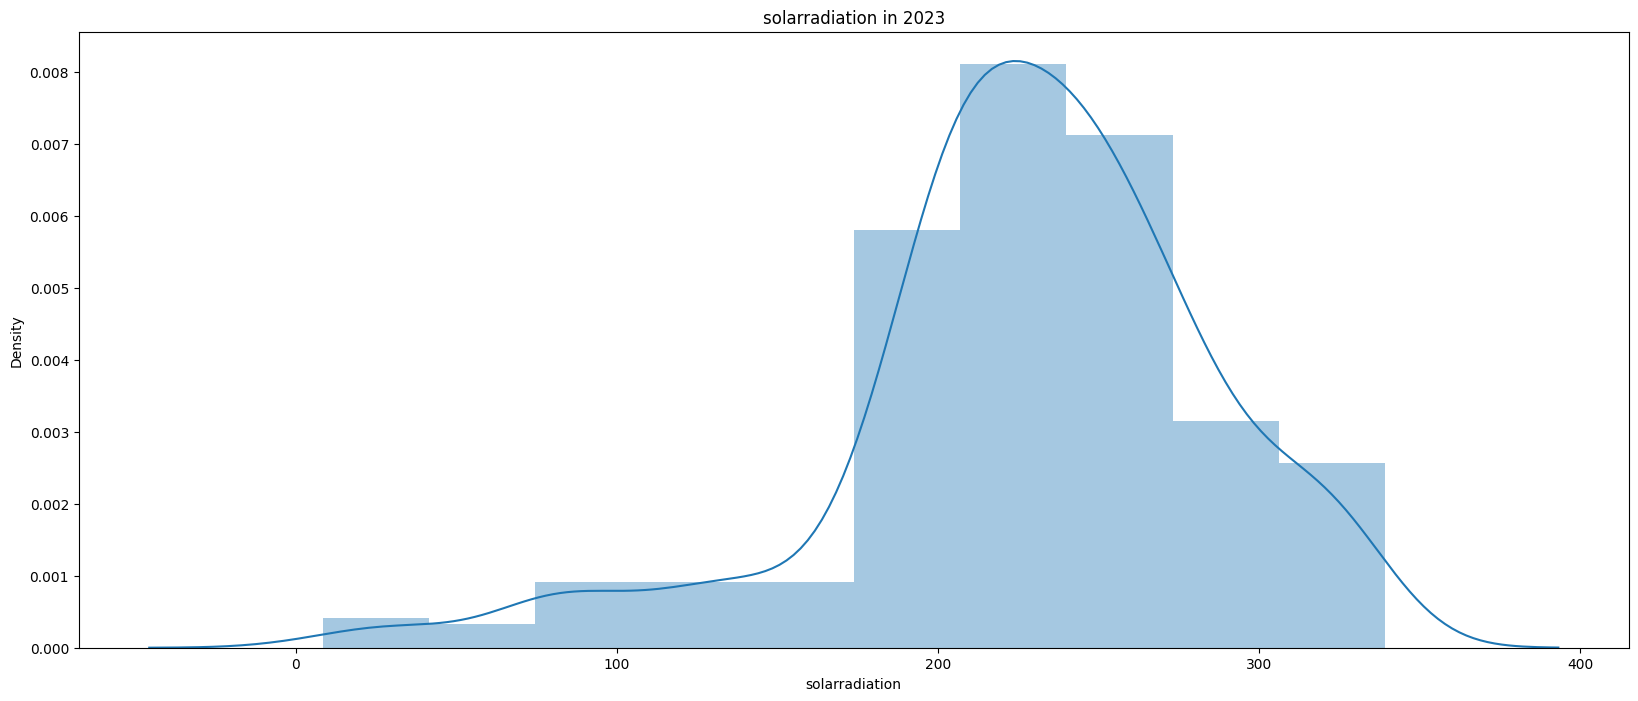

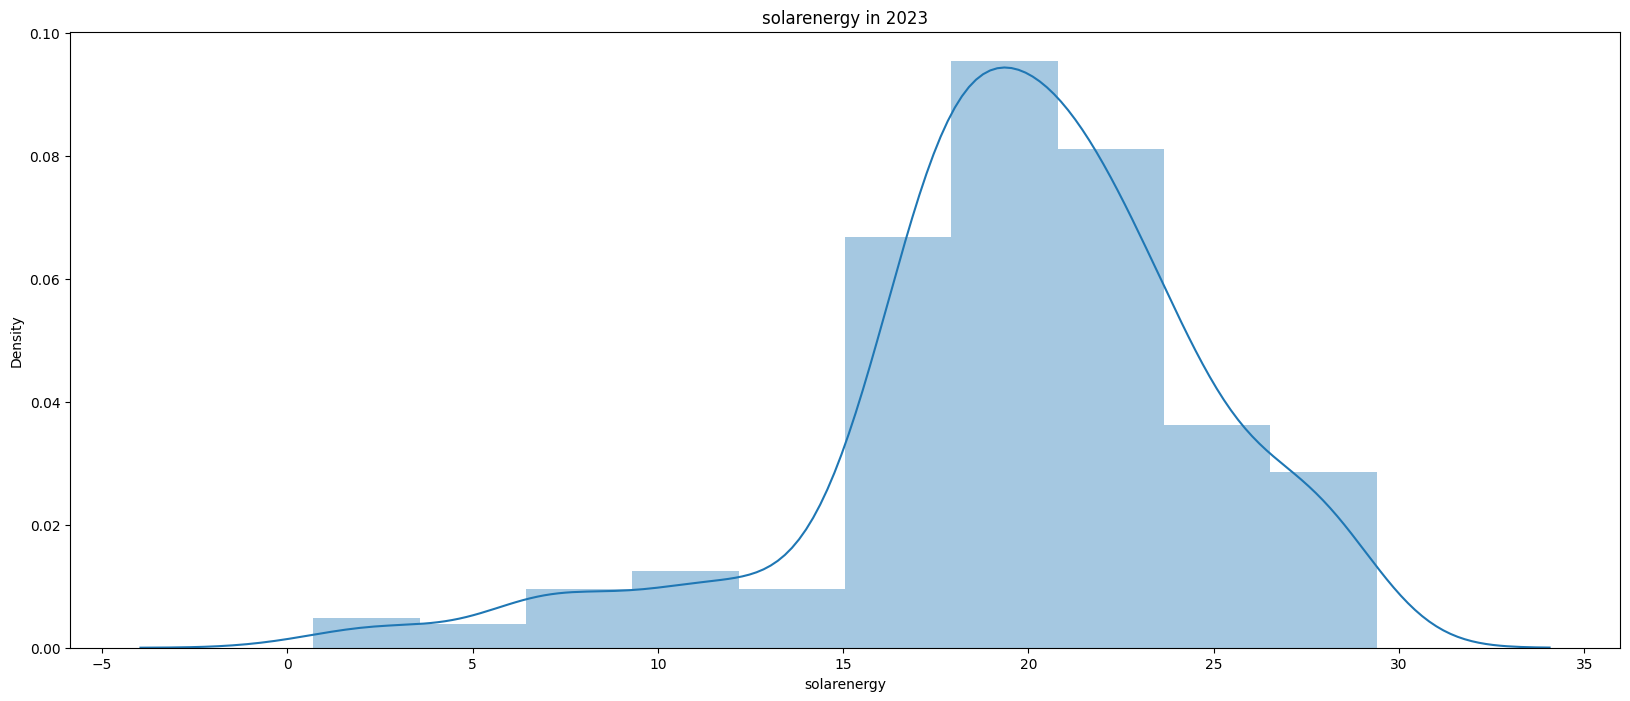

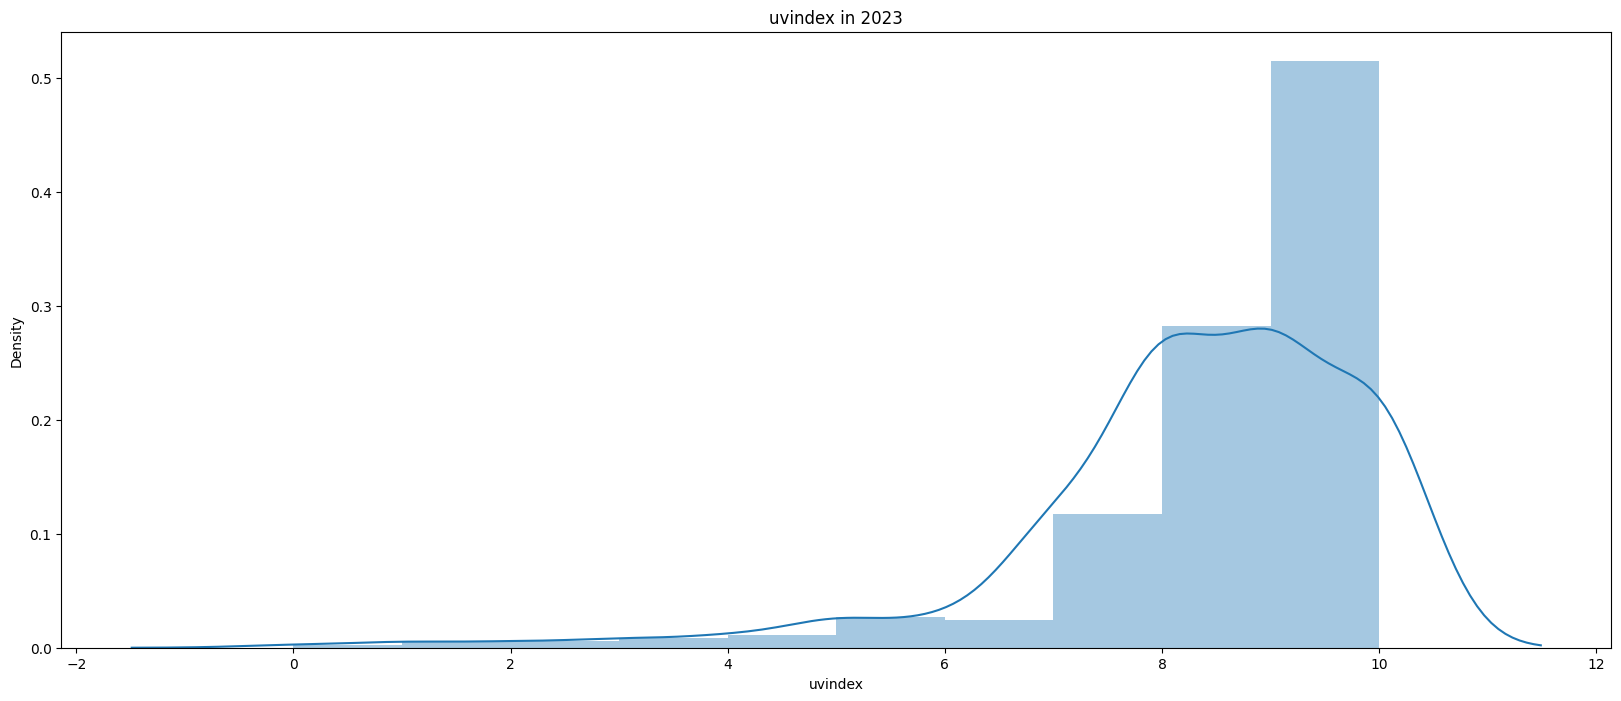

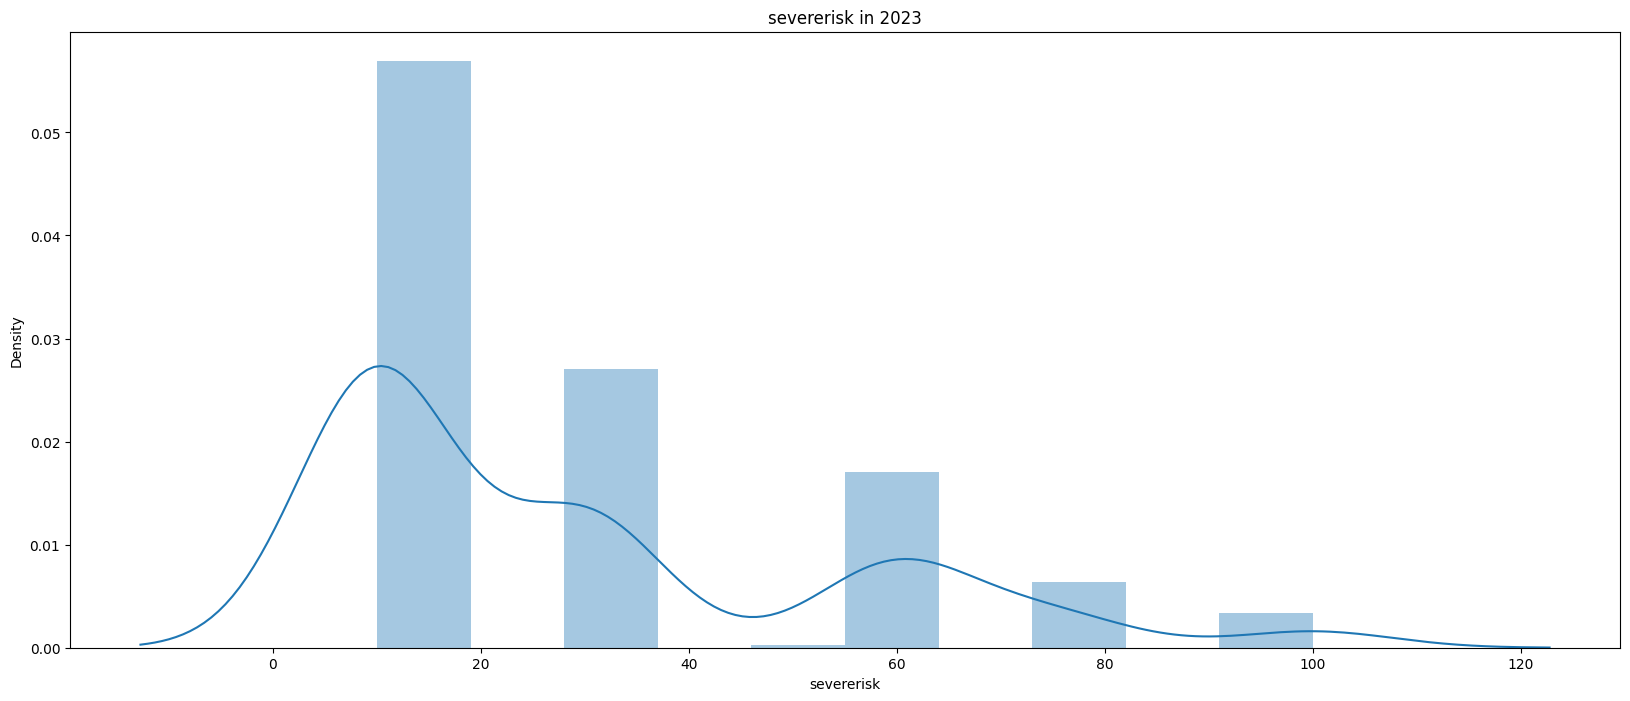

In [ ]:

for col in wb_df_pca.columns:
  plt.figure(figsize=(20,8))
  sns.distplot(wb_df_pca[col][wb_df_pca.index.year == 2023],bins=10)
  plt.title(f'{col} in 2023')
  plt.show()

<Figure size 1500x1000 with 0 Axes>

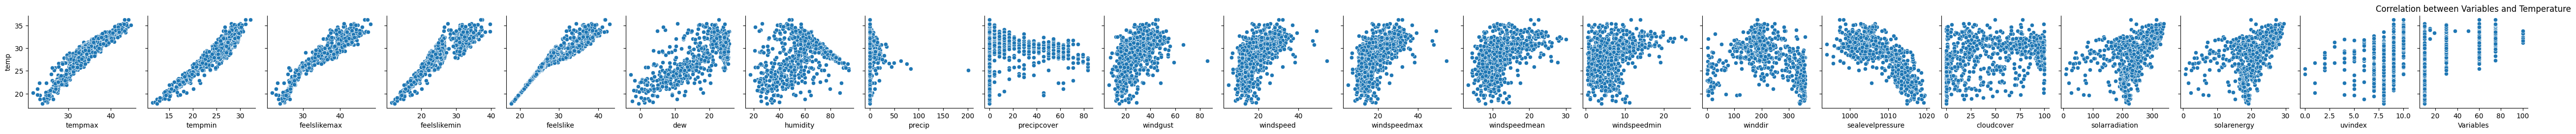

In [ ]:
# Exclude the 'temp' column from the pairplot
cols_to_plot = [col for col in wb_df_pca.columns if col != 'temp']

# Generate a single pairplot for all columns except 'temp'
plt.figure(figsize=(15, 10))
sns.pairplot(wb_df_pca, x_vars=cols_to_plot, y_vars=['temp'])
plt.title('Correlation between Variables and Temperature')
plt.xlabel('Variables')
plt.ylabel('Temperature')
plt.show()

## To analyze the trend of all features with respect to the 'temp' column, you can create a correlation matrix and then visualize the correlations using a heatmap. This will allow us to see how each feature correlates with the 'temp' column.

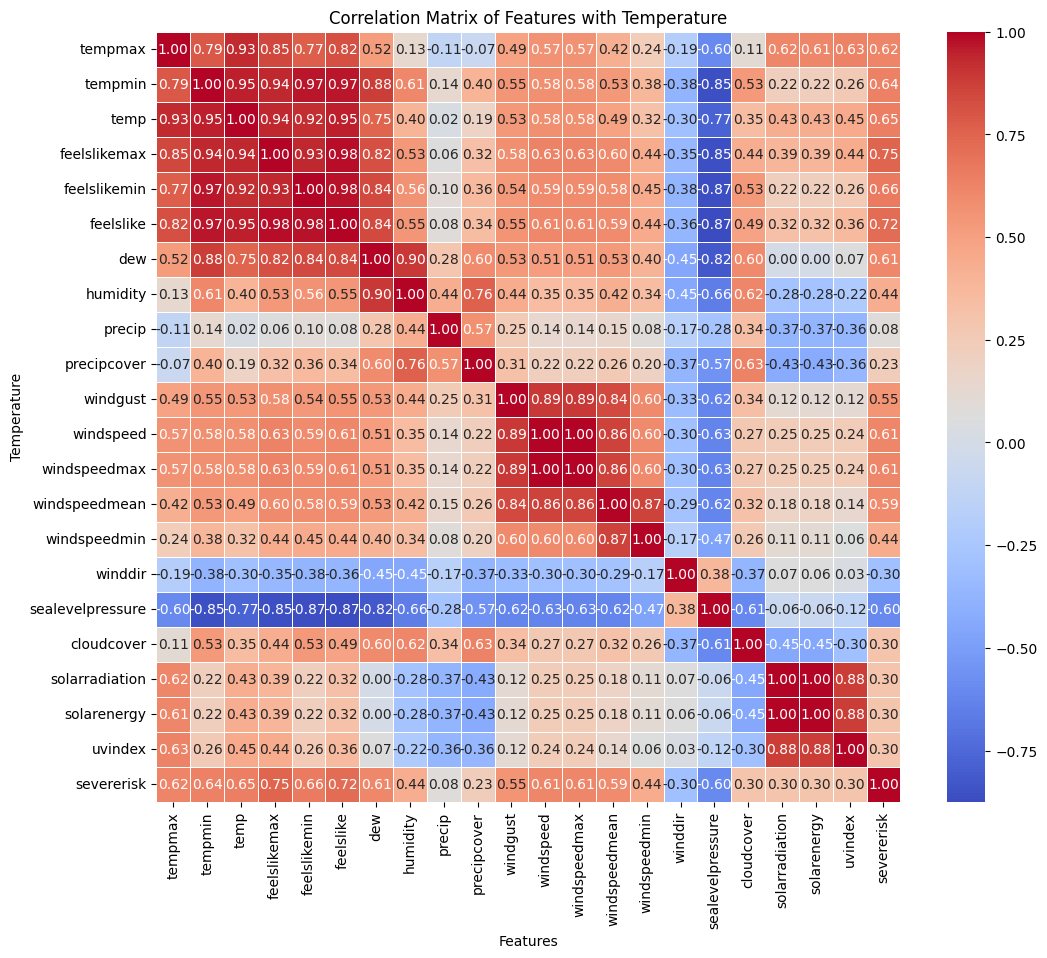

In [ ]:
# Calculate the correlation matrix
correlation_matrix = wb_df_pca.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features with Temperature')
plt.xlabel('Features')
plt.ylabel('Temperature')
plt.show()

## If we want to visualize the relationship between each individual feature and the 'temp' column separately, we can create scatterplots for each feature against the 'temp' column.

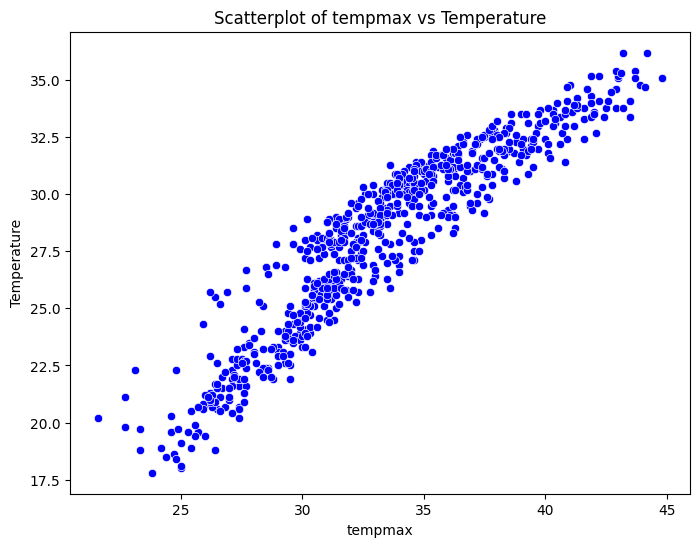

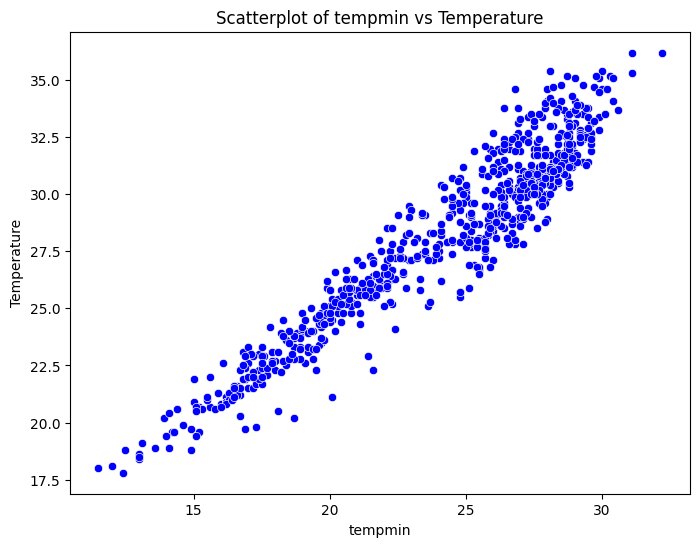

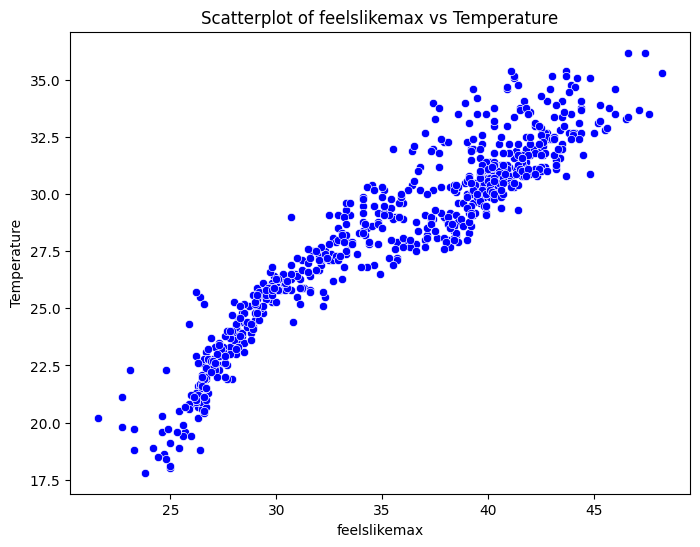

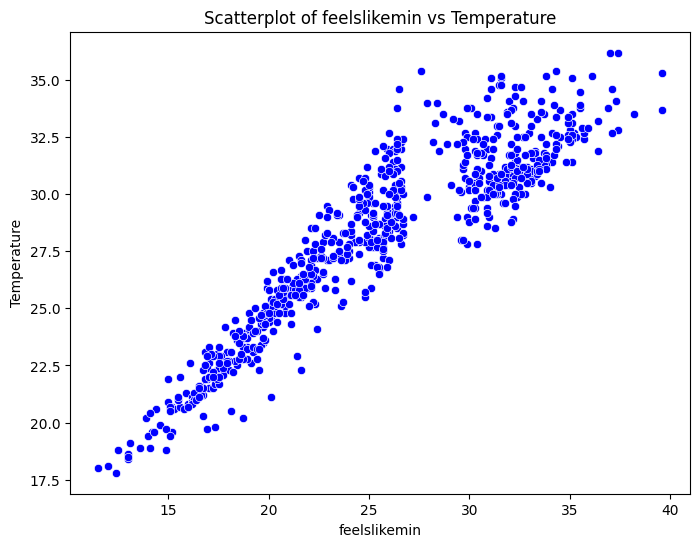

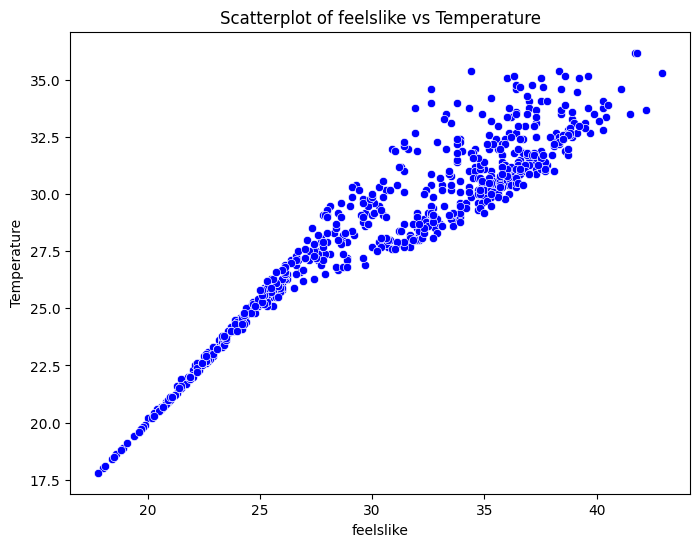

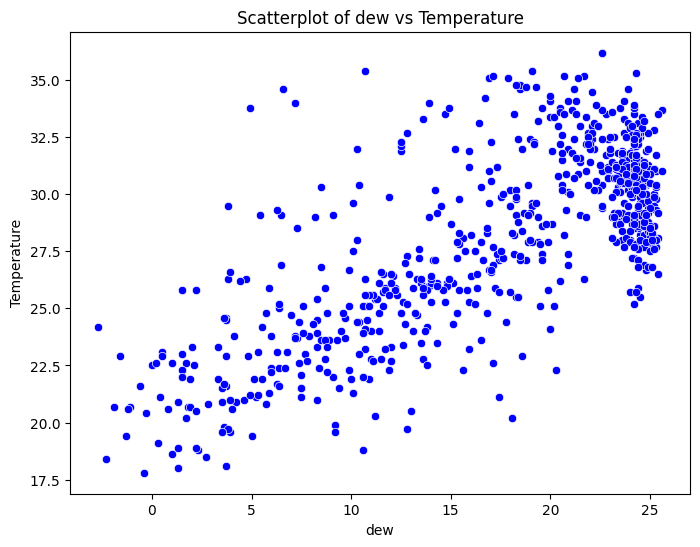

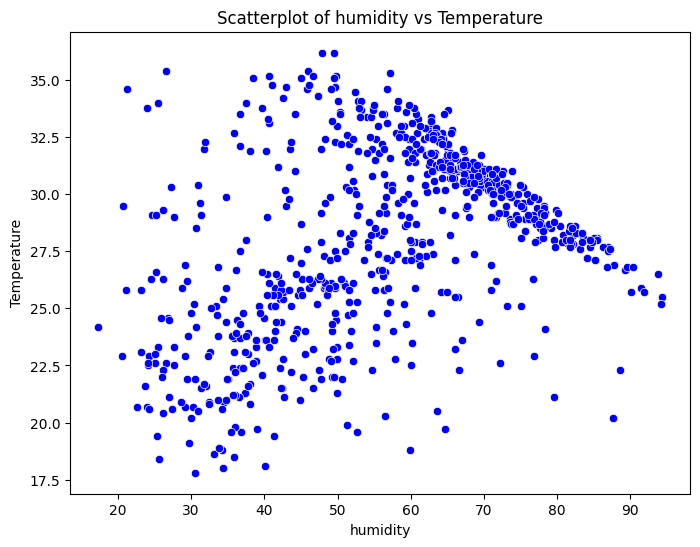

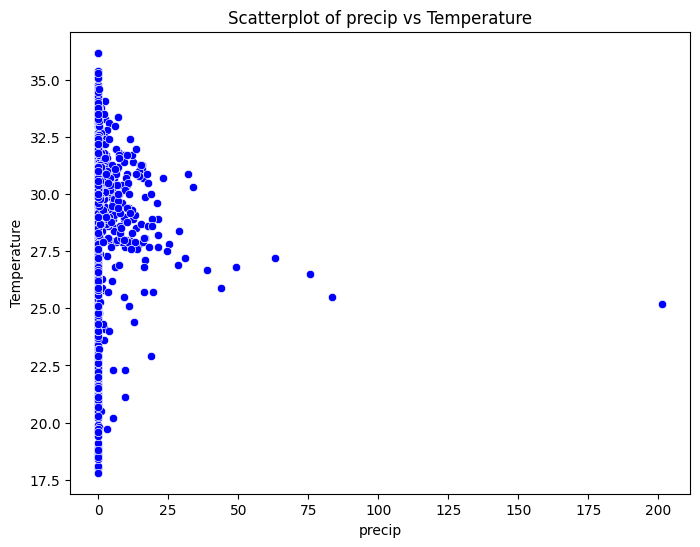

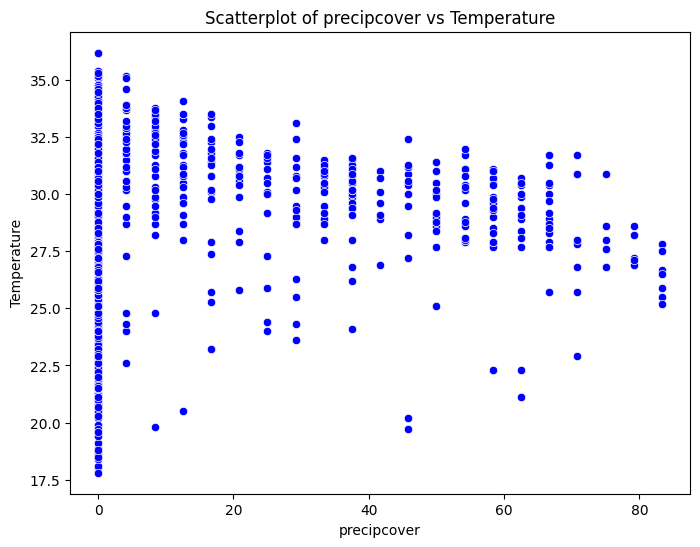

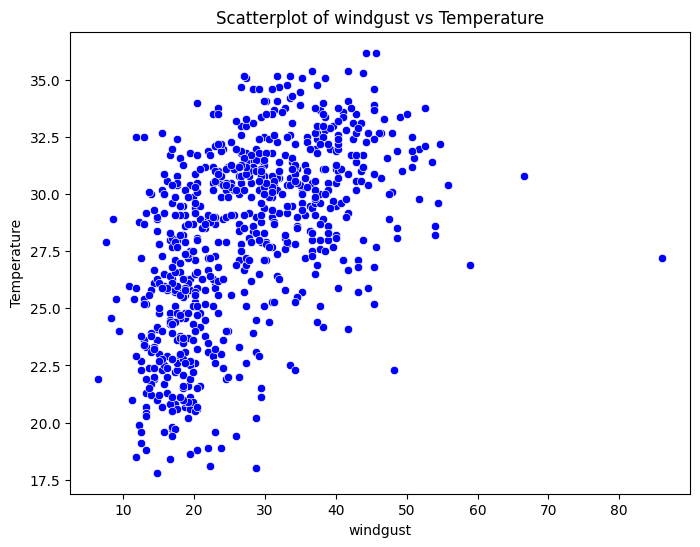

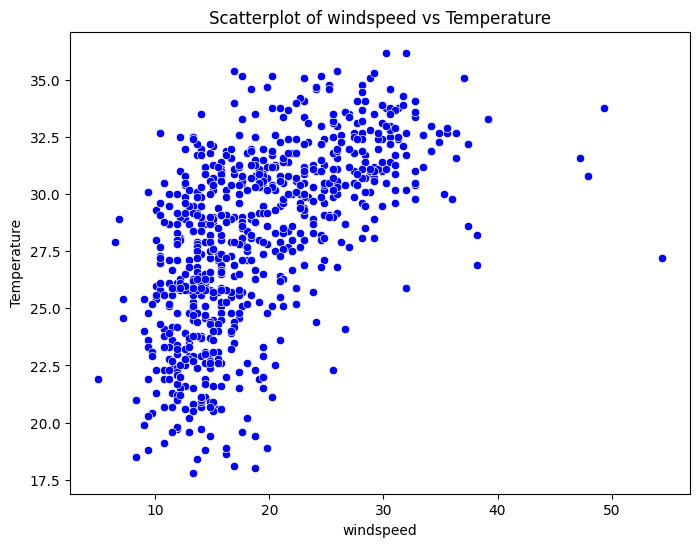

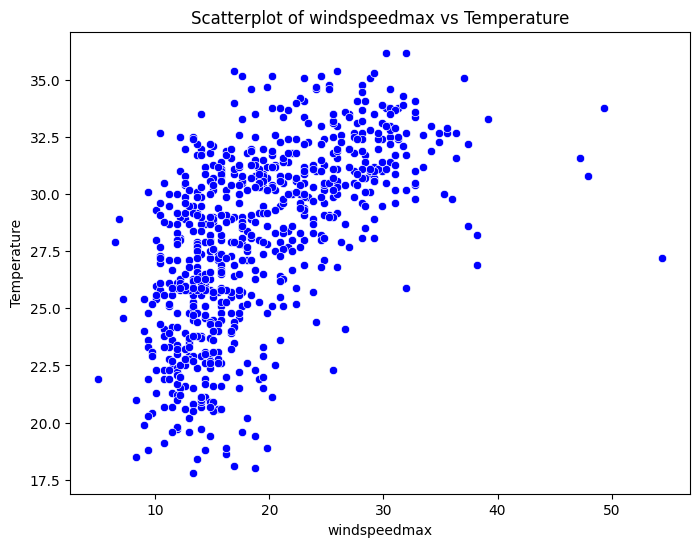

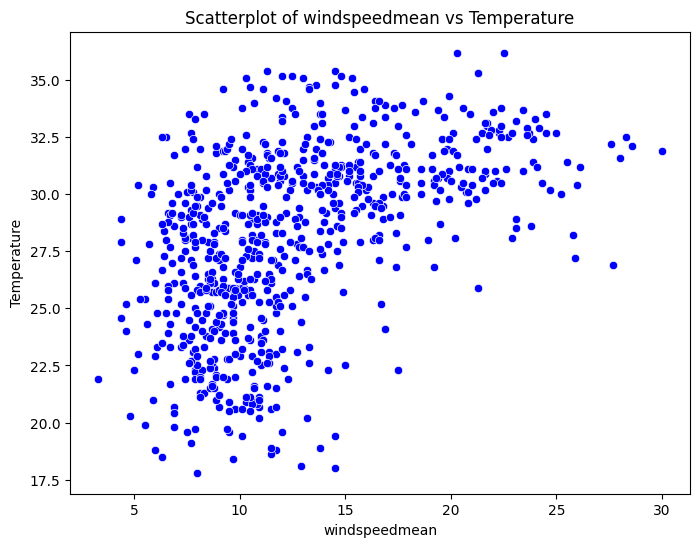

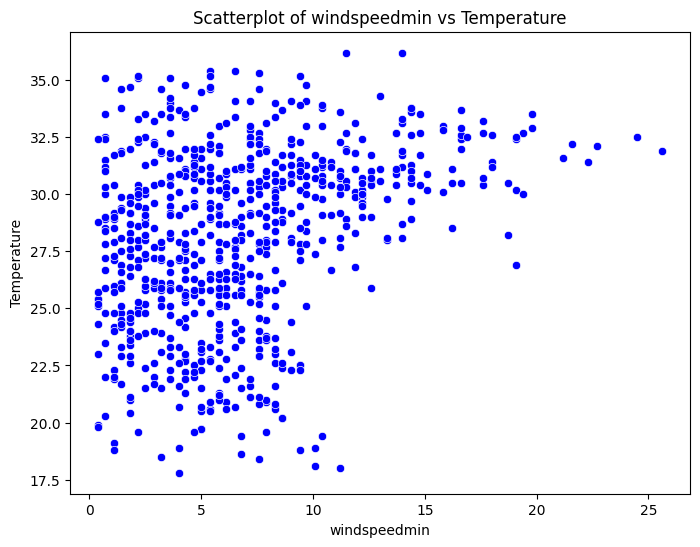

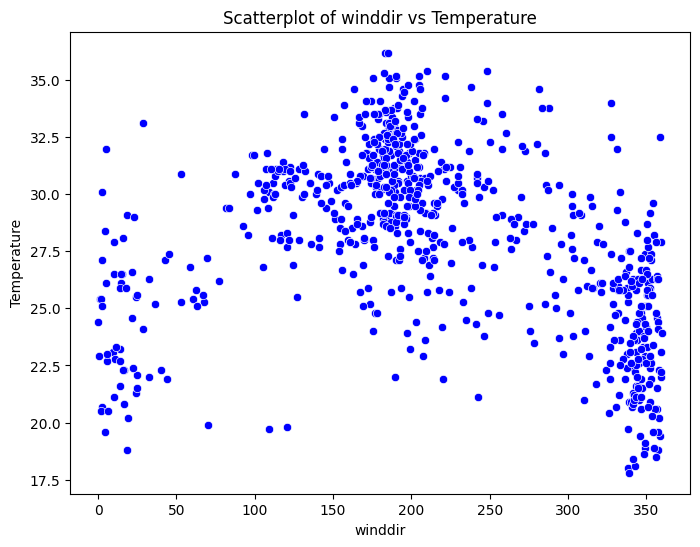

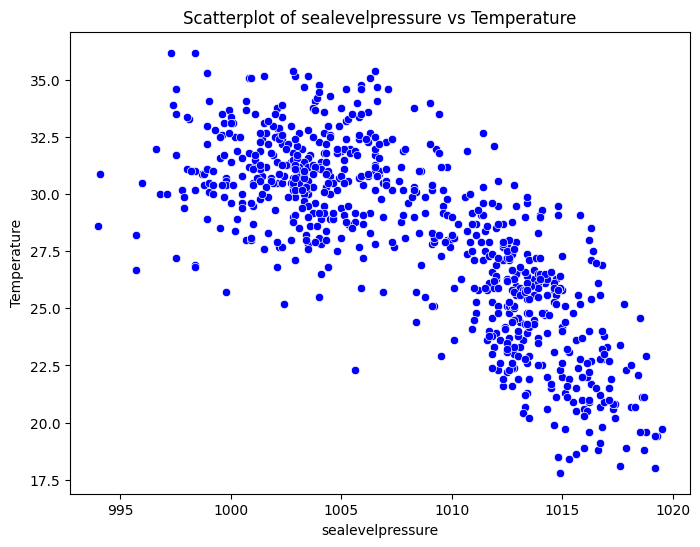

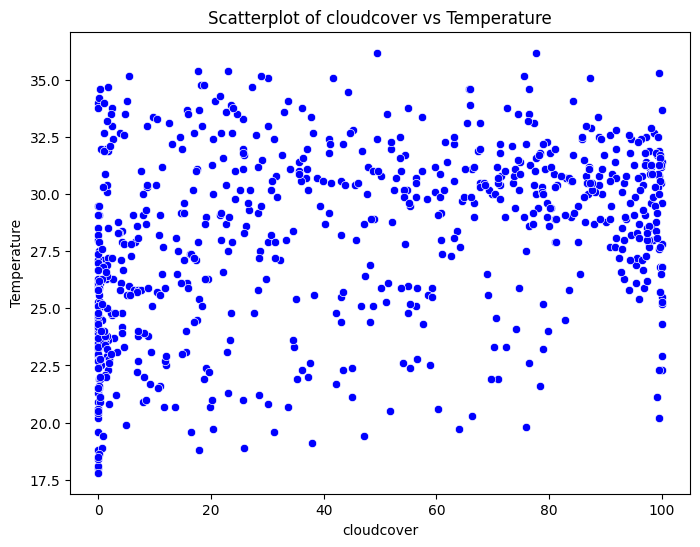

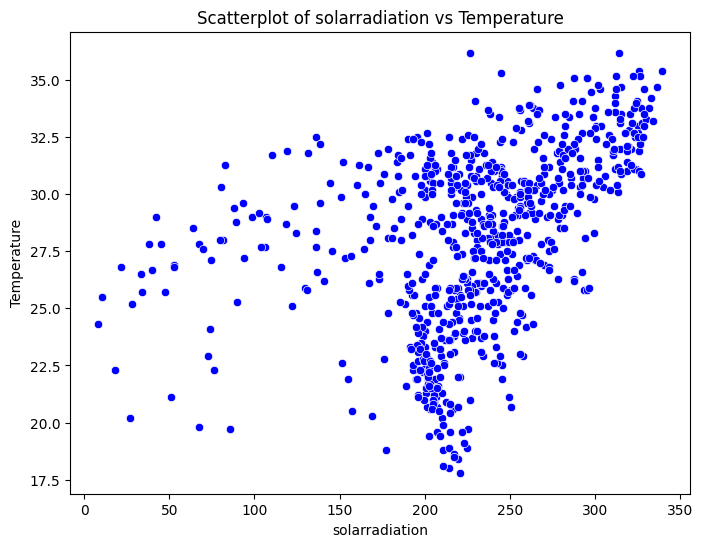

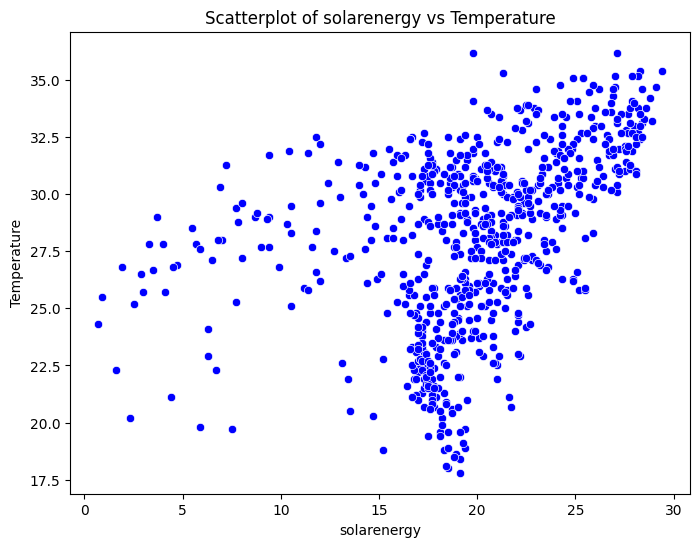

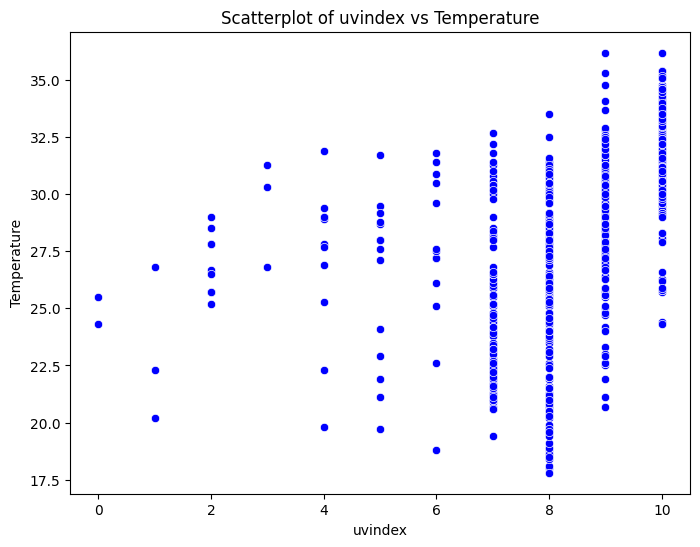

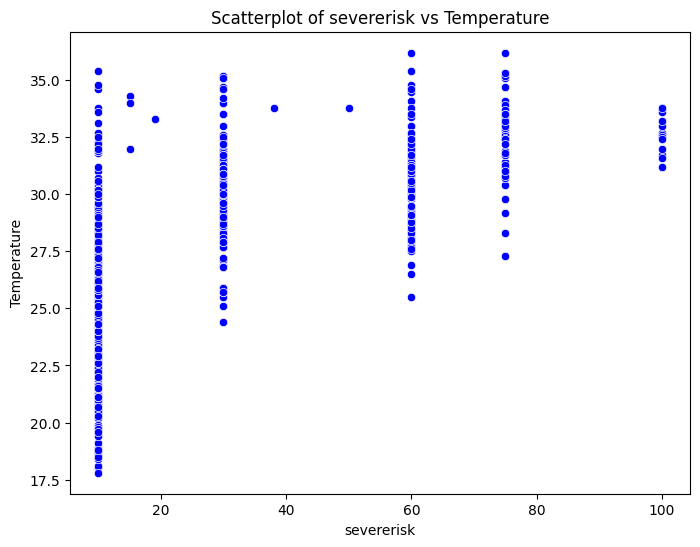

In [ ]:
for col in wb_df_pca.columns:
    if col != 'temp':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=wb_df_pca, x=col, y='temp', color='blue')
        plt.title(f'Scatterplot of {col} vs Temperature')
        plt.xlabel(col)
        plt.ylabel('Temperature')
        plt.show()

In [ ]:
# Filter the data for the year 2023
wb_df_2023 = wb_df_pca[wb_df_pca.index.year == 2023]

In [ ]:
# Split the data into features (X) and target variable (y)
X = wb_df_2023.drop(columns=['temp'])
Y = wb_df_2023['temp']

# Outliers and Skewness

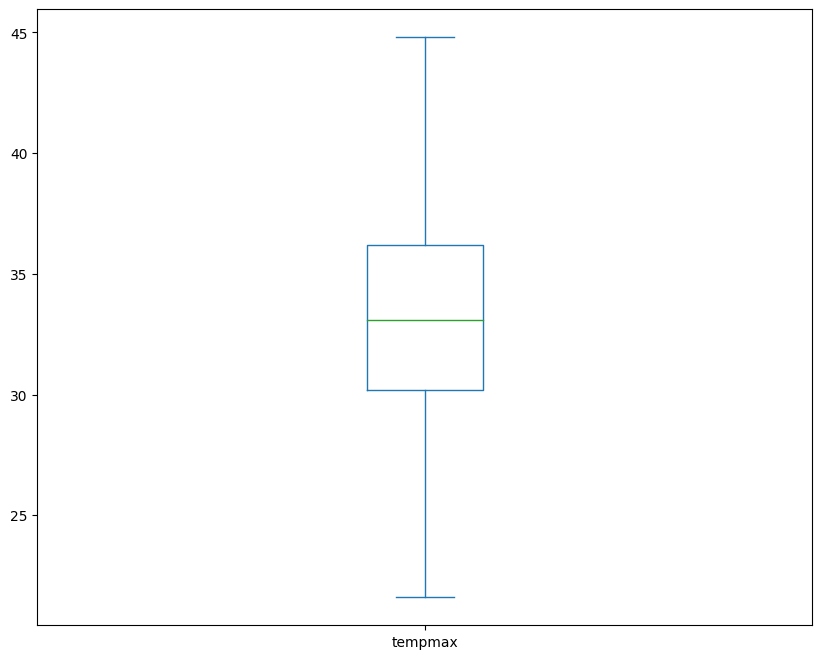

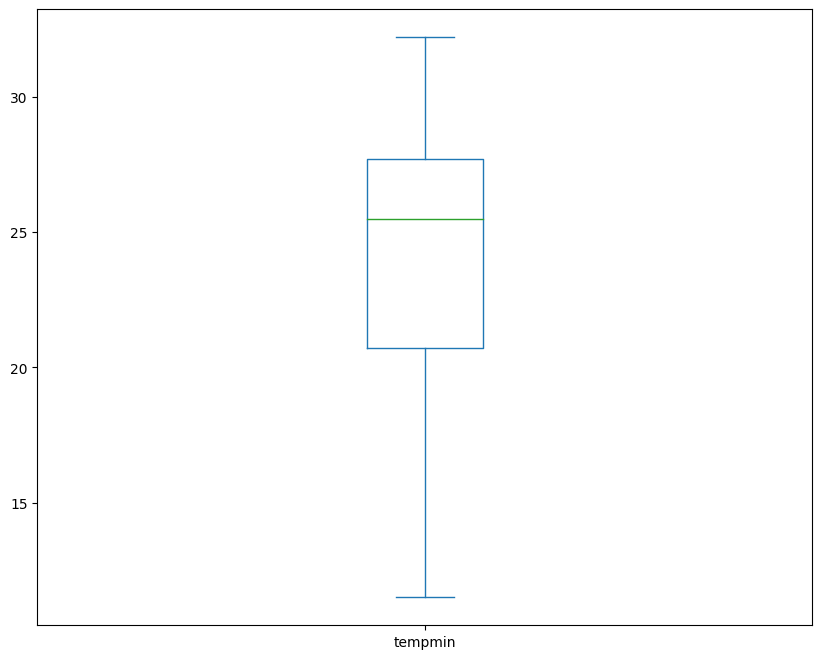

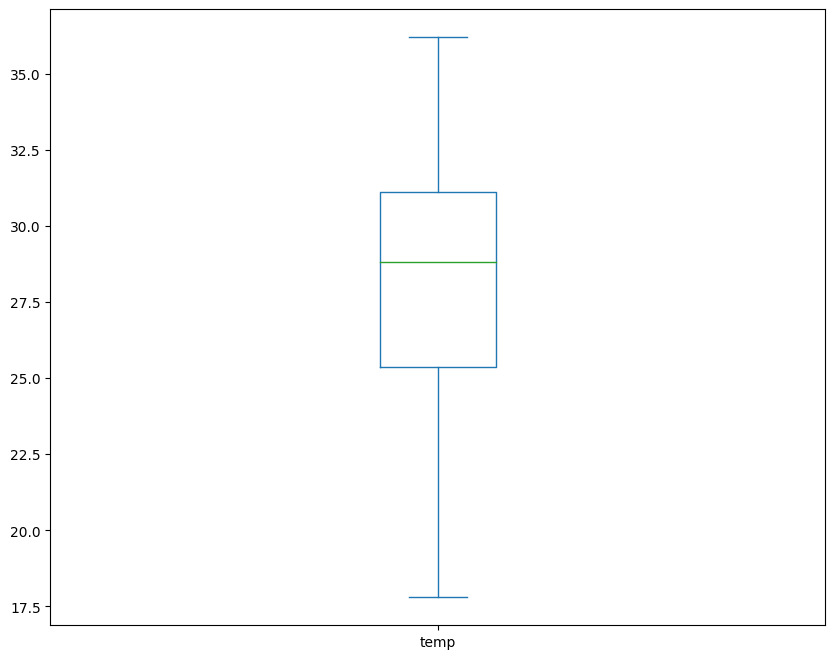

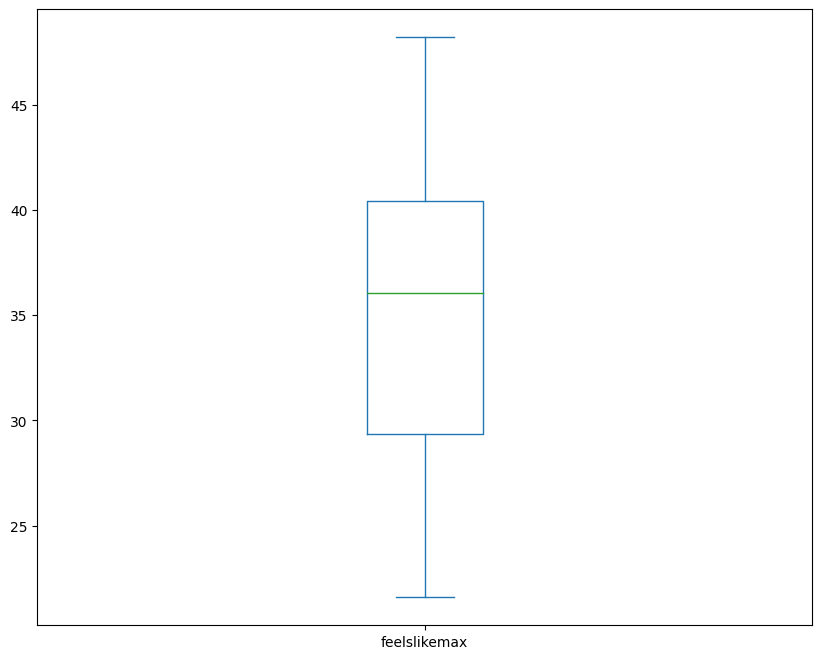

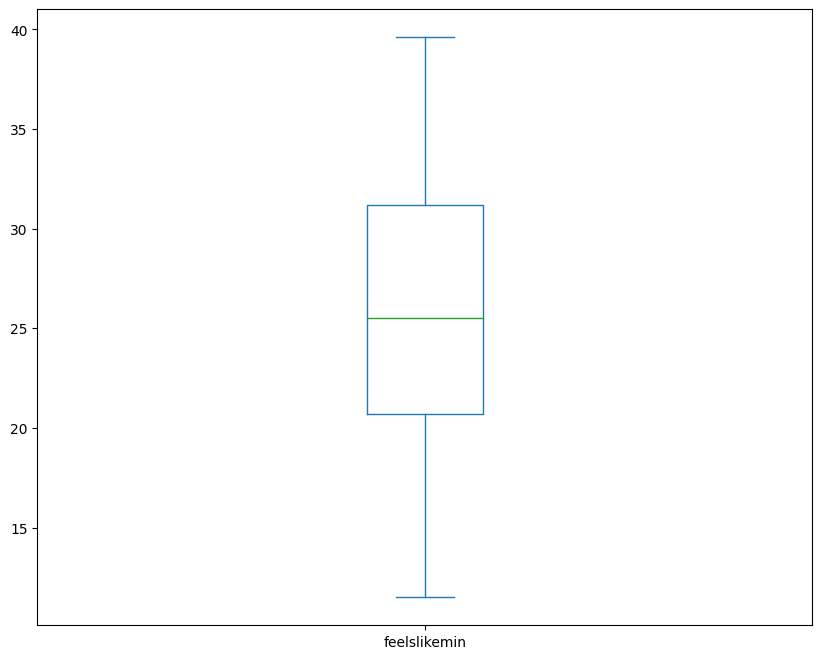

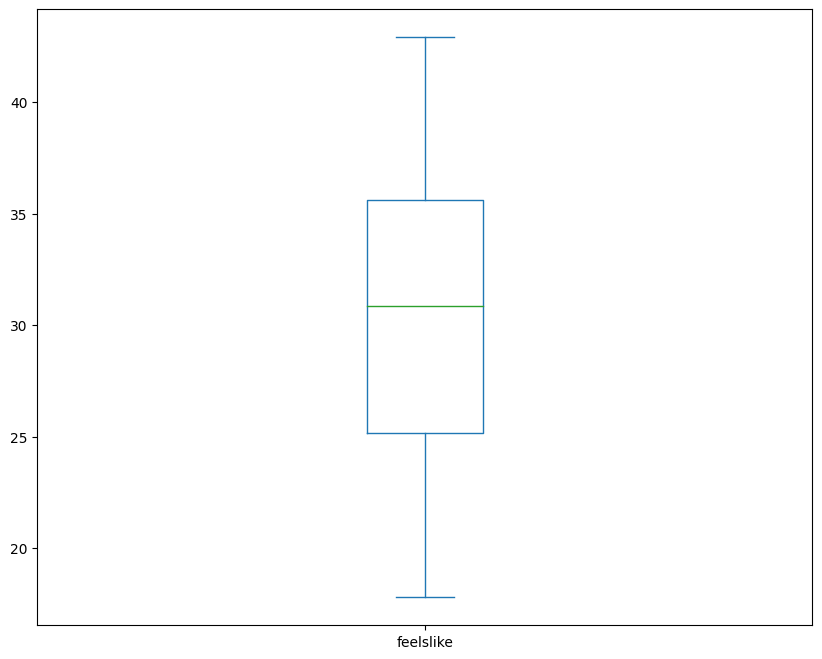

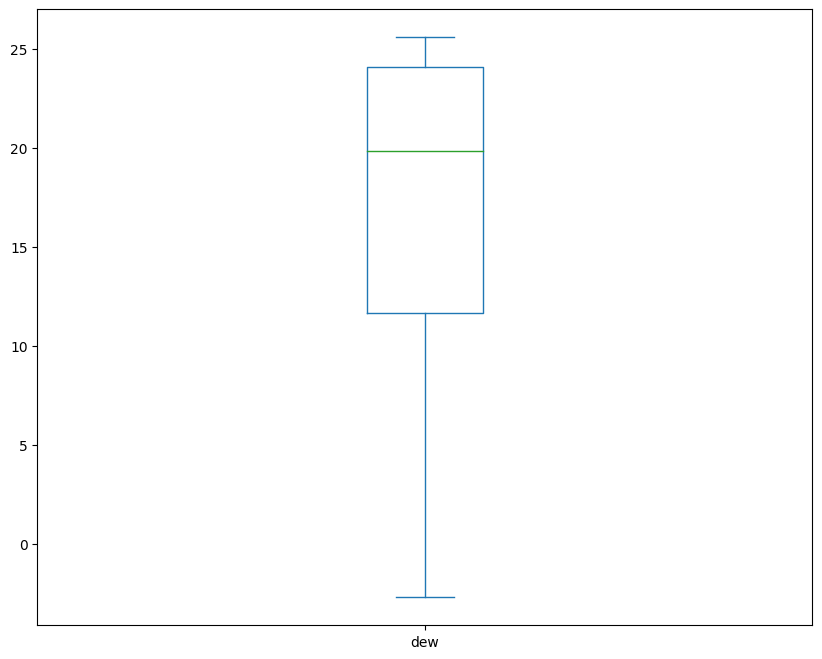

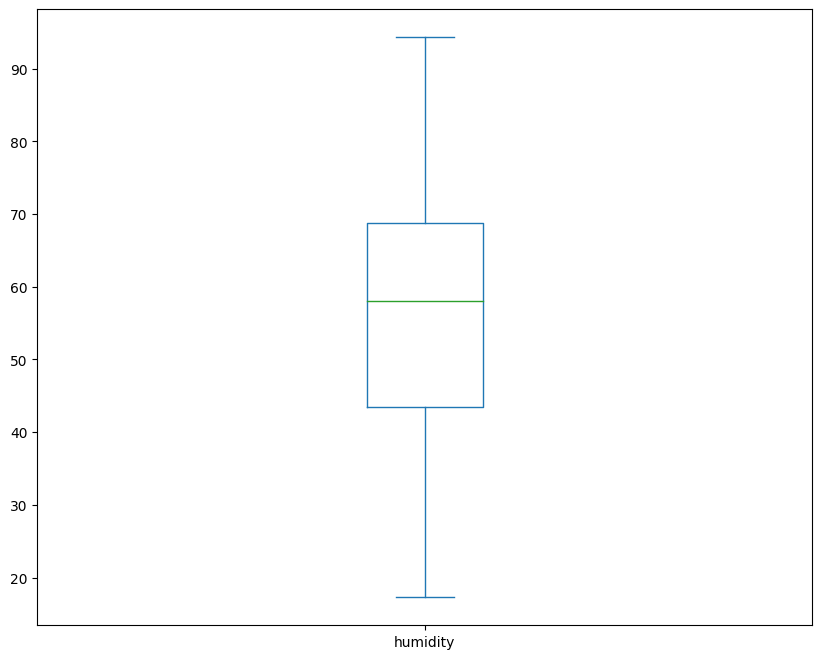

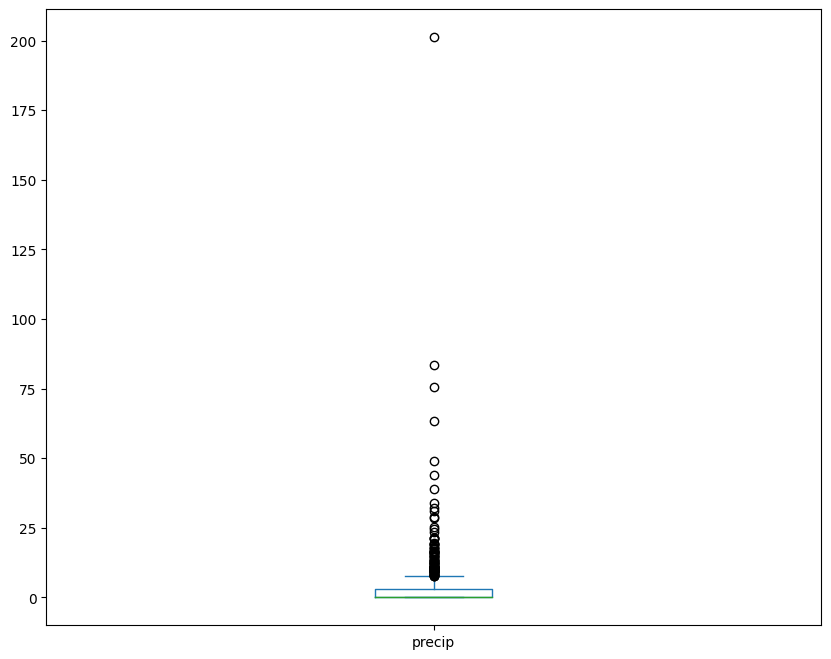

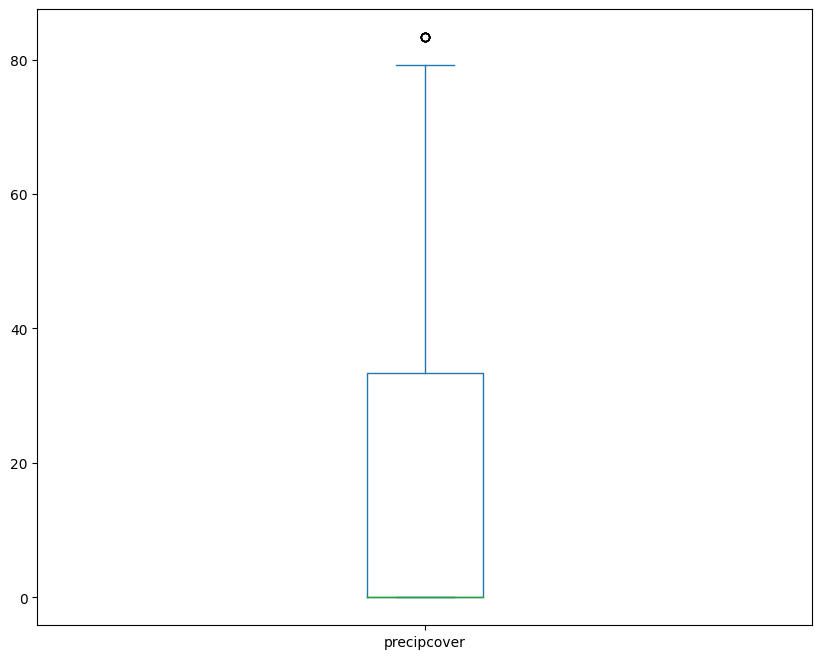

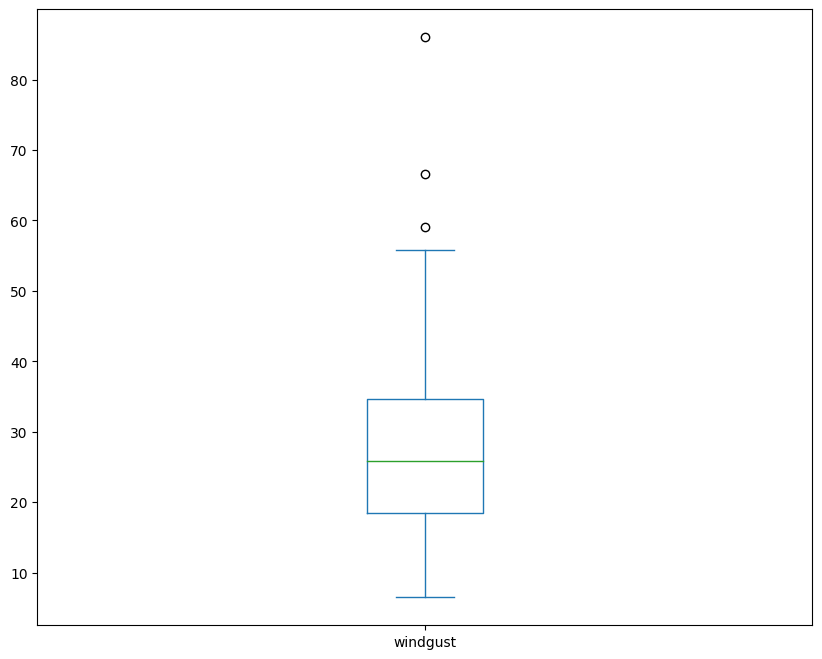

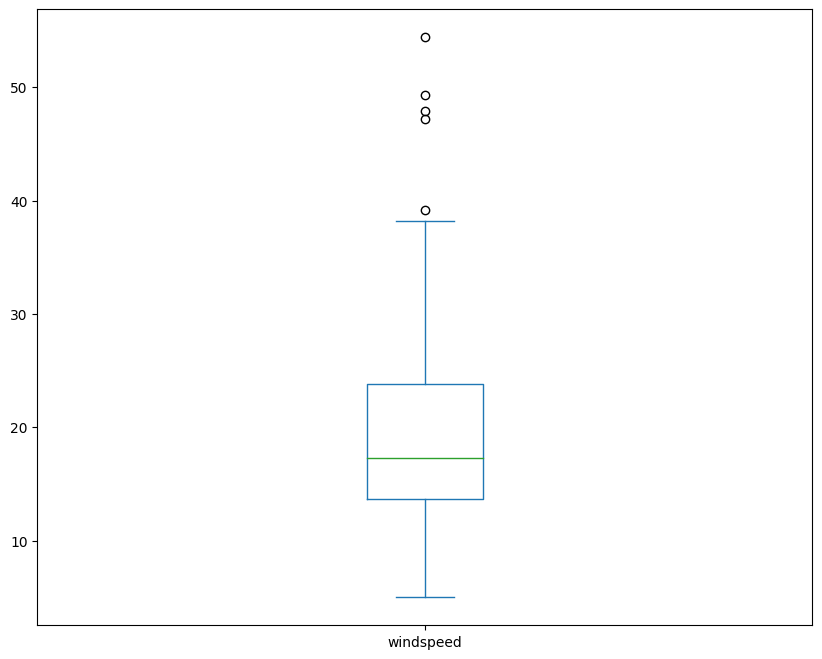

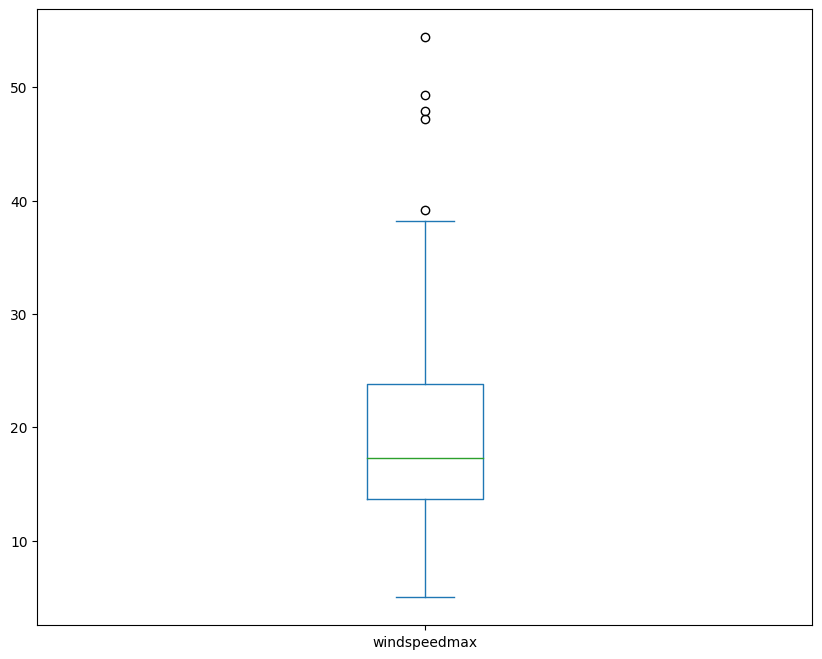

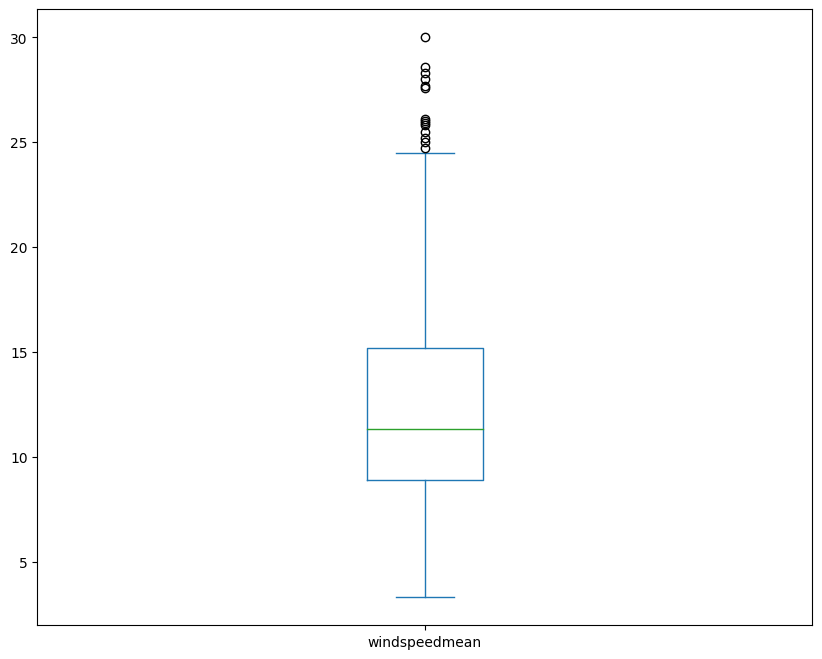

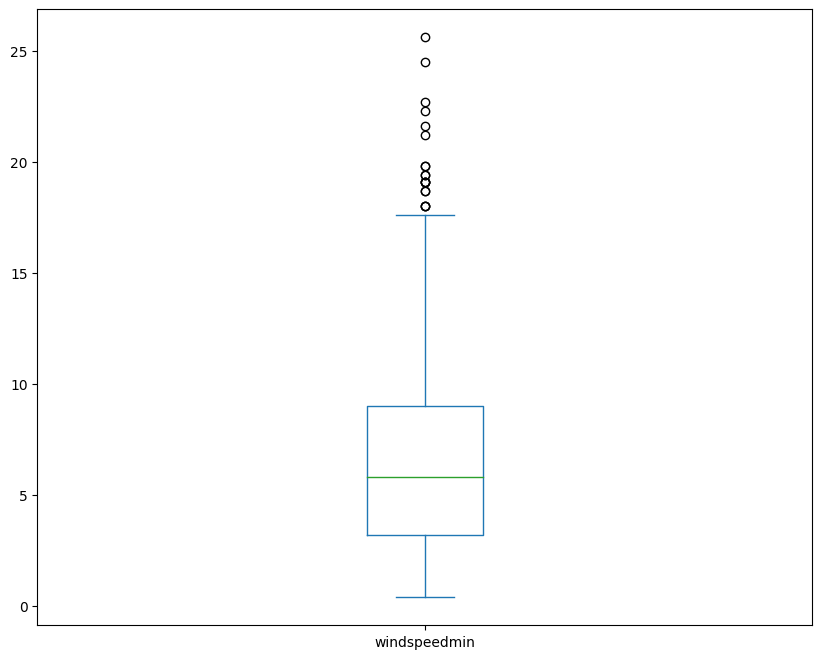

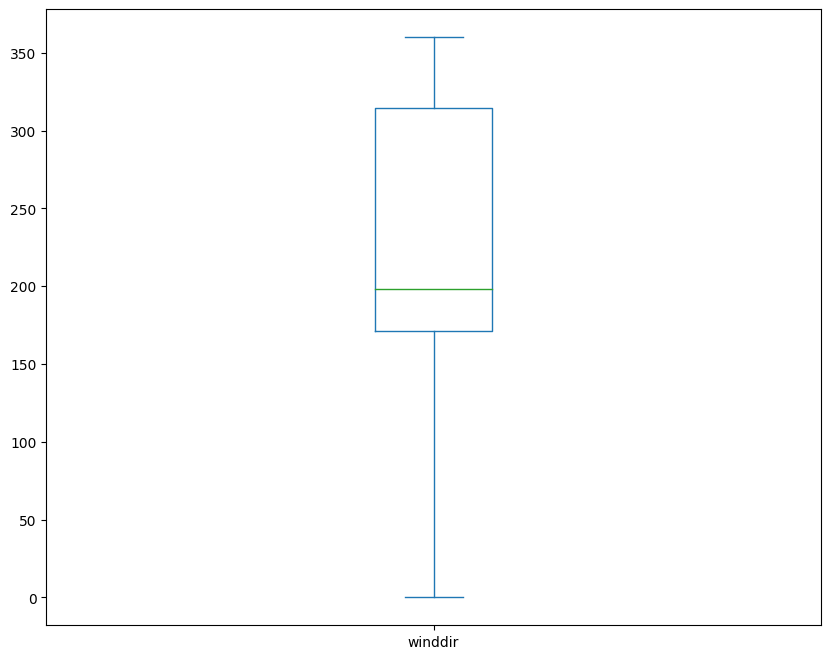

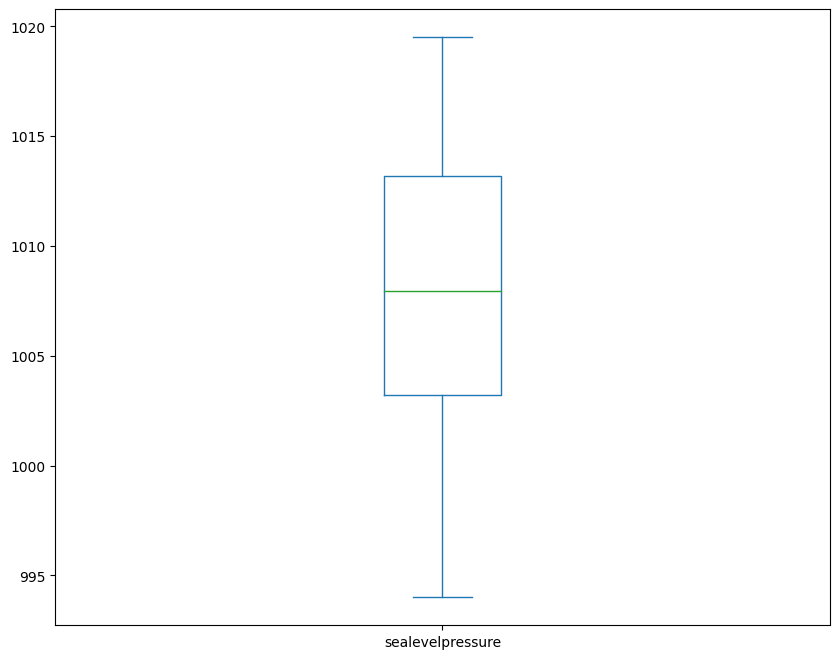

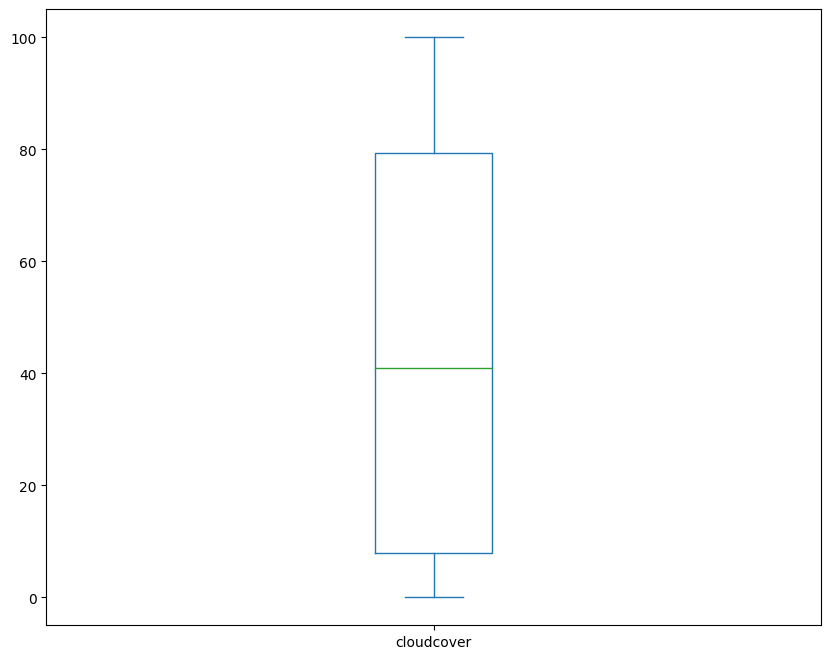

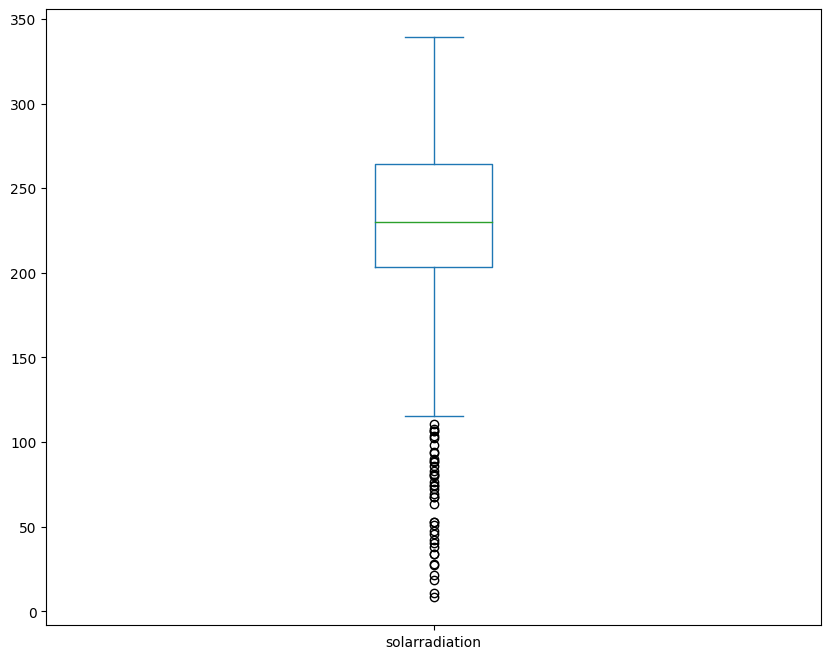

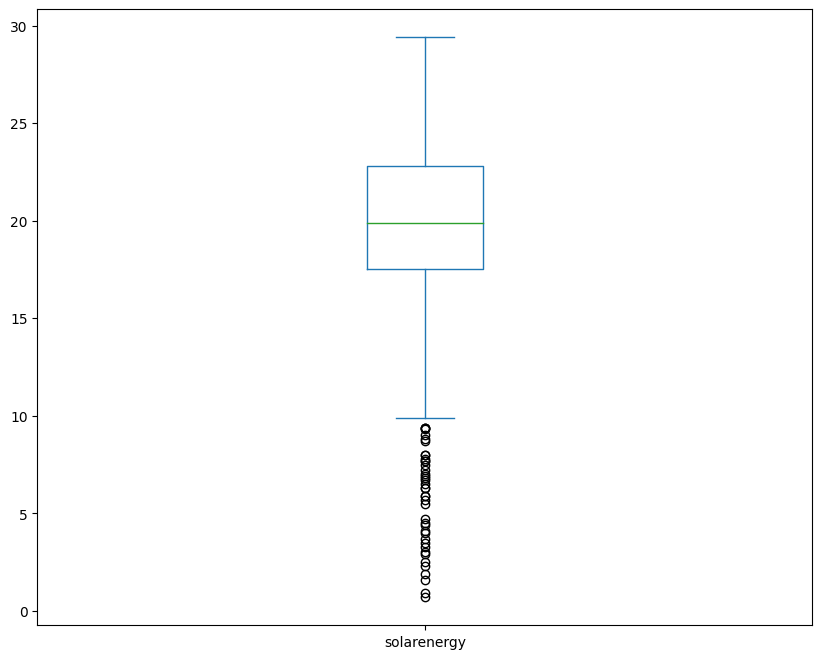

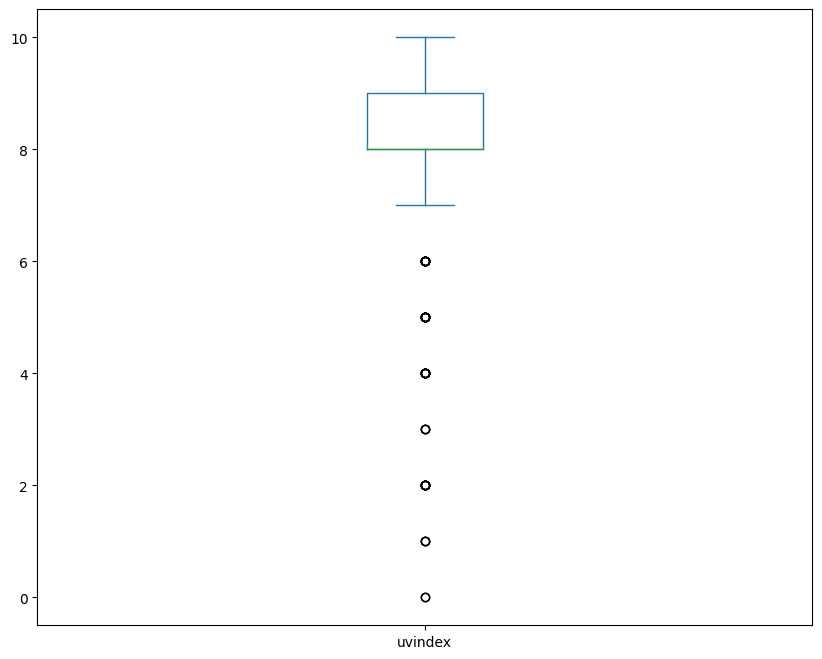

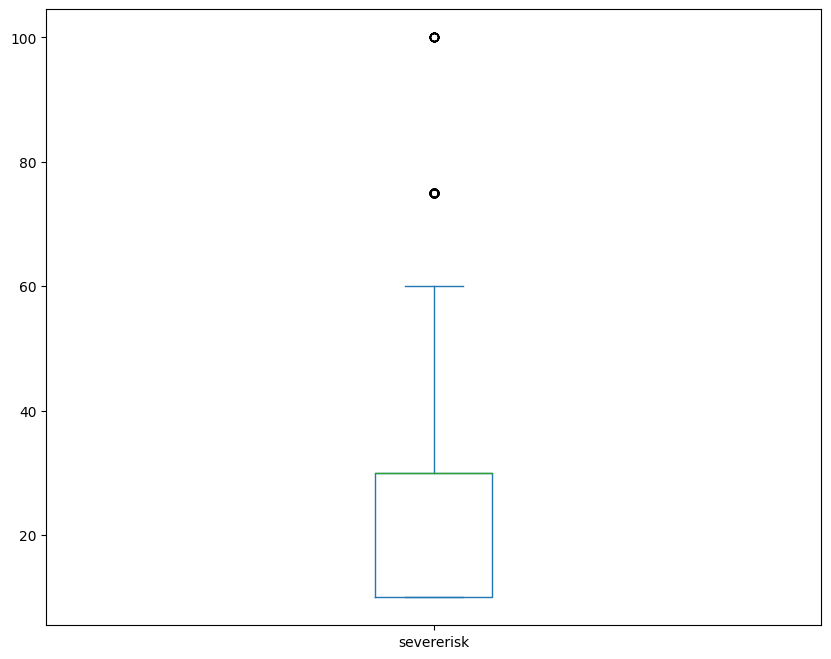

In [ ]:
for i in wb_df_pca.columns:
    plt.figure(figsize = (10, 8))
    wb_df_pca[i].plot.box()

### There are some outliers present in the data.

In [ ]:
wb_df_pca.skew()

tempmax              0.196160
tempmin             -0.661140
temp                -0.432200
feelslikemax        -0.147420
feelslikemin        -0.042109
feelslike           -0.147644
dew                 -0.775415
humidity            -0.162486
precip              11.373279
precipcover          1.211437
windgust             0.754429
windspeed            0.961818
windspeedmax         0.961818
windspeedmean        0.937002
windspeedmin         1.009132
winddir             -0.234310
sealevelpressure    -0.057265
cloudcover           0.170975
solarradiation      -0.964249
solarenergy         -0.962580
uvindex             -1.842392
severerisk           1.058713
dtype: float64

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=4)

In [ ]:
X_train.shape

(292, 21)

In [ ]:
Y_train.shape

(292,)

### X_train has all the features except temperature and Y_train has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [ ]:
Y_train.head

<bound method NDFrame.head of datetime
2023-06-22    31.3
2023-03-24    28.3
2023-09-24    28.5
2023-02-15    23.0
2023-08-18    29.8
              ... 
2023-03-29    29.1
2023-12-27    23.4
2023-07-17    30.4
2023-06-24    30.4
2023-05-03    30.4
Name: temp, Length: 292, dtype: float64>

# Multiple Linear Regression

In [ ]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
#calculating error
np.mean(np.absolute(prediction-Y_test))

0.1851651738838336

In [ ]:
print('Variance score: %.2f' % model.score(X_test, Y_test))

Variance score: 1.00


In [ ]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':Y_test,'Prediction':prediction,'diff':(Y_test-prediction)})

Actual  Prediction  diff
datetime                            
2023-12-01    26.5       26.58 -0.08
2023-05-20    33.0       32.81  0.19
2023-02-12    26.3       26.22  0.08
2023-01-15    23.2       23.42 -0.22
2023-08-17    30.9       30.92 -0.02
...            ...         ...   ...
2023-05-27    33.2       32.88  0.32
2023-09-02    32.4       32.55 -0.15
2023-08-21    30.1       29.97  0.13
2023-11-01    28.3       28.07  0.23
2023-06-09    31.7       31.31  0.39

[73 rows x 3 columns]

# Decision Tree Regression

In [ ]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
prediction2=regressor.predict(X_test)
np.mean(np.absolute(prediction2-Y_test))

0.41643835616438357

In [ ]:
print('Variance score: %.2f' % regressor.score(X_test, Y_test))

Variance score: 0.98


In [ ]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':Y_test,'Prediction':prediction2,'diff':(Y_test-prediction2)})

Actual  Prediction  diff
datetime                            
2023-12-01    26.5        26.3   0.2
2023-05-20    33.0        34.3  -1.3
2023-02-12    26.3        26.5  -0.2
2023-01-15    23.2        23.2   0.0
2023-08-17    30.9        30.3   0.6
...            ...         ...   ...
2023-05-27    33.2        34.5  -1.3
2023-09-02    32.4        33.0  -0.6
2023-08-21    30.1        30.0   0.1
2023-11-01    28.3        28.8  -0.5
2023-06-09    31.7        30.9   0.8

[73 rows x 3 columns]

# Random Forest Regression

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=90, random_state=0)

In [ ]:
prediction3=regr.predict(X_test)
np.mean(np.absolute(prediction3-Y_test))

0.24679452054794246

In [ ]:
print('Variance score: %.2f' % regr.score(X_test, Y_test))

Variance score: 0.99


In [ ]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':Y_test,'Prediction':prediction3,'diff':(Y_test-prediction3)})

Actual  Prediction  diff
datetime                            
2023-12-01    26.5       26.52 -0.02
2023-05-20    33.0       33.68 -0.68
2023-02-12    26.3       25.98  0.32
2023-01-15    23.2       23.27 -0.07
2023-08-17    30.9       30.98 -0.08
...            ...         ...   ...
2023-05-27    33.2       33.47 -0.27
2023-09-02    32.4       32.40  0.00
2023-08-21    30.1       30.20 -0.10
2023-11-01    28.3       28.27  0.03
2023-06-09    31.7       31.15  0.55

[73 rows x 3 columns]

# Calculating R2-score for Multiple Linear Regression

In [ ]:
#from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test,prediction ) )

Mean absolute error: 0.19
Residual sum of squares (MSE): 0.06
R2-score: 1.00


# Calculating R2-score for Decision Tree Regression

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test,prediction2 ) )

Mean absolute error: 0.42
Residual sum of squares (MSE): 0.30
R2-score: 0.98


# Calculating R2-score for Random Forest Regression

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(Y_test,prediction3) )

Mean absolute error: 0.25
Residual sum of squares (MSE): 0.13
R2-score: 0.99


In [ ]:
# Calculate the bias for each model
bias_linear = np.mean(prediction - Y_test)
bias_dt = np.mean(prediction2 - Y_test)
bias_rf = np.mean(prediction3 - Y_test)

# Print the bias values
print("Bias for Linear Regression:", bias_linear)
print("Bias for Decision Tree Regression:", bias_dt)
print("Bias for Random Forest Regression:", bias_rf)

# Correct the bias
prediction_corrected = prediction - bias_linear
prediction2_corrected = prediction2 - bias_dt
prediction3_corrected = prediction3 - bias_rf

# Calculate the performance metrics for the corrected predictions
mae_linear = mean_absolute_error(Y_test, prediction_corrected)
mse_linear = mean_squared_error(Y_test, prediction_corrected)
r2_linear = r2_score(Y_test, prediction_corrected)

mae_dt = mean_absolute_error(Y_test, prediction2_corrected)
mse_dt = mean_squared_error(Y_test, prediction2_corrected)
r2_dt = r2_score(Y_test, prediction2_corrected)

mae_rf = mean_absolute_error(Y_test, prediction3_corrected)
mse_rf = mean_squared_error(Y_test, prediction3_corrected)
r2_rf = r2_score(Y_test, prediction3_corrected)

# Print the performance metrics
print("MAE for Linear Regression (corrected):", mae_linear)
print("MSE for Linear Regression (corrected):", mse_linear)
print("R2 for Linear Regression (corrected):", r2_linear)

print("MAE for Decision Tree Regression (corrected):", mae_dt)
print("MSE for Decision Tree Regression (corrected):", mse_dt)
print("R2 for Decision Tree Regression (corrected):", r2_dt)

print("MAE for Random Forest Regression (corrected):", mae_rf)
print("MSE for Random Forest Regression (corrected):", mse_rf)
print("R2 for Random Forest Regression (corrected):", r2_rf)

Bias for Linear Regression: -0.017945205479452282
Bias for Decision Tree Regression: 0.07945205479452042
Bias for Random Forest Regression: 0.03808219178082174
MAE for Linear Regression (corrected): 0.18777256520923313
MSE for Linear Regression (corrected): 0.055101257271533505
R2 for Linear Regression (corrected): 0.9967045900907836
MAE for Decision Tree Regression (corrected): 0.4218802777256516
MSE for Decision Tree Regression (corrected): 0.29615312441358543
R2 for Decision Tree Regression (corrected): 0.9822881366203943
MAE for Random Forest Regression (corrected): 0.2464439857384126
MSE for Random Forest Regression (corrected): 0.13015522612122352
R2 for Random Forest Regression (corrected): 0.992215879579979


## To visually demonstrate the effect of bias correction on the model's predictions, you can plot the original predictions and the corrected predictions and compare them with the actual temperature values.

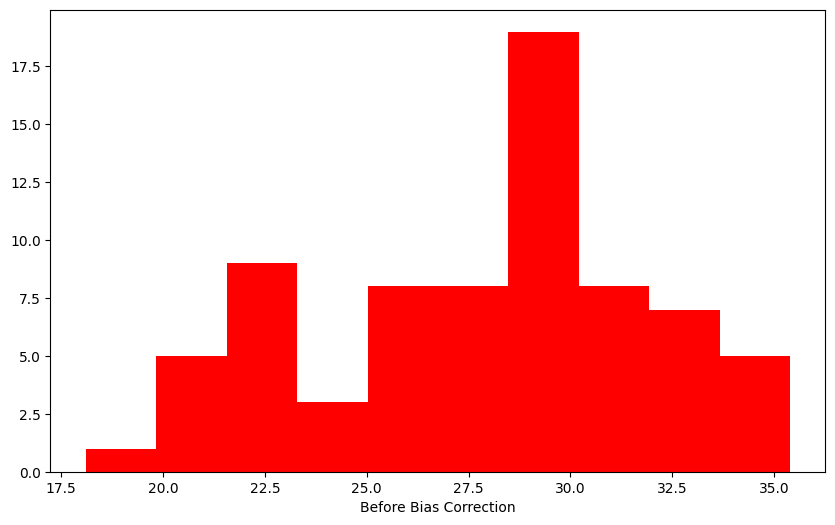

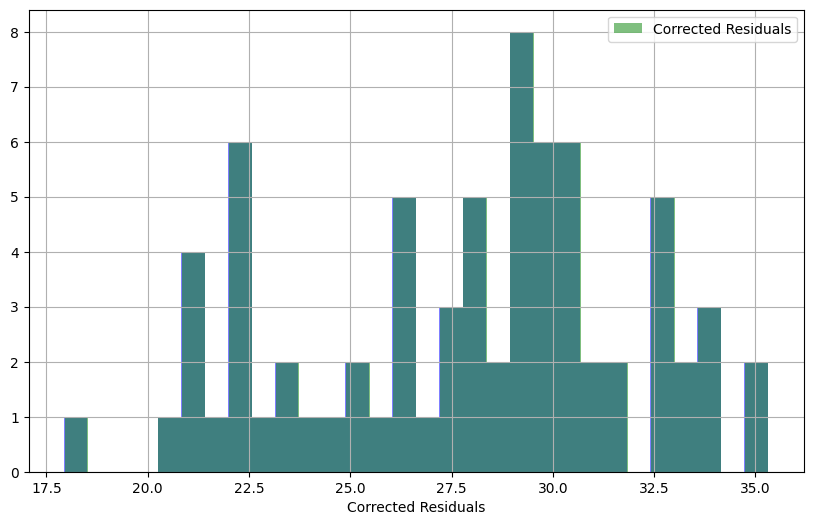

In [ ]:
# Create a line plot for actual temperature values
plt.figure(figsize=(10, 6))
plt.hist( Y_test, color='red', label='Before Bias Correction')
plt.xlabel('Before Bias Correction')
# Create a histogram for original and corrected residuals
plt.figure(figsize=(10, 6))
plt.hist(prediction, bins=30, color='blue', alpha=0.5,)
plt.hist(prediction_corrected, bins=30, color='green', alpha=0.5, label='Corrected Residuals')
plt.xlabel('Corrected Residuals')
plt.legend()
plt.grid(True)
plt.show()